# 문자열 유사도 종류
- https://itnext.io/string-similarity-the-basic-know-your-algorithms-guide-3de3d7346227
- https://en.wikipedia.org/wiki/String_metric

In [1]:
# 관련 라이브러리
# ! pip install textdistance
import textdistance

# N-gram
- n개로 단어를 쪼개서 이웃한 단어의 출현 횟수를 통계적으로 표현해 텍스트의 유사도를 계산하는 방법
- 1일수록 유사함
- as와 asdfgjiewafodjso를 비교했을 때 유사도가 1이 나옴(n=2일때)
- 검색기능에서 써도 될듯

In [2]:
def ngram(s, num):
    res = []
    slen = len(s) - num + 1
    for i in range(slen):
        ss = s[i:i+num]
        res.append(ss)
    return res
def diff_ngram(sa, sb, num):
    a = ngram(sa, num)
    b = ngram(sb, num)
    r = []
    cnt = 0
    for i in a:
        for j in b:
            if i == j:
                cnt += 1
                r.append(i)
    return cnt / len(a), r

In [3]:
diff_ngram('af', 'asdfgjiewafodjso',2)

(1.0, ['af'])

In [4]:
diff_ngram('helo','hellofhlsielfjsielfk', 3)

(0.5, ['hel'])

# Levenshtein distance
- https://lovit.github.io/nlp/2018/08/28/levenshtein_hangle/
- 일반적인 편집거리(삽입, 수정, 삭제)
- 두 문자열이 같아지려면, 몇번의 문자조작이 필요한지 구하는 것

In [5]:
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]

In [6]:
levenshtein('helo','hellofhlsielfjsielfk')

16

In [7]:
textdistance.levenshtein('hlo','hellofhlsielfjsielfk')

17

In [8]:
textdistance.levenshtein('조재영', '조재영')

0

## 편집거리를 정규화 시킨 것, 1일수록 유사한 단어

In [9]:
textdistance.levenshtein.normalized_similarity('hlo','hellofhlsielfjsielfk')

0.15000000000000002

## 삽입, 삭제, 수정에 더해서 치환이 들어간 것

In [10]:
textdistance.damerau_levenshtein('hlo','hellofhlsielfjsielfk')

17

# Jaro-Winkler distance
- https://holamundo.tistory.com/entry/Jaro-Winkler-distance
- https://qtqtlanakim.tistory.com/11

- 두 단어가 비슷할 수록 1에 가까운 값, 다를 수록 0에 가까운 값을 가진다
- 두 단어간의 치환에 집중한 알고리즘
- 일치하는 문자의 순서가 동일한 경우 두 문자열에 높은 점수 부여
- 동일한 문자를 포함하고 서로 일정한 거리 내에 있으면 높은 점수 부여

- ex)
- word1: a---b
- word2: b---a
- transpostions은 총 2회 발생

In [11]:
from IPython.display import Image

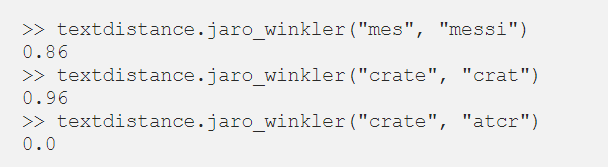

In [12]:
Image("C:/Users/user/Desktop/화면 캡처 2021-09-13 102944.png")

In [13]:
textdistance.jaro_winkler('apple', 'APPLE.')

0.0

In [14]:
textdistance.jaro_winkler('apple', 'aple.')

0.8933333333333333

In [15]:
textdistance.jaro_winkler('apple', 'pple')

0.9333333333333332

In [16]:
textdistance.jaro_winkler('apple', 'elppa')

0.6

In [17]:
textdistance.jaro_winkler('lse', 'lesseon')

0.6984126984126985

# Brute Force Matching

- https://enthuu.tistory.com/2
- 모든 단어 하나하나 다 비교하는 알고리즘

In [18]:
textdistance.bwtrle_ncd('lse', 'lesseon')

0.875

# LCS 알고리즘(최장공통부분 문자열)

- 두개 s1,s2가 주어졌을때, 공통으로 들어있는 부분열중 가장긴 열의 길이를 찾아낸다. 
- 부분열 = 몇몇 문자가 빠져도 순서는 바뀌지않는 문자열을 의미

In [19]:
def lcs(a, b):
    prev = [0]*len(a)
    for i,r in enumerate(a):
        current = []
        for j,c in enumerate(b):
            if r==c:
                e = prev[j-1]+1 if i* j > 0 else 1
            else:
                e = max(prev[j] if i > 0 else 0, current[-1] if j > 0 else 0)
            current.append(e)
        prev = current
    return current[-1]

In [20]:
lcs('lse', 'lesseon')

3

# hamming distance

- 문자열끼리 다른 문자의 총 갯수를 산출
- arrow와 arow를 비교했을때는 3이 나온다
- ar 이후 row가 다르기 때문에

In [21]:
textdistance.hamming('text', 'test')

1

In [22]:
# 편집거리를 정규화 시킨 것, 1일수록 유사하고 0일수록 다른 언어
textdistance.hamming.normalized_similarity('text', 'text') 

1.0

In [23]:
textdistance.hamming.normalized_similarity('조재영', '조최재영')

0.25

# 토큰 기반 알고리즘

- 자카드 인덱스
- sorensen Dice
- 순서 상관없이 알파벳이 많이 같을수록 1
- 안 쓸 것 같아서 대충..

In [24]:
textdistance.jaccard('ehllo', 'helol')
# hello 뒤집어 놔도 같아짐..

1.0

In [25]:
textdistance.jaccard('ehllo', 'helola')

0.8333333333333334

In [26]:
textdistance.sorensen('ehllo', 'helol')

1.0

# Ratcliff-Obershelp similarity

- sequence 기반
- 두 문자열의 공통부분 중 가장 긴 부분을 제외한 후 그 다음 공통부분을 찾고 제외를 반복 후 계산
- text와 test를 비교했을 때, 가장 긴 공통부분인 te 제거 후 xt와 st 중 공통 부분인 t 제거
- 2*(2+1) / 8 = 0.75, 2*(공통부분의 갯수를 더해줌) / 두 문자열의 총 길이

In [27]:
string1, string2 = "test", "text"
textdistance.ratcliff_obershelp(string1, string2)

0.75

# 그냥 비교해보기

In [28]:
# !pip install pandas
# !pip install numpy

In [29]:
import pandas as pd
import numpy as np

In [30]:
sdn = pd.read_csv('C:/Users/user/Desktop/sdn.csv')
sdn.isna().sum()

36                        0
AEROCARIBBEAN AIRLINES    0
-0-                       0
CUBA                      0
-0- .1                    0
-0- .2                    0
-0- .3                    0
-0- .4                    0
-0- .5                    0
-0- .6                    0
-0- .7                    0
-0- .8                    0
dtype: int64

In [31]:
sdn.head(1)

36     AEROCARIBBEAN AIRLINES  -0-   CUBA -0- .1 -0- .2 -0- .3 -0- .4  \
0  173  ANGLO-CARIBBEAN CO., LTD.  -0-   CUBA   -0-    -0-    -0-    -0-    

  -0- .5 -0- .6 -0- .7 -0- .8  
0   -0-    -0-    -0-    -0-

In [58]:
sdn['AEROCARIBBEAN AIRLINES']

0           ANGLO-CARIBBEAN CO., LTD.
1              BANCO NACIONAL DE CUBA
2                  BOUTIQUE LA MAISON
3                        CASA DE CUBA
4                        CECOEX, S.A.
                    ...              
9118       JIMENEZ GONZALEZ, Abelardo
9119    FARAHANI, Alireza Shahvaroghi
9120                 KHAZEIN, Mahmoud
9121                    SADEGHI, Kiya
9122                      NOORI, Omid
Name: AEROCARIBBEAN AIRLINES, Length: 9123, dtype: object

In [59]:
sdn_list = sdn['AEROCARIBBEAN AIRLINES'].unique().tolist()
sdn_list

['ANGLO-CARIBBEAN CO., LTD.',
 'BANCO NACIONAL DE CUBA',
 'BOUTIQUE LA MAISON',
 'CASA DE CUBA',
 'CECOEX, S.A.',
 'CIMEX',
 'CIMEX IBERICA',
 'CIMEX, S.A.',
 'COMERCIAL IBEROAMERICANA, S.A.',
 'COMERCIAL CIMEX, S.A.',
 'COMERCIAL DE RODAJES Y MAQUINARIA, S.A.',
 'COMERCIALIZACION DE PRODUCTOS VARIOS',
 'COMPANIA DE IMPORTACION Y EXPORTACION IBERIA',
 'CORPORACION CIMEX, S.A.',
 'COTEI',
 'CRYMSA - ARGENTINA, S.A.',
 'CUBACANCUN CIGARS AND GIFT SHOPS',
 'CUBAEXPORT',
 'CUBAFRUTAS',
 'CUBAN CIGARS TRADE',
 'CUBANATUR',
 'CUBATABACO',
 'CUMEXINT, S.A.',
 'DELVEST HOLDING, S.A.',
 'EDICIONES CUBANAS',
 'EDYJU, S.A.',
 'EMPRESA CUBANA DE AVIACION',
 'EMPRESA CUBANA DE PESCADOS Y MARISCOS',
 'EMPRESA DE TURISMO NACIONAL Y INTERNACIONAL',
 'ETCO INTERNATIONAL COMMODITIES LTD.',
 'ETCO INTERNATIONAL COMPANY, LIMITED',
 'GALAX TRADING CO., LTD.',
 'HAVIN BANK LIMITED',
 'HAVANATUR',
 'INSTITUTO NACIONAL DE TURISMO DE CUBA',
 'INTERCONSULT',
 'KAVE, S.A.',
 'LA EMPRESA CUBANA DE FLETES',
 'LEVE

In [34]:
len(sdn_list)

7937

## 테서렉트 사용해서 뽑기

In [35]:
from pytesseract import *
from PIL import Image

In [36]:
image=Image.open('C:/Users/user/Desktop/test.jpg')

In [38]:
text=image_to_string(image, lang='eng')

In [39]:
text

' \n\nLETTER OF GUARANTEE\n\nShipping Company L/G No. L/G Date\n2020-01-17\nLetter of Credit No, Date of Issue\nIV NO.\n\nShipper Consignee\nKEB HANA BANK\n\nPort of Loading Bill of Lading No. Date of Issue\nCHENNAI, INDIA A 2026-01-03\nPort of Discharge or Place of Delivery Vessel Name/Voyage No.\n\nBUSAN, KOREA ice\n\nray oie ses\neneol uso [may\n\nDescription of Goods\n|PHARMACEL 102 S@@0KG\n\naren\n\n \n\n \n\n \n\nWhereas you have issued a Bill of Lading covering the above shipment.and the above cargo has been arrived at the above port of\ndischarge(or the above place of delivery), we hereby request you to alve delivery of the said cargo to the above mentioned party\nwithout praduction of the original Bill of Lading.\n\n \n\n \n\nIn consideration of your complying with our above. request, we hereby agree as follows :\n\n1. To indemnify you, your servants and agents and to noid all of you harrnless in respect of lability, loss, damage or\nexpenses which you may sustain by reason of

In [40]:
print(text)

 

LETTER OF GUARANTEE

Shipping Company L/G No. L/G Date
2020-01-17
Letter of Credit No, Date of Issue
IV NO.

Shipper Consignee
KEB HANA BANK

Port of Loading Bill of Lading No. Date of Issue
CHENNAI, INDIA A 2026-01-03
Port of Discharge or Place of Delivery Vessel Name/Voyage No.

BUSAN, KOREA ice

ray oie ses
eneol uso [may

Description of Goods
|PHARMACEL 102 S@@0KG

aren

 

 

 

Whereas you have issued a Bill of Lading covering the above shipment.and the above cargo has been arrived at the above port of
discharge(or the above place of delivery), we hereby request you to alve delivery of the said cargo to the above mentioned party
without praduction of the original Bill of Lading.

 

 

In consideration of your complying with our above. request, we hereby agree as follows :

1. To indemnify you, your servants and agents and to noid all of you harrnless in respect of lability, loss, damage or
expenses which you may sustain by reason of delivering the cargo in accordance with our

In [48]:
test=text.split(' ')
test.count('')

8

In [56]:
test.remove('')

In [57]:
test

['LETTER',
 'OF',
 'GUARANTEEShipping',
 'Company',
 'LG',
 'No',
 'LG',
 'Date20200117Letter',
 'of',
 'Credit',
 'No',
 'Date',
 'of',
 'IssueIV',
 'NOShipper',
 'ConsigneeKEB',
 'HANA',
 'BANKPort',
 'of',
 'Loading',
 'Bill',
 'of',
 'Lading',
 'No',
 'Date',
 'of',
 'IssueCHENNAI',
 'INDIA',
 'A',
 '20260103Port',
 'of',
 'Discharge',
 'or',
 'Place',
 'of',
 'Delivery',
 'Vessel',
 'NameVoyage',
 'NoBUSAN',
 'KOREA',
 'iceray',
 'oie',
 'seseneol',
 'uso',
 'mayDescription',
 'of',
 'GoodsPHARMACEL',
 '102',
 'S0KGaren',
 'Whereas',
 'you',
 'have',
 'issued',
 'a',
 'Bill',
 'of',
 'Lading',
 'covering',
 'the',
 'above',
 'shipmentand',
 'the',
 'above',
 'cargo',
 'has',
 'been',
 'arrived',
 'at',
 'the',
 'above',
 'port',
 'ofdischargeor',
 'the',
 'above',
 'place',
 'of',
 'delivery',
 'we',
 'hereby',
 'request',
 'you',
 'to',
 'alve',
 'delivery',
 'of',
 'the',
 'said',
 'cargo',
 'to',
 'the',
 'above',
 'mentioned',
 'partywithout',
 'praduction',
 'of',
 'the',
 'o

In [41]:
# import re

In [46]:
# text = re.sub(r"[^a-zA-Z0-9 ]","",text)
# print(text)

 LETTER OF GUARANTEEShipping Company LG No LG Date20200117Letter of Credit No Date of IssueIV NOShipper ConsigneeKEB HANA BANKPort of Loading Bill of Lading No Date of IssueCHENNAI INDIA A 20260103Port of Discharge or Place of Delivery Vessel NameVoyage NoBUSAN KOREA iceray oie seseneol uso mayDescription of GoodsPHARMACEL 102 S0KGaren   Whereas you have issued a Bill of Lading covering the above shipmentand the above cargo has been arrived at the above port ofdischargeor the above place of delivery we hereby request you to alve delivery of the said cargo to the above mentioned partywithout praduction of the original Bill of Lading  In consideration of your complying with our above request we hereby agree as follows 1 To indemnify you your servants and agents and to noid all of you harrnless in respect of lability loss damage orexpenses which you may sustain by reason of delivering the cargo in accordance with our request provided that theundersigned Bank shall be exempt from fiahllity

In [45]:
# test=[]
# for s in text.replace('\n\n','\n').split('\n'):
#     s= re.sub(r"[^a-zA-Z0-9 ]","",s)
#     test.append(s)
# test

[' LETTER OF GUARANTEEShipping Company LG No LG Date20200117Letter of Credit No Date of IssueIV NOShipper ConsigneeKEB HANA BANKPort of Loading Bill of Lading No Date of IssueCHENNAI INDIA A 20260103Port of Discharge or Place of Delivery Vessel NameVoyage NoBUSAN KOREA iceray oie seseneol uso mayDescription of GoodsPHARMACEL 102 S0KGaren   Whereas you have issued a Bill of Lading covering the above shipmentand the above cargo has been arrived at the above port ofdischargeor the above place of delivery we hereby request you to alve delivery of the said cargo to the above mentioned partywithout praduction of the original Bill of Lading  In consideration of your complying with our above request we hereby agree as follows 1 To indemnify you your servants and agents and to noid all of you harrnless in respect of lability loss damage orexpenses which you may sustain by reason of delivering the cargo in accordance with our request provided that theundersigned Bank shall be exempt from fiahlli

## 돌려보기

n=2 일 때

In [60]:
for i in test:
    for j in sdn_list:
        try :
            diff_ngram(i,j,2)
            if diff_ngram(i,j,2)[0] > 0.9:
                print(diff_ngram(i,j,3))
                print('test문자열:',i, '//', 'sanction 문자열:',j)
                print(' ')
        except:
            pass

(0.0, [])
test문자열: LETTER // sanction 문자열: TALLER DE REPARACIONES DE AERODINOS SUS PARTES Y SERVICIOS AEREOS S.A.
 
(0.0, [])
test문자열: LETTER // sanction 문자열: MANTENIMIENTO, AERONAUTICA, TRANSPORTE, Y SERVICIOS AEREOS S.A. DE C.V.
 
(0.25, ['TER'])
test문자열: LETTER // sanction 문자열: LEADER (HONG KONG) INTERNATIONAL TRADING LIMITED
 
(0.5, ['TTE', 'TER'])
test문자열: LETTER // sanction 문자열: COMMITTEE TO DETERMINE INSTANCES OF CRIMINAL CONTENT
 
(0.5, ['TER', 'TER'])
test문자열: LETTER // sanction 문자열: FEDERAL STATE UNITARY ENTERPRISE STATE RESEARCH AND PRODUCTION ENTERPRISE BAZALT
 
(0.25, ['LET'])
test문자열: LETTER // sanction 문자열: JOINT STOCK COMPANY ALMAZ-ANTEY AIR DEFENSE CONCERN MAIN SYSTEM DESIGN BUREAU NAMED BY ACADEMICIAN A.A. RASPLETIN
 
(0.25, ['TER'])
test문자열: LETTER // sanction 문자열: STATE ENTERPRISE KERCH SEA COMMERCIAL PORT
 
(0.0, [])
test문자열: LETTER // sanction 문자열: MANSUDAE OVERSEAS PROJECTS ARCHITECTURAL AND TECHNICAL SERVICES (PTY) LIMITED
 
(0.5, ['ETT', 'TTE'])
test문자열: LETTER

test문자열: HANA // sanction 문자열: AL-BILAD ISLAMIC BANK FOR INVESTMENT AND FINANCE P.S.C.
 
(0.0, [])
test문자열: HANA // sanction 문자열: DALIAN SUN MOON STAR INTERNATIONAL LOGISTICS TRADING CO., LTD
 
(0.0, [])
test문자열: HANA // sanction 문자열: AFRICAN TRANS INTERNATIONAL HOLDINGS B.V.
 
(0.5, ['HAN'])
test문자열: HANA // sanction 문자열: MAHAN TRAVEL AND TOURISM SDN BHD
 
(0.5, ['HAN'])
test문자열: HANA // sanction 문자열: AL-KHALIDI EXCHANGE
 
(0.0, [])
test문자열: HANA // sanction 문자열: TADBIRGARAN ATIYEH IRANIAN INVESTMENT COMPANY
 
(0.0, [])
test문자열: HANA // sanction 문자열: IRAN TRACTOR MANUFACTURING COMPANY
 
(0.0, [])
test문자열: HANA // sanction 문자열: ZANJAN ACID PRODUCTION COMPANY
 
(0.5, ['HAN'])
test문자열: HANA // sanction 문자열: SAKSOUK COMPANY FOR EXCHANGE AND MONEY TRANSFER
 
(0.5, ['HAN'])
test문자열: HANA // sanction 문자열: AL HARAM FOREIGN EXCHANGE CO. LTD
 
(0.5, ['HAN'])
test문자열: HANA // sanction 문자열: ESFAHAN'S MOBARAKEH STEEL COMPANY
 
(0.0, [])
test문자열: HANA // sanction 문자열: ANDISHEH MEHVARAN INVESTMENT C

(0.3333333333333333, ['BAN', 'ANK'])
test문자열: BANKPort // sanction 문자열: LIMITED LIABILITY COMPANY NON-BANK CREDIT ORGANIZATION RUSSIAN FINANCIAL SOCIETY
 
(0.5, ['ill'])
test문자열: Bill // sanction 문자열: GONZALEZ MUNIZ, Emilio Guillermo
 
(0.5, ['ill'])
test문자열: Bill // sanction 문자열: KOVALCHUK, Kirill Mikhailovich
 
(0.0, [])
test문자열: INDIA // sanction 문자열: NORDSTRAND MARITIME AND TRADING COMPANY
 
(0.0, [])
test문자열: INDIA // sanction 문자열: ADMINISTRACION INMOBILIARIA BOLIVAR S.A.
 
(0.0, [])
test문자열: INDIA // sanction 문자열: AGROINVERSORA URDINOLA HENAO Y CIA. S.C.S.
 
(0.0, [])
test문자열: INDIA // sanction 문자열: CONSTRUCTORA E INMOBILIARIA URVALLE CIA. LTDA.
 
(0.3333333333333333, ['IND'])
test문자열: INDIA // sanction 문자열: INDUSTRIAS AGROPECUARIAS DEL VALLE LTDA.
 
(0.3333333333333333, ['IND'])
test문자열: INDIA // sanction 문자열: DESARROLLOS COMERCIALES E INDUSTRIALES HENAO GONZALEZ Y CIA. S.C.S.
 
(0.0, [])
test문자열: INDIA // sanction 문자열: INMOBILIARIA EL ESCORIAL LTDA.
 
(0.0, [])
test문자열: INDIA /

(0.2, ['SAN'])
test문자열: NoBUSAN // sanction 문자열: THE RIYADUS-SALIKHIN RECONNAISSANCE AND SABOTAGE BATTALION OF CHECHEN MARTYRS
 
(0.0, [])
test문자열: NoBUSAN // sanction 문자열: IRANIAN MINES AND MINING INDUSTRIES DEVELOPMENT AND RENOVATION ORGANIZATION
 
(0.0, [])
test문자열: NoBUSAN // sanction 문자열: LIMITED LIABILITY COMPANY NON-BANK CREDIT ORGANIZATION RUSSIAN FINANCIAL SOCIETY
 
(0.2, ['BUS'])
test문자열: NoBUSAN // sanction 문자열: PISHGAMAN HORIZON DEVELOPMENT IRANIAN BUSINESS TRADING COMPANY
 
(0.0, [])
test문자열: KOREA // sanction 문자열: PANAMERICAN IMPORT AND EXPORT COMMERCIAL CORPORATION
 
(0.3333333333333333, ['ORE'])
test문자열: KOREA // sanction 문자열: AGROPECUARIA Y REFORESTADORA HERREBE LTDA.
 
(1.0, ['KOR', 'ORE', 'REA'])
test문자열: KOREA // sanction 문자열: KOREA MINING DEVELOPMENT TRADING CORPORATION
 
(1.0, ['KOR', 'ORE', 'REA'])
test문자열: KOREA // sanction 문자열: KOREA RYONBONG GENERAL CORPORATION
 
(1.0, ['KOR', 'ORE', 'REA'])
test문자열: KOREA // sanction 문자열: KOREA COMPLEX EQUIPMENT IMPORT CORPOR

(0.0, [])
test문자열: uso // sanction 문자열: AL-TIKRITI, Qusay Saddam Hussein
 
(0.0, [])
test문자열: uso // sanction 문자열: LOPEZ DIAZ, Jesus Alfonso
 
(1.0, ['uso'])
test문자열: uso // sanction 문자열: REZNIK, Vladislav Matusovich
 
(1.0, ['uso'])
test문자열: uso // sanction 문자열: FAIZ, Mohammed Karim Yusop
 
(0.0, [])
test문자열: uso // sanction 문자열: DJIBO, Ousmane Illiassou
 
(0.0, [])
test문자열: you // sanction 문자열: ZIMA, Pyotr Anatoliyovych
 
(0.0, [])
test문자열: you // sanction 문자열: HELAL, Mounir Ben Dhaou Ben Brahim Ben
 
(0.0, [])
test문자열: you // sanction 문자열: KIM, Kyong Hyok
 
(1.0, ['you'])
test문자열: you // sanction 문자열: CHU, Yeyou
 
(0.0, [])
test문자열: you // sanction 문자열: AG ALHOUSSEINI, Houka Houka
 
(1.0, ['you'])
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
(1.0, ['you'])
test문자열: you // sanction 문자열: LIN, Zuoyou
 
(0.0, [])
test문자열: have // sanction 문자열: AL-ZIBARI, Arshad Muhammad Ahmad Muhammad
 
(0.0, [])
test문자열: have // sanction 문자열: CHIMUTENGWENDE, Chenhamo Chakezha Chen
 
(0.0, [])
test문

(0.0, [])
test문자열: has // sanction 문자열: ALHARBI, Thaar Ghaleb T.
 
(0.0, [])
test문자열: has // sanction 문자열: ALBALAWI, Fahad Shabib A.
 
(0.0, [])
test문자열: has // sanction 문자열: AL-BAZZAL, Muhammad Qasim
 
(0.0, [])
test문자열: has // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
(0.0, [])
test문자열: has // sanction 문자열: GOLPAYEGANI, Mohammad Mohammadi
 
(0.0, [])
test문자열: has // sanction 문자열: RA'D, Muhammad Hasan
 
(0.0, [])
test문자열: has // sanction 문자열: AKHAEI, Shaghayegh
 
(0.0, [])
test문자열: has // sanction 문자열: AL-ISSAWI, Khamis Farhan Al-Khanjar
 
(0.0, [])
test문자열: has // sanction 문자열: HIJAZI, Kassem Mohamad
 
(0.0, [])
test문자열: has // sanction 문자열: BAZZI, Kassem Mohamad Ali
 
(0.0, [])
test문자열: has // sanction 문자열: SADEGHI MOGHADAM, Mohammad Hasan
 
(0.0, [])
test문자열: has // sanction 문자열: TOULAI, Mohammad Hassan
 
(0.0, [])
test문자열: has // sanction 문자열: AL BEHADILI, Mohammed Saeed Odhafa
 
(0.0, [])
test문자열: has // sanction 문자열: BAKHTIARI, Mashallah
 
(1.0, ['has'])
te

(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
(0.0, [])
test문자열: and // sanction 문자열: AGHA, Haji Abdul Manan
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DA COSTA, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GOMEZ BUSTAMANTE, Luis Hernando
 
(0.0, [])
test문자열: and // sanction 문자열: ISAMUDDIN, Nurjaman Riduan
 
(0.0, [])
test문자열: and // sanction 문자열: MOYO, Jonathan Nathaniel
 
(0.0, [])
test문자열: and // sanction 문자열: MUMBENGEGWI, Samuel Simbarashe Simbanenduku
 
(0.0, [])
test문자열: and // sanction 문자열:

(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
(0.0, [])
test문자열: and // sanction 문자열: AGHA, Haji Abdul Manan
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DA COSTA, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GOMEZ BUSTAMANTE, Luis Hernando
 
(0.0, [])
test문자열: and // sanction 문자열: ISAMUDDIN, Nurjaman Riduan
 
(0.0, [])
test문자열: and // sanction 문자열: MOYO, Jonathan Nathaniel
 
(0.0, [])
test문자열: and // sanction 문자열: MUMBENGEGWI, Samuel Simbarashe Simbanenduku
 
(0.0, [])
test문자열: and // sanction 문자열:

test문자열: and // sanction 문자열: MALKEVICH, Alexander Aleksandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LACAVA EVANGELISTA, Rafael Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PAURA, Jorge Alejandro
 
(0.0, [])
test문자열: and // sanction 문자열: ORTEGA MURILLO, Laureano Facundo
 
(1.0, ['and'])
test문자열: and // sanction 문자열: CASTILLO CASTILLO, Orlando Jose
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GAVIDIA FLORES, Yoswal Alexander
 
(0.0, [])
test문자열: and // sanction 문자열: STAUDINGER LEMOINE, Mariana Andrea
 
(0.0, [])
test문자열: and // sanction 문자열: GUERRERO MIJARES, Hannover Esteban
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GRANKO ARTEAGA, Alexander Enrique
 
(0.0, [])
test문자열: and // sanction 문자열: AL-ISSAWI, Khamis Farhan Al-Khanjar
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GANOV, Alexander Nikolaevich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: BASOVA, Lidia Aleksandrovna
 
(1.0, ['and'])
test문자열: and // sanction 문자열: BAZZONI, Alessandro
 
(1.0, ['and']

(0.0, [])
test문자열: you // sanction 문자열: ZIMA, Pyotr Anatoliyovych
 
(0.0, [])
test문자열: you // sanction 문자열: HELAL, Mounir Ben Dhaou Ben Brahim Ben
 
(0.0, [])
test문자열: you // sanction 문자열: KIM, Kyong Hyok
 
(1.0, ['you'])
test문자열: you // sanction 문자열: CHU, Yeyou
 
(0.0, [])
test문자열: you // sanction 문자열: AG ALHOUSSEINI, Houka Houka
 
(1.0, ['you'])
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
(1.0, ['you'])
test문자열: you // sanction 문자열: LIN, Zuoyou
 
(0.5, ['oss'])
test문자열: loss // sanction 문자열: VAZIRI, Hossein Nosratollah
 
(0.5, ['los'])
test문자열: loss // sanction 문자열: ROBAYO ESCOBAR, Carlos Jose
 
(0.5, ['los'])
test문자열: loss // sanction 문자열: BARRAZA ACEVES, Jose Carlos
 
(0.0, [])
test문자열: damage // sanction 문자열: AL-ZIBARI, Arshad Muhammad Ahmad Muhammad
 
(0.0, [])
test문자열: damage // sanction 문자열: SALIM, 'Abd al-Rahman Ould Muhammad al-Husayn Ould Muhammad
 
(0.0, [])
test문자열: damage // sanction 문자열: ABU GHAZALA, Muhammad Hisham Muhammad Isma'il
 
(0.25, ['ama'])
test문자열: damage

(0.5, ['ith'])
test문자열: with // sanction 문자열: AL-DARI, Muthanna Harith
 
(0.5, ['ith'])
test문자열: with // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(0.0, [])
test문자열: our // sanction 문자열: BOULGHITI, Boubekeur
 
(1.0, ['our'])
test문자열: our // sanction 문자열: THAER, Mansour
 
(1.0, ['our'])
test문자열: our // sanction 문자열: DRISSI, Noureddine Ben Ali Ben Belkassem
 
(1.0, ['our'])
test문자열: our // sanction 문자열: TRABELSI, Mourad
 
(1.0, ['our'])
test문자열: our // sanction 문자열: DAGHIR, Ali Ashour
 
(1.0, ['our'])
test문자열: our // sanction 문자열: AZZAM, Mansour Fadlallah
 
(1.0, ['our'])
test문자열: our // sanction 문자열: ADAM, Noureddine
 
(0.0, [])
test문자열: our // sanction 문자열: HELAL, Mounir Ben Dhaou Ben Brahim Ben
 
(1.0, ['our'])
test문자열: our // sanction 문자열: RUELAS AVILA, Patricia Lourdes
 
(1.0, ['our'])
test문자열: our // sanction 문자열: SUAREZ ANDERSON, Lourdes Benicia
 
(1.0, ['our'])
test문자열: our // sanction 문자열: ZANGANEH, Touraj
 
(1.0, ['our'])
test문자열: our // sanction 문자열: ESLAMI, Mansou

(1.0, ['bur'])
test문자열: bur // sanction 문자열: CAZAREZ PEREZ, Maria Tiburcia
 
(0.0, [])
test문자열: bur // sanction 문자열: KARAEU, Yuriy Khadzymuratavich
 
(0.0, [])
test문자열: ssssion // sanction 문자열: AL-MAJID, Hussein Kamel Hassan
 
(0.0, [])
test문자열: ssssion // sanction 문자열: IBRAHIM, Yasser Hussein
 
(0.0, [])
test문자열: shall // sanction 문자열: NAJI, Talal Muhammad Rashid
 
(0.3333333333333333, ['all'])
test문자열: shall // sanction 문자열: AL-SAD'UN, Abd-al-Baqi abd-al-Karim Abdallah
 
(0.3333333333333333, ['sha'])
test문자열: shall // sanction 문자열: AL-ZIBARI, Arshad Muhammad Ahmad Muhammad
 
(0.3333333333333333, ['hal'])
test문자열: shall // sanction 문자열: TAHA, Khalil Ibrahim Mohamed Achar Foudail
 
(0.3333333333333333, ['all'])
test문자열: shall // sanction 문자열: SUGHAYR, Muhammad 'Abdallah Salih
 
(0.3333333333333333, ['hal'])
test문자열: shall // sanction 문자열: AL-KUWARI, Salim Hasan Khalifah Rashid
 
(0.0, [])
test문자열: shall // sanction 문자열: SALIM, 'Abd al-Rahman Ould Muhammad al-Husayn Ould Muhammad
 
(0.3

(0.0, [])
test문자열: The // sanction 문자열: CHIMUTENGWENDE, Chenhamo Chakezha Chen
 
(1.0, ['The'])
test문자열: The // sanction 문자열: MON, Khin Thiri Thet
 
(1.0, ['The'])
test문자열: The // sanction 문자열: NYUNT, Thein
 
(1.0, ['The'])
test문자열: The // sanction 문자열: SOE, Thein
 
(1.0, ['The'])
test문자열: The // sanction 문자열: WIN, Thet Khaing
 
(2.0, ['The', 'The'])
test문자열: The // sanction 문자열: KHINE, Thet Thet
 
(0.0, [])
test문자열: The // sanction 문자열: NWE, Than Than
 
(2.0, ['The', 'The'])
test문자열: The // sanction 문자열: AUNG, Thet Thet
 
(0.0, [])
test문자열: The // sanction 문자열: AYE, Than Than
 
(1.0, ['The'])
test문자열: The // sanction 문자열: YE, Theit Thinzar
 
(0.5, ['ach'])
test문자열: each // sanction 문자열: KHLEBNIKOV, Vyacheslav Georgievich
 
(0.5, ['ach'])
test문자열: each // sanction 문자열: KARYAKIN, Alexei Vyacheslavovich
 
(0.5, ['ach'])
test문자열: each // sanction 문자열: URZHUMTSEV, Oleg Vyacheslavovich
 
(0.5, ['ach'])
test문자열: each // sanction 문자열: KARLOV, Gennady Vyacheslavovich
 
(0.5, ['ach'])
test문자열: 

test문자열: and // sanction 문자열: BASOV, Aleksandr Vasilevich
 
(0.0, [])
test문자열: and // sanction 문자열: ABAHUSSAIN, Mansour Othman M.
 
(1.0, ['and'])
test문자열: and // sanction 문자열: URENA MARTINEZ, Jhonan Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MISHKIN, Alexander Yevgeniyevich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: OSADCHUK, Aleksandr Vladimirovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: POTEMKIN, Aleksey Aleksandrovich
 
(2.0, ['and', 'and'])
test문자열: and // sanction 문자열: MALKEVICH, Alexander Aleksandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LACAVA EVANGELISTA, Rafael Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PAURA, Jorge Alejandro
 
(0.0, [])
test문자열: and // sanction 문자열: ORTEGA MURILLO, Laureano Facundo
 
(1.0, ['and'])
test문자열: and // sanction 문자열: CASTILLO CASTILLO, Orlando Jose
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GAVIDIA FLORES, Yoswal Alexander
 
(0.0, [])
test문자열: and // sanction 문자열: STAUDINGER LEMOINE, Mariana A

 
(1.0, ['and'])
test문자열: and // sanction 문자열: DAMIANI BUSTILLOS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MICHURIN, Igor Aleksandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VOROBEV, Aleksandr Nikolayevich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: KORNET, Igor Aleksandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: KOSTRUBITSKY, Aleksey Aleksandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DIKIY, Aleksey Aleksandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: FLEMING CABRERA, Alejandro Antonio
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ZERPA DELGADO, Simon Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: THULSIE, Brandon-Lee
 
(1.0, ['and'])
test문자열: and // sanction 문자열: OBLITAS RUZZA, Sandra
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PENTYA, Aleksandr Yevgenyevich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MELNYCHUK, Oleksandr
 
(1.0, ['and'])
test문자열: and // sanction 문자열: TIMOFEEV, Aleksandr Yurievich
 
(1.0, 

(0.3333333333333333, ['sha'])
test문자열: shail // sanction 문자열: ABU GHAZALA, Muhammad Hisham Muhammad Isma'il
 
(0.6666666666666666, ['hai', 'ail'])
test문자열: shail // sanction 문자열: KOVALCHUK, Kirill Mikhailovich
 
(0.0, [])
test문자열: any // sanction 문자열: AGHA, Haji Abdul Manan
 
(0.0, [])
test문자열: any // sanction 문자열: ISAMUDDIN, Nurjaman Riduan
 
(0.0, [])
test문자열: any // sanction 문자열: MOYO, Jonathan Nathaniel
 
(0.0, [])
test문자열: any // sanction 문자열: NHEMA, Chenayaimoyo Dunstan Francis
 
(0.0, [])
test문자열: any // sanction 문자열: AL-TIKRITI, Barzan abd al-Ghafur Sulaiman Majid
 
(0.0, [])
test문자열: any // sanction 문자열: AL-TIKRITI, Rukan Razuki abd-al-Ghafur Sulaiman
 
(0.0, [])
test문자열: any // sanction 문자열: AL-TIKRITI, Watban Ibrahim Hassan
 
(0.0, [])
test문자열: any // sanction 문자열: AL-TIKRITI, Barzan Ibrahim Hassan
 
(0.0, [])
test문자열: any // sanction 문자열: AL-TIKRITI, Ali Barzan Ibrahim Hasan
 
(0.0, [])
test문자열: any // sanction 문자열: AL-TIKRITI, Khawla Barzan Ibrahim Hasan
 
(0.0, [])
test문자

(0.5, ['ith'])
test문자열: with // sanction 문자열: AL-DARI, Muthanna Harith
 
(0.5, ['ith'])
test문자열: with // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(0.0, [])
test문자열: law // sanction 문자열: HUWAYSH, Abd-al-Tawab Mullah
 
(0.0, [])
test문자열: law // sanction 문자열: AL-TIKRITI, Khawla Barzan Ibrahim Hasan
 
(0.0, [])
test문자열: law // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(0.0, [])
test문자열: law // sanction 문자열: NAUMAU, Uladzimir Uladzimiravich
 
(0.0, [])
test문자열: law // sanction 문자열: AL-RAWI, Fawzi Mutlaq
 
(0.0, [])
test문자열: law // sanction 문자열: BEHZAD, Ahmad Abdulla Mohammad Abdulla
 
(0.0, [])
test문자열: law // sanction 문자열: PEREZ MONTERO, Maria Marcela del Pilar
 
(0.0, [])
test문자열: law // sanction 문자열: LEONTYEV, Vladislav Vladimirovich
 
(0.0, [])
test문자열: law // sanction 문자열: AZZAM, Mansour Fadlallah
 
(1.0, ['law'])
test문자열: law // sanction 문자열: ACHEKZAI, Maulawi Adam Khan
 
(1.0, ['law'])
test문자열: law // sanction 문자열: ROZI, Pahlawan
 
(0.0, [])
test문자열: law // sanction 문자열:

(0.0, [])
test문자열: the // sanction 문자열: KHINE, Thet Thet
 
(0.0, [])
test문자열: the // sanction 문자열: AUNG, Thet Thet
 
(0.0, [])
test문자열: the // sanction 문자열: MOYO, Jonathan Nathaniel
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(0.0, [])
test문자열: the // sanction 문자열: CHIMUTENGWENDE, Chenhamo Chakezha Chen
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(0.0, [])
test문자열: the // sanction 문자열: AL-DARI, Muthanna Harith
 
(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(0.0, [])
test문자열: the // sanction 문자열: KHINE, Thet Thet
 
(0.0, [])
test문자열: the // sanction 문자열: AUNG, Thet Thet
 
(0.0, [])
test문자열: the // sanction 문자열: MOYO, Jonathan Nathaniel
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(0.0, [])
test문자열: the // sanction 문자열: CHIMUTENGWENDE, Chenhamo Chakezha Chen
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(0.0, [])
test문자열: the // sanction 문자열: AL-D

(1.0, ['For'])
test문자열: For // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
(0.0, [])
test문자열: For // sanction 문자열: PATRACA PONCE, Jorge Normando
 
(0.0, [])
test문자열: For // sanction 문자열: LEPSVERIDZE, Grigory Victorovich
 
(0.0, [])
test문자열: For // sanction 문자열: ALISOV, Igor Borisovich
 
(0.0, [])
test문자열: For // sanction 문자열: YANUKOVYCH, Viktor Fedorovych
 
(0.0, [])
test문자열: For // sanction 문자열: KIBIS, Boris Borisovich
 
(0.0, [])
test문자열: For // sanction 문자열: MOLCHANOV, Grigoriy Viktorovich
 
(0.0, [])
test문자열: For // sanction 문자열: NETYKSHO, Viktor Borisovich
 
(0.0, [])
test문자열: For // sanction 문자열: KRASNOV, Igor Victorovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERR

(0.5, ['ana'])
test문자열: Hana // sanction 문자열: AGHA, Haji Abdul Manan
 
(0.0, [])
test문자열: Hana // sanction 문자열: MOYO, Jonathan Nathaniel
 
(0.0, [])
test문자열: Hana // sanction 문자열: NHEMA, Chenayaimoyo Dunstan Francis
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-SA'DI, Amir Hamudi Hassan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-TIKRITI, Watban Ibrahim Hassan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-TIKRITI, Barzan Ibrahim Hassan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-TIKRITI, Ali Barzan Ibrahim Hasan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-TIKRITI, Khawla Barzan Ibrahim Hasan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-TIKRITI, Mohammad Barzan Ibrahim Hasan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-TIKRITI, Noor Barzan Ibrahim Hasan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-TIKRITI, Saja Barzan Ibrahim Hasan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AL-TIKRITI, Thoraya Barzan Ibrahim Hasan
 
(0.0, [])
test문자열: Hana // sanction 문자열: AHMED, Adnan S. Hasan

글자수가 n 개일 때

In [61]:
for i in test:
    for j in sdn_list:
        try :
            diff_ngram(i,j,len(i))
            if diff_ngram(i,j,len(i))[0] > 0.9:
                print(diff_ngram(i,j,len(i)))
                print('test문자열:',i, '//', 'sanction 문자열:',j)
                print(' ')
        except:
            pass

(1.0, ['OF'])
test문자열: OF // sanction 문자열: LIBERATION TIGERS OF TAMIL EELAM
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: POPULAR FRONT FOR THE LIBERATION OF PALESTINE
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: POPULAR FRONT FOR THE LIBERATION OF PALESTINE - GENERAL COMMAND
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: REVOLUTIONARY ARMED FORCES OF COLOMBIA
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: DEMOCRATIC FRONT FOR THE LIBERATION OF PALESTINE - HAWATMEH FACTION
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: ISLAMIC MOVEMENT OF UZBEKISTAN
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: UNITED SELF-DEFENSE FORCES OF COLOMBIA
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: ISLAMIC ARMY OF ADEN
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: FIRST OF OCTOBER ANTIFASCIST RESISTANCE GROUP
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: REVIVAL OF ISLAMIC HERITAGE SOCIETY
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: THE AID ORGANIZATION OF THE ULEMA
 
(1.0, ['OF'])
test문자열: OF // sanction 문자열: NEW P

(1.0, ['LG'])
test문자열: LG // sanction 문자열: CORREA PULGARIN, Ernesto
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: BOULGHITI, Boubekeur
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: MELGOZA TORRES, Martin
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: ALGUADIS, Selim
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: AFRI BELG COMMERCIO E INDUSTRIA LDA
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: SALGUEIRO NEVAREZ, Noel
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: VOLGA GROUP
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: OAO 'DOLGOPRUDNY RESEARCH PRODUCTION ENTERPRISE'
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: VALGO GRUPO DE INVERSION S.A. DE C.V.
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: ROSENTHAL HIDALGO, Yani Benjamin
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: JUND AL-KHILAFAH IN ALGERIA
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: OAO VOLGOGRADNEFTEMASH
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: BULGAKOV, Vadim Viktorovich
 
(1.0, ['LG'])
test문자열: LG // sanction 문자열: DELGADO ROSALES,

test문자열: No // sanction 문자열: ADAM, Noureddine
 
(1.0, ['No'])
test문자열: No // sanction 문자열: GONZALEZ VALENCIA, Noemi
 
(1.0, ['No'])
test문자열: No // sanction 문자열: KATINTIMA, Norbert Basengezi
 
(1.0, ['No'])
test문자열: No // sanction 문자열: WALI, Noor
 
(1.0, ['No'])
test문자열: No // sanction 문자열: MUSBAH, Nourddin Milood M
 
(1.0, ['of'])
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['of'])
test문자열: of // sanction 문자열: HASHIMOTO, Hirofumi
 
(1.0, ['of'])
test문자열: of // sanction 문자열: AGUINO ARBOLEDA, Onofre Junior
 
(1.0, ['INDIA'])
test문자열: INDIA // sanction 문자열: INDIAN MUJAHIDEEN
 
(1.0, ['INDIA'])
test문자열: INDIA // sanction 문자열: AL-QA'IDA IN THE INDIAN SUBCONTINENT
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: ANGLO-CARIBBEAN CO., LTD.
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: BANCO NACIONAL DE CUBA
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: BOUTIQUE LA MAISON
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: CASA DE CUBA
 
(1.0, ['A'])
test문

test문자열: A // sanction 문자열: GONZALEZ QUIRARTE, Eduardo
 
(1.0, ['A'])
test문자열: A // sanction 문자열: IBRAHIM, Haji
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: VILLANUEVA MADRID, Mario Ernesto
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: ZAMBADA GARCIA, Ismael
 
(6.0, ['A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: BABBAR KHALSA INTERNATIONAL
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: INTERNATIONAL SIKH YOUTH FEDERATION
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: NEW PEOPLE'S ARMY / COMMUNIST PARTY OF THE PHILIPPINES
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: BEN SOLTANE, Adel
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: BEN ATTIA, Nabil Ben Mohamed Ben Ali
 
(1.0, ['A'])
test문자열: A // sanction 문자열: JELASSI, Riadh Ben Belkassem Ben Mohamed
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KAMMOUN, Mehdi
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: MAAROUFI, Tarek Ben Habib Ben Al-Toumi
 
(3.0, ['A', 'A', 'A'])
test문자열: A //

test문자열: A // sanction 문자열: BOROVCANIN, Veljko
 
(1.0, ['A'])
test문자열: A // sanction 문자열: DJORDA, Samojko
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: JAKUPI, Avdyl
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KOVAC, Tomislav
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: MARIJANOVIC, Milovan
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: SARAC, Ivan
 
(1.0, ['A'])
test문자열: A // sanction 문자열: SHAQIRI, Xhezair
 
(1.0, ['A'])
test문자열: A // sanction 문자열: THACI, Menduh
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: 2904977 CANADA, INC.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: CORPORACION CIMEX S.A.
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: CUBANACAN GROUP
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: CUBANACAN INTERNATIONAL B.V
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: CUBANACAN U.K. LIMITED
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: HAVANATUR S.A.
 
(6.0, ['A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: HAVAN

 
(1.0, ['A'])
test문자열: A // sanction 문자열: MURERWA, Ruth Chipo
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MUTINHIRI, Ambrose
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: NYAMBUYA, Michael Rueben
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: SAKABUYA, Morris
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AL-SIBA'I, Hani Muhammad Yusuf
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AHMAD, Zaki Izzat Zaki
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: ABD AL-RAHMAN, Abdullah Muhammad Rajab
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: AL-ISLAMBULI, Muhammad Ahmad Shawqi
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: MUSTAFA BAKRI, Ali Sa'd Muhammad
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: SAVANHU, Tendai
 
(1.0, ['A'])
test문자열: A // sanction 문자열: SHAMU, Webster Kotiwani
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: SIBANDA, Levy
 
(1.0, ['A'])
test문자열: A // sanction 문자열: ZHUWAO, Patrick
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 

 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: OFFENBACH HAUSHALTWAREN B.V.
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KHAN & SCHIRINDEL GMBH
 
(1.0, ['A'])
test문자열: A // sanction 문자열: SAF TECH S.L.
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: DUBAI TRADING COMPANY
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: ZULEKHA GENERAL TRADING LLC
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: SHAHBAZ TV CENTER
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: SHAHNAWAZ TRADERS
 
(1.0, ['A'])
test문자열: A // sanction 문자열: SHER MATCH INDUSTRIES (PVT.) LIMITED
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: SHAHBAZ KHAN GENERAL TRADING LLC
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MALEKI, Naser
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: JONGWE PRINTING AND PUBLISHING COMPANY
 
(1.0, ['A'])
test문자열: A // sanction 문자열: DROUKDEL, Abdelmalek
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: CAZARES SALAZAR, Blanca Margarita
 
(4.0, ['A

test문자열: A // sanction 문자열: KARAYILAN, Murat
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: ALTUN, Ali Riza
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AYDAR, Zubayir
 
(7.0, ['A', 'A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: IRANIAN MINES AND MINING INDUSTRIES DEVELOPMENT AND RENOVATION ORGANIZATION
 
(1.0, ['A'])
test문자열: A // sanction 문자열: ASCOTEC HOLDING GMBH
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: ASCOTEC JAPAN K.K.
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: METAL & MINERAL TRADE S.A.R.L.
 
(1.0, ['A'])
test문자열: A // sanction 문자열: IRASCO S.R.L.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: MINES AND METALS ENGINEERING GMBH
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: ASCOTEC STEEL TRADING GMBH
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: ASCOTEC MINERAL & MACHINERY GMBH
 
(1.0, ['A'])
test문자열: A // sanction 문자열: ASCOTEC SCIENCE & TECHNOLOGY GMBH
 
(1.0, ['A'])
test문자열: A // sanction 문자열: BREYELLER STAHL TECHNOLOGY GMBH & 

test문자열: A // sanction 문자열: PARQUES TEMATICOS S.A.S.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: PROMO RAIZ S.A.S.
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: RED MUNDIAL INMOBILIARIA, S.A. DE C.V.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: ROBLE DE MINAS S.A.S.
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: RUTA 33 MOTOCICLETAS Y ACCESORIOS LTDA.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: UNION DE CONSTRUCTORES CONUSA S.A.S.
 
(7.0, ['A', 'A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: TRANSPORTADORA Y COMERCIALIZADORA SYSTOLE S.A.S.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AFRIDI, Amanullah
 
(1.0, ['A'])
test문자열: A // sanction 문자열: UR-REHMAN, Mati
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: AZHAR, Abdul Rauf
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: HERRENO BARRERA, Alejandro
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MOLANO TORRES, Deysi Yamile
 
(1.0, ['A'])
test문자열: A // sanction 문자열: SANCHEZ REY, German

test문자열: A // sanction 문자열: HANDASIEH
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: AL-WATFA, Ali Ibrahim
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: KHANAFER, Hicham Nmer
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: GASOLINERA Y SERVICIOS VILLABONITA, S.A. DE C.V.
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: ESPARRAGOZA GASTELUM, Brenda Guadalupe
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: ESPARRAGOZA GASTELUM, Juan Ignacio
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: MONZON ARAUJO, Ofelia
 
(1.0, ['A'])
test문자열: A // sanction 문자열: LOBO, Carlos Arnoldo
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: GUZMAN OCHOA, Ulises
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: FAWAZ, Abbas Loutfe
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: CHEHADE, Ali Ahmad
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: GRUPO CINJAB, S.A. DE C.V.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: GRUPO IMPERGOZA, S.A. DE C.V.
 
(3.0, [

(1.0, ['A'])
test문자열: A // sanction 문자열: GONZALEZ MUNIZ, Emilio Guillermo
 
(8.0, ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: COMPANIA GANADERA 5 MANANTIALES S. DE P.R. DE R.L.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: IMPAN-COL, S.A.
 
(1.0, ['A'])
test문자열: A // sanction 문자열: CHAPS INVESTMENT INC.
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: INVERSORA PANACOL S.A.
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: C.I. CAFFEE VALORES S.A.
 
(7.0, ['A', 'A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: COMPANIA REAL DE PANAMA S.A.
 
(1.0, ['A'])
test문자열: A // sanction 문자열: CLAN DEL GOLFO
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: DROGANOV, Aleksey O.
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KARPOV, Pavel
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KHIMINA, Yelena
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KRIVORUCHKO, Aleksey
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KUZNETSOV, Artem
 
(2.0, ['A', 'A'])
test문자열: A // sancti

test문자열: A // sanction 문자열: RESEARCH FX CONSULTANTS LIMITED
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: LEADING EDGE SOURCING CORPORATION
 
(1.0, ['A'])
test문자열: A // sanction 문자열: BOYLE CHEMICAL CO., LTD.
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: BANIAS REFINERY COMPANY
 
(1.0, ['A'])
test문자열: A // sanction 문자열: HOMS REFINERY COMPANY
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: KALASHNIKOV CONCERN
 
(1.0, ['A'])
test문자열: A // sanction 문자열: GADET, Peter
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MENYAILO, Sergei Ivanovich
 
(1.0, ['A'])
test문자열: A // sanction 문자열: PONOMARYOV, Vyacheslav
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KAUROV, Valery Vladimirovich
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AL-NUSRAH FRONT
 
(1.0, ['A'])
test문자열: A // sanction 문자열: SAVELYEV, Oleg Genrikhovich
 
(1.0, ['A'])
test문자열: A // sanction 문자열: PURGIN, Andrey Yevgenyevich
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KOZYURA, Oleg Grigorievich
 
(1.0, ['A'])
test문자열: A // sanction 문자

test문자열: A // sanction 문자열: GAZIYEV, Tarkhan Ismailovich
 
(1.0, ['A'])
test문자열: A // sanction 문자열: IZMAYLOV, Shamil
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: JUND AL-KHILAFAH IN ALGERIA
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: MUTHANA, Nasser
 
(1.0, ['A'])
test문자열: A // sanction 문자열: ERDOGAN, Emrah
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: ISIL KHORASAN
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: CHATAYEV, Akhmed
 
(1.0, ['A'])
test문자열: A // sanction 문자열: GUCHAYEV, Zaurbek
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: MUTHANA, Aseel
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: ATABIYEV, Islam Seit-Umarovich
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: AKTSIONERNOE OBSCHESTVO 'YALTINSKAYA KINODSTUDIYA'
 
(1.0, ['A'])
test문자열: A // sanction 문자열: TSYPLAKOV, Sergey Gennadevich
 
(1.0, ['A'])
test문자열: A // sanction 문자열: IOFFE, Eduard A
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: KARAMYAN, Vakhtang
 
(2.0, ['A'

(1.0, ['A'])
test문자열: A // sanction 문자열: CHANG, Kyong-hwa
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: MANSUDAE OVERSEAS PROJECT GROUP OF COMPANIES
 
(1.0, ['A'])
test문자열: A // sanction 문자열: DAEWON INDUSTRIES
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: KANGBONG TRADING CORPORATION
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: KOREA OIL EXPLORATION CORPORATION
 
(1.0, ['A'])
test문자열: A // sanction 문자열: PAK, Han Se
 
(1.0, ['A'])
test문자열: A // sanction 문자열: HUSSAIN, Mavungal
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: KOREA KUMSAN TRADING CORPORATION
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: JUND AL-AQSA
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: EL ABBOUBI, Anas
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: HAMDAR, Muhammad Ghaleb
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AYAD, Yosef
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: TABATABA'I, Haytham 'Ali
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열

test문자열: A // sanction 문자열: AL-RAHHAL, Muhammad
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MUSHRIF, Amir
 
(1.0, ['A'])
test문자열: A // sanction 문자열: ZIHAR, Muhammad Nadim Subhi
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: AL-BAKKUR, 'Abd-al-'Azim
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: DAWARAH, Ahmad
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: BASHA, Imad Isma'il
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: BASAL, Abd-al-Rahman
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: BITAR, Ahd
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: MUHAMMAD, Faysal
 
(1.0, ['A'])
test문자열: A // sanction 문자열: ANIS, Samih
 
(1.0, ['A'])
test문자열: A // sanction 문자열: NUR-AL-DIN, Imad
 
(1.0, ['A'])
test문자열: A // sanction 문자열: HIJAZI, Umar
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: AL-AQRA', Jamal 'Ali
 
(1.0, ['A'])
test문자열: A // sanction 문자열: LULAH, Ziyad Ramadan
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: SABUNI, Ahmad
 
(2.0, ['A', 'A'])
test문자

test문자열: A // sanction 문자열: S-CAPE YACHT CHARTER LIMITED
 
(1.0, ['A'])
test문자열: A // sanction 문자열: S-CAPE LIMITED
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: OCEANO BLU TRADING LIMITED
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: ADJ TRADING LIMITED
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: ANDREA MARTINA LIMITED
 
(1.0, ['A'])
test문자열: A // sanction 문자열: PETROPARK S.R.L.
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MARIE DE LOURDES
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MARIE DE LOURDES I
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MARIE DE LOURDES V
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: SHAHID KHARRAZI INDUSTRIES
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: SHAHID SANIKHANI INDUSTRIES
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: SHAHID MOGHADDAM INDUSTRIES
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: SHAHID ESLAMI RESEARCH CENTER
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: SHAHID SHUSTARI INDUSTRIES
 
(1.0, ['A'])
te

test문자열: A // sanction 문자열: KATRANGI, Maher
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: KATRANGI, Houssam
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: KATRANGI, Mohamad
 
(1.0, ['A'])
test문자열: A // sanction 문자열: CHAHINE, Mireille
 
(1.0, ['A'])
test문자열: A // sanction 문자열: EKT SMART TECHNOLOGY
 
(1.0, ['A'])
test문자열: A // sanction 문자열: GOLDEN STAR CO
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: AJAKA, Tony
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: BEURKLIAN, Anni
 
(1.0, ['A'])
test문자열: A // sanction 문자열: TOP TECHNOLOGIES SARL
 
(1.0, ['A'])
test문자열: A // sanction 문자열: POLO TRADING
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: HASSAN, Hameed ul
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: JABBAR, Abdul
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: AL-KHALIDI EXCHANGE
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: AL-DAKHIL, Abdul Rehman
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AL-HEBO JEWELRY COMPANY
 
(2.0, ['A', 'A'])
test문자열: A // sa

test문자열: A // sanction 문자열: BMIIC INTERNATIONAL GENERAL TRADING L.L.C.
 
(1.0, ['A'])
test문자열: A // sanction 문자열: BELIZE SHIP AND LOGISTIC LIMITED
 
(1.0, ['A'])
test문자열: A // sanction 문자열: FUTURE AGE SHIPPING LIMITED
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: INTERNATIONAL EXPERTISE GROUP LIMITED
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: INTERNATIONAL TANKER LIMITED
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: INTERSEAS SHIPYARD LTD
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: MIRACLE TRANSPORTATION LIMITED
 
(1.0, ['A'])
test문자열: A // sanction 문자열: NATIONWIDE SHIPPING LTD
 
(1.0, ['A'])
test문자열: A // sanction 문자열: NEW AGE SHIPPING LIMITED
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: PACIFIC SHIPPING AND TRANSPORTATION LIMITED
 
(1.0, ['A'])
test문자열: A // sanction 문자열: PALM SERVICE LIMITED
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: STAR SHIP MANAGEMENT LIMITED
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: WORLDFAST INTERNATIONAL

test문자열: A // sanction 문자열: SLOBODSKOY, Kirill Alekseyevich
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: BASHLIKOV, Aleksei
 
(1.0, ['A'])
test문자열: A // sanction 문자열: ZAMULKO, Ruslan
 
(1.0, ['A'])
test문자열: A // sanction 문자열: GUBERMAN, David
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: ALVARES, Carlos
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MANIDIS, Georgios
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: SAFAROV, Azamat
 
(1.0, ['A'])
test문자열: A // sanction 문자열: BURKHONOVA, Gulsara
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: LARGE RANGE LIMITED
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: ARREAZA MONTSERRAT, Jorge Alberto
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AL-RAWI, Mushtaq Talib Zughayr
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AL-RAWI, Umar Talib Zughayr
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: AL-RAWI, Abd-al-Rah

test문자열: A // sanction 문자열: INTERNATIONAL INVESTMENT HOTELS HOLDINGS A.S.
 
(6.0, ['A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: SPRAVA A INKASO POHLADAVOK, S.R.O.
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: SPRAVA A INKASO ZMENIEK, S.R.O.
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: TRANZ-TEL, A.S.
 
(1.0, ['A'])
test문자열: A // sanction 문자열: LEMBERGS, Aivars
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: VENTSPILS ATTISTIBAS AGENTURA
 
(6.0, ['A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: BIZNESA ATTISTIBAS ASOCIACIJA
 
(8.0, ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: LATVIJAS TRANZITA BIZNESA ASOCIACIJA
 
(1.0, ['A'])
test문자열: A // sanction 문자열: GRAND SERVICE EXPRESS
 
(1.0, ['A'])
test문자열: A // sanction 문자열: KHEDRI, Abdolhossein
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: KHEDRI JAHAN DARYA CO
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: GENAVA 12
 
(2.0, ['A', 'A'])
test문자열: A // sanctio

test문자열: A // sanction 문자열: EMADODDIN, Alireza
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: FARASHAH, Payman Dehghanpour
 
(1.0, ['A'])
test문자열: A // sanction 문자열: ZADEH, Salar Mahmoud
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: ABOUTORABI, Seyed Hamid
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: MIRZAEI, Mohammad Ali
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: TAVANA, Ali Akbar Rezaei
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: JABARI, Abolfazl
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MIRZAEI, Reza
 
(1.0, ['A'])
test문자열: A // sanction 문자열: MADHI, Shahriyar
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: AKBARIANA, Omid
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: TAHERISHABAN, Javad
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: AZIZABADI, Reza Mohammadi
 
(4.0, ['A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: AZADKHANI, Amirhossein
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: KALAMI, Seyed Mohammad
 
(4.0, ['A'

test문자열: A // sanction 문자열: DIRECTORATE OF INTERNAL AFFAIRS OF THE BREST OBLAST EXECUTIVE COMMITTEE
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: AKRESTSINA DETENTION CENTER
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: INTERNAL TROOPS OF THE MINISTRY OF INTERNAL AFFAIRS OF THE REPUBLIC OF BELARUS
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: MYANMA TIMBER ENTERPRISE
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: MYANMAR PEARL ENTERPRISE
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: SHAPETSKA, Yauhen Andreevich
 
(5.0, ['A', 'A', 'A', 'A', 'A'])
test문자열: A // sanction 문자열: ALEJOS CAMBARA, Gustavo Adolfo
 
(3.0, ['A', 'A', 'A'])
test문자열: A // sanction 문자열: ALEJOS LORENZANA, Felipe
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: DAHER, Ibrahim Ali
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: YAZBECK, Ahmad Mohamad
 
(2.0, ['A', 'A'])
test문자열: A // sanction 문자열: GHARIB, Abbas Hassan
 
(1.0, ['A'])
test문자열: A // sanction 문자열: SUBAYTI, Wahid Mahmud
 
(1.

(1.0, ['of'])
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['of'])
test문자열: of // sanction 문자열: HASHIMOTO, Hirofumi
 
(1.0, ['of'])
test문자열: of // sanction 문자열: AGUINO ARBOLEDA, Onofre Junior
 
(1.0, ['or'])
test문자열: or // sanction 문자열: HABBASH, George
 
(1.0, ['or'])
test문자열: or // sanction 문자열: HERNANDEZ CANOBAS, Hector Fabio
 
(1.0, ['or'])
test문자열: or // sanction 문자열: RAMIREZ CORTES, Delia Nhora
 
(1.0, ['or'])
test문자열: or // sanction 문자열: RIZO MORENO, Jorge Luis
 
(1.0, ['or'])
test문자열: or // sanction 문자열: SALCEDO RAMIREZ, Nhora Clemencia
 
(1.0, ['or'])
test문자열: or // sanction 문자열: ARIZABALETA ARZAYUS, Phanor
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CASTRILLON CRUZ, Maria Leonor
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CHAVARRO, Hector Fabio
 
(1.0, ['or'])
test문자열: or // sanction 문자열: SEPULVEDA SEPULVEDA, Manuel Salvador
 
(1.0, ['or'])
test문자열: or // sanction 문자열: SERNA, Maria Norby
 
(1.0, ['or'])
test문자열: or // sanction 문자열: NASSER ARANA, Jorge
 
(1

(1.0, ['of'])
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['of'])
test문자열: of // sanction 문자열: HASHIMOTO, Hirofumi
 
(1.0, ['of'])
test문자열: of // sanction 문자열: AGUINO ARBOLEDA, Onofre Junior
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KOREA MINING DEVELOPMENT TRADING CORPORATION
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KOREA RYONBONG GENERAL CORPORATION
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KOREA COMPLEX EQUIPMENT IMPORT CORPORATION
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KOREA KWANGSONG TRADING CORPORATION
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KOREA PUGANG TRADING CORPORATION
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KOREA RYONGWANG TRADING CORPORATION
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KOREA INTERNATIONAL CHEMICAL JOINT VENTURE COMPANY
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KOREA RYONHA MACHINERY JOINT VENTURE CORPORATION
 
(1.0, ['KOREA'])
test문자열: KOREA // sanction 문자열: KO

test문자열: a // sanction 문자열: GHALIB, Nayif Shindakh Thamir
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: AL-MASHHADANI, Saif-al-Din
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: GHARIB, Fadil Mahmud
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-KHAFAJI, Muhsin Khadr
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: KAZIM, Rashid Taan
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-KUBAYSI, Ugla Abid Saqar
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: AL-UBAIDI, Ghazi Hammud
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MAHDI, Adil Abdallah
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-AWADI, Hussein Qaid
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: AL-MUHAMMAD, Khamis Sirhan
 
(7.0, ['a', 'a', 'a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-TIKRITI, Sa'd abd-al-Majid al-Faysal
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SPASOJEVIC, Dragon
 
(1.0, ['a'])
test문자열: a // sanction 문자열: VASIC, Dragomir
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: AL-ALAMI, Ima

(1.0, ['a'])
test문자열: a // sanction 문자열: CAICEDO COLORADO, Abelardo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: LEAL GARCIA, Ignacio
 
(1.0, ['a'])
test문자열: a // sanction 문자열: LOPEZ MENDEZ, Luis Eduardo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ROPERO SUAREZ, Emiro del Carmen
 
(1.0, ['a'])
test문자열: a // sanction 문자열: TRASLAVINA BENAVIDES, Erasmo
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: AL-KURD, Ahmad Harb
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ALIQ, Qasim
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-SHAMI, Ahmad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: BARRERA RIOS, Victoria Eugenia
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BARRERA RIOS, Alvaro Enrique
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BARRERA MARIN, Alvaro
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RAMIREZ LENIS, Jhon Jairo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: VILLA VINASCO, Armando Alonso
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RAMIREZ GARCIA, Hernan Felipe
 
(1.0, ['a'])
test문자열: a // sanction 

test문자열: a // sanction 문자열: FALSAFI, Mahin
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JAFARI, Mani
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: DURANSOY, Muammer Kuntay
 
(1.0, ['a'])
test문자열: a // sanction 문자열: DURANSOY, Cagri
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: HAQQANI, Khalil Al-Rahman
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: 'ABD AL-SALAM, Said Jan
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KALKAN, Duran
 
(1.0, ['a'])
test문자열: a // sanction 문자열: OK, Sabri
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: BARAKZAI ANSARI, Haji Abdullah
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: KHAN, Haji Mohammad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: NOORULLAH, Haji
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: NOOR, Haji Mohammad
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: MOHAMMAD AFZAL, Rahmatullah
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HAJI ABDUL QAYOUM, Eissa Jan
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JAFARI DOLATABADI, Abba

 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HASSINE, Seifallah Ben
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: QUMU, Abu Sufian Ibrahim Ahmed Hamuda Bin
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KASKAR, Shaikh Anis Ibrahim
 
(6.0, ['a', 'a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-QADULI, Abd Al-Rahman Muhammad Mustafa
 
(6.0, ['a', 'a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-JUHNI, 'Abd Al-Rahman Muhammad Zafir Al-Dubaysi
 
(1.0, ['a'])
test문자열: a // sanction 문자열: NAVARRO CERRANO, Victor Ramon
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-NAKHALAH, Ziyad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: JAN, Saidullah
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HAQQANI, Yahya
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ZADRAN, Muhammad Omar
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MALEKOUTI POUR, Hamidreza
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MAHMOUDI, Gholamreza
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자

(1.0, ['a'])
test문자열: a // sanction 문자열: KHOURI, Atiya
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KHURI, Imad Mtanyus
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: EL AISSAMI MADDAH, Tareck Zaidan
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: LOPEZ BELLO, Samark Jose
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SHEREMET, Mikhail Sergeyevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: POLONSKY, Dmitry Anatolievich
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ANYUKHINA, Anna Vladimirovna
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: BORODULINA, Svetlana Alekseevna
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: KIVIKO, Irina Valerievna
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: DEMIDOV, Valentin Valentinovich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: VASYUTA, Andrey Gennadievich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: PALAGIN, Viktor Nikolayevich
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: NAZAROV, Mikhail Anatolievich
 
(1.0, ['a'])
test문자열: a

test문자열: a // sanction 문자열: AL-'ABD, Ahmad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: JUKHDAR, 'Ala'-al-Din
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: SA'ADAT, Bashar
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AS'AD, Murad
 
(5.0, ['a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-'AYSH, Khalid al-Hajj Muhammad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KHADDUR, Hasan
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MUKHAYBIR, Salma
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: QURJU, Jihad-al-Din
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ZAMR, 'Abd-al-Nasir Ibbi
 
(5.0, ['a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-KHUDAYR, Muhammad 'Arif al-Hasan
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: AL-HASAN, Abdallah
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SALMAN, Wasim
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: SULAYMAN, Dayma
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: BASHA, Ahmad Nadir Ibrahim
 
(1.0, ['a'])
test문자열: a // sanct

test문자열: a // sanction 문자열: ZARITSKY, Vladimir Nikolaevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: YAN, Xiaobing
 
(1.0, ['a'])
test문자열: a // sanction 문자열: IBRAHIM, Sadr
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MAJID, Hafiz Abdul
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: FAROQUI, Abdullah Samad
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: MUZZAMIL, Mohammad Daoud
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MANAN, Abdul Rahim
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: BASOV, Aleksandr Vasilevich
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: CHAGHAZARDY, Mohammad Kazem
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: OWHADI, Mohammad Ebrahim
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RAZAVI, Esma'il
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KHALILI, Jamshid
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ESLAMI, Mansour
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BATENI, Naser
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: YAZDAN JOO, Mohammad Ali
 
(2.

test문자열: a // sanction 문자열: KAYODE, Abiola Ayorinde
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AGHA'I, Majid
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SAZGAR, Amjad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-ZUBAIDI, Khaled
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KALAI, Nader
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MORON HERNANDEZ, Santiago Jose
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MORON HERNANDEZ, Ricardo Jose
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-OLABI, Adel Anwar
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: JAMALEDDINE, Nazir Ahmad Mohammed
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: HAMSHO, Ahmad Sabir Mohammed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-ASSAD, Asma
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HAMSHO, Amr Mohamed
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HAMSHO, Ali Muhammad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ALDABBAS, Rania
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-ASSAD, Bushra
 
(2.0, ['a', 'a'

(1.0, ['of'])
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['of'])
test문자열: of // sanction 문자열: HASHIMOTO, Hirofumi
 
(1.0, ['of'])
test문자열: of // sanction 문자열: AGUINO ARBOLEDA, Onofre Junior
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(1.0, ['has'])
test문자열: has // sanction 문자열: AL-BATHALI, Mubarak Mushakhas Sanad
 
(1.0, ['has'])
test문자열: has // sanction 문자열: HAMAD, Abdelbasit Alhaj Alhassan Haj
 
(1.0, ['has'])
test문자열: has // sanction 문자열: ABBAS, Ghassan
 
(1.0, ['has'])
test문자열: has // sanction 문자열: SAFTALI, Ghassan
 
(1.0, ['has'])
test문자열: has // sanction 문자열: TALLU

(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(1.0, ['of'])
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['of'])
test문자열: of // sanction 문자열: HASHIMOTO, Hirofumi
 
(1.0, ['of'])
test문자열: of // sanction 문자열: AGUINO ARBOLEDA, Onofre Junior
 
(1.0, ['we'])
test문자열: we // sanction 문자열: MADE, Joseph Mtakwese
 
(1.0, ['we'])
test문자열: we // sanction 문자열: PARIRENYATWA, David Pagwese
 
(1.0, ['we'])
test문자열: we // sanction 문자열: LI, Fangwei
 
(1.0, ['we'])
test문자열: we // sanction 문자열: DUAL, Simon Gatwech
 
(1.0, ['we'])
test문자열: we // sanction 문자열: NCUBE, Owen
 
(1.0, ['we'])
test문자열: we // sanction 문자열: AUNG, Shwe Ye Phu
 
(1.0, ['you'])
test문자열: you // sanction 문자열: CHU, Yeyou
 
(1.0, ['you'])
test문자열: you // sanction 

(1.0, ['to'])
test문자열: to // sanction 문자열: SAAB MORAN, Luis Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: CAMPBELL HOOKER, Lumberto Ignacio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: LOPEZ GOMEZ, Roberto Jose
 
(1.0, ['to'])
test문자열: to // sanction 문자열: AVELLAN MEDAL, Ramon Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: CALDERON CHIRINOS, Carlos Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: BLANCO HURTADO, Nestor Neptali
 
(1.0, ['to'])
test문자열: to // sanction 문자열: ORTEGA MURILLO, Rafael Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: PEREZ LINARES, Conrado Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: PEREZ OLIVAS, Luis Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: VALLE VALLE, Juan Antonio
 
(2.0, ['to', 'to'])
test문자열: to // sanction 문자열: URBINA, Justo Pastor
 
(1.0, ['to'])
test문자열: to // sanction 문자열: VOROBYEV, Stanislav Anatolyevich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: PONENTE PARRA, Miguel Antonio Jose
 
(1.0, ['to'])
test문자열: to 

(1.0, ['to'])
test문자열: to // sanction 문자열: JUAREZ RAMIREZ, Julio Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: RIVAS REYES, Roberto Jose
 
(1.0, ['to'])
test문자열: to // sanction 문자열: KADYROV, Ramzan Akhmatovich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: MALAKHOVA, Svetlana Anatolievna
 
(1.0, ['to'])
test문자열: to // sanction 문자열: PEREVALOV, Viktor Pavlovich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: TOPOR-GILKA, Sergey Anatolyevich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: RINCON CASTILLO, Gilberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: RODRIGUEZ ESPINOZA, Mario Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: BOVDA, Maria Anatolyevna
 
(1.0, ['to'])
test문자열: to // sanction 문자열: KAVERZINA, Irina Viktorovna
 
(1.0, ['to'])
test문자열: to // sanction 문자열: MOLCHANOV, Grigoriy Viktorovich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: CONTRERAS, Willian Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: ROTONDARO COVA, Carlos Alberto
 
(1.0, ['to'])
test문자열: to // sancti

(1.0, ['we'])
test문자열: we // sanction 문자열: MADE, Joseph Mtakwese
 
(1.0, ['we'])
test문자열: we // sanction 문자열: PARIRENYATWA, David Pagwese
 
(1.0, ['we'])
test문자열: we // sanction 문자열: LI, Fangwei
 
(1.0, ['we'])
test문자열: we // sanction 문자열: DUAL, Simon Gatwech
 
(1.0, ['we'])
test문자열: we // sanction 문자열: NCUBE, Owen
 
(1.0, ['we'])
test문자열: we // sanction 문자열: AUNG, Shwe Ye Phu
 
(1.0, ['as'])
test문자열: as // sanction 문자열: NAJI, Talal Muhammad Rashid
 
(1.0, ['as'])
test문자열: as // sanction 문자열: NASRALLAH, Hasan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: KHAN, Nasir Ali
 
(1.0, ['as'])
test문자열: as // sanction 문자열: IZZ-AL-DIN, Hasan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: LADEHYANOY, Mufti Rashid Ahmad
 
(1.0, ['as'])
test문자열: as // sanction 문자열: AWEYS, Hassan Dahir
 
(1.0, ['as'])
test문자열: as // sanction 문자열: MAHMOOD, Sultan Bashir-Ud-Din
 
(1.0, ['as'])
test문자열: as // sanction 문자열: BEN HENI, Lased
 
(1.0, ['as'])
test문자열: as // sanction 문자열: CHEKKOURI, Yassine
 
(1.0, ['as'])
test

(1.0, ['as'])
test문자열: as // sanction 문자열: BILAL, Ghassan Ali
 
(1.0, ['as'])
test문자열: as // sanction 문자열: AL-QATTAN, Wassim Anwar
 
(1.0, ['as'])
test문자열: as // sanction 문자열: TAGWIREI, Kudakwashe Regimond
 
(1.0, ['as'])
test문자열: as // sanction 문자열: IBRAHIM, Yasser Hussein
 
(1.0, ['as'])
test문자열: as // sanction 문자열: KARBASIAN, Masoud
 
(1.0, ['as'])
test문자열: as // sanction 문자열: MEHRI, Mohammad Hassan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: MAGHSOUDI, Hassan Fazli
 
(1.0, ['as'])
test문자열: as // sanction 문자열: SARDASHTI, Nasrollah
 
(1.0, ['as'])
test문자열: as // sanction 문자열: IBRAHIM, Nasreen Hussein
 
(1.0, ['as'])
test문자열: as // sanction 문자열: ISMAIL, Ghassan Jaoudat
 
(1.0, ['as'])
test문자열: as // sanction 문자열: AL-ALI, Nasr
 
(1.0, ['as'])
test문자열: as // sanction 문자열: AL-BAGHDADI, Hassan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: ASTREIKA, Alyaksandr Vyachaslavavich
 
(1.0, ['as'])
test문자열: as // sanction 문자열: IRLU, Hasan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: MARTYNOV, Dan

(1.0, ['you'])
test문자열: you // sanction 문자열: CHU, Yeyou
 
(1.0, ['you'])
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
(1.0, ['you'])
test문자열: you // sanction 문자열: LIN, Zuoyou
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DA COSTA, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GOMEZ BUSTAMANTE, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MONTANO ALVAREZ, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: KARADZIC, Aleksandar
 

(1.0, ['and'])
test문자열: and // sanction 문자열: LASIAKIN, Aliaksandr Mikhajlavich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: TSELIKAVIETS, Iryna Aliaksandrawna
 
(1.0, ['and'])
test문자열: and // sanction 문자열: CALLEJAS VALCARCE, Oscar Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ZHIROV, Artur Aleksandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ALEXANDROV, Alexey Alexandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PANYAEV, Vladimir Alexandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MARTINEZ FERNANDEZ, Pedro Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, 

test문자열: to // sanction 문자열: BENAVIDES TORRES, Antonio Jose
 
(1.0, ['to'])
test문자열: to // sanction 문자열: NOGUERA PIETRI, Justo Jose
 
(1.0, ['to'])
test문자열: to // sanction 문자열: XIROS, Christodoulos
 
(1.0, ['to'])
test문자열: to // sanction 문자열: RUELAS TORRES, Gilberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: RIVERA SANDOVAL, Hector Librado
 
(1.0, ['to'])
test문자열: to // sanction 문자열: MARCELO BARRAGAN, Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: OSEGUERA CERVANTES, Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: CASTILLO RODRIGUEZ, Julio Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: YATSENKO, Viktor
 
(1.0, ['to'])
test문자열: to // sanction 문자열: POLONSKY, Dmitry Anatolievich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: PALAGIN, Viktor Nikolayevich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: NAZAROV, Mikhail Anatolievich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: BELIK, Dmitry Anatolievich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: LUGO LEON, Toribio Alberto
 
(

(1.0, ['you'])
test문자열: you // sanction 문자열: CHU, Yeyou
 
(1.0, ['you'])
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
(1.0, ['you'])
test문자열: you // sanction 문자열: LIN, Zuoyou
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MUNOZ PAZ, Joaquin Emilio
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MURILLO MURILLO, Jose Tolentino
 
(1.0, ['in'])
test문자열: in // sanction 문자열: VALENCIA DE JARAMILLO, Maria Diocelina
 
(2.0, ['in', 'in'])
test문자열: in // sanction 문자열: BIN LADIN, Usama bin Muhammad bin Awad
 
(1.0, ['in'])
test문자열: in // sanction 문자열: ARELLANO FELIX, Benjamin Alberto
 
(1.0, ['in'])
test문자열: in // sanction 문자열: CHANG, Ping Yun
 
(1.0, ['in'])
test문자열: in // sanction 문자열: GUZMAN LOERA, Joaquin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: AL-NASSER, Abdelkarim Hussein Mohamed
 
(1.0, ['in'])
test문자열: in // sanction 문자열: EL-HOORIE, Ali Saed Bin Ali
 
(1.0, ['in'])
test문자열: in // sanction 문자열: AL-HAQ, Amin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: AL-SHARIF, Sa'd Abdullah Hussein
 

(1.0, ['in'])
test문자열: in // sanction 문자열: NYUNT, Thein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SWE, Khin Maung
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MAUNG, Mahn Nyein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SOE, Thein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: CASTRO RIVERA, Edwin Ramon
 
(1.0, ['in'])
test문자열: in // sanction 문자열: WIN, Thet Khaing
 
(1.0, ['in'])
test문자열: in // sanction 문자열: YI, Khin Maung
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SAN, Pwint
 
(1.0, ['in'])
test문자열: in // sanction 문자열: HTET, Hein
 
(2.0, ['in', 'in'])
test문자열: in // sanction 문자열: THU, Yin Min
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SHEIN, Win
 
(1.0, ['in'])
test문자열: in // sanction 문자열: OO, Aung Naing
 
(1.0, ['in'])
test문자열: in // sanction 문자열: KYAING, Myint
 
(1.0, ['in'])
test문자열: in // sanction 문자열: CHIT, Khaing Pa Pa
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MYINT, Khaing Moe
 
(1.0, ['in'])
test문자열: in // sanction 문자열: YE, Theit Thinzar
 
(1.0, ['in'])
test문자열: in /

test문자열: in // sanction 문자열: ACOSTA SERNA, Robinson Duvan
 
(1.0, ['in'])
test문자열: in // sanction 문자열: REYES GARZA, Agustin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: BAYNAH, Yasin Ali
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SANCHEZ SILVA, Elkin Alexis
 
(1.0, ['in'])
test문자열: in // sanction 문자열: TORRES SOSA, Benjamin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: ORTEGA GALICIA, Ismael Marino
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MELLADO CRUZ, Galdino
 
(1.0, ['in'])
test문자열: in // sanction 문자열: ROMO LOPEZ, Martin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: KATANGA, Germain
 
(1.0, ['in'])
test문자열: in // sanction 문자열: JIMENEZ URREGO, Blanca Virginia
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MUSAVI, Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: HAQQANI, Nasiruddin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: YUN, Ho-Jin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MOHSENI-EJEI, Qolam-Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: TAEB, Hossein
 
(1.0, ['in'

(1.0, ['in'])
test문자열: in // sanction 문자열: CORNIELLES RUIZ, Lorena Carolina
 
(1.0, ['in'])
test문자열: in // sanction 문자열: KONG, Kelvin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SUN, Wenqing
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MENDIVIL FIGUEROA, Efrain
 
(1.0, ['in'])
test문자열: in // sanction 문자열: YARIN, Andrei Veniaminovich
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SWE, Myint
 
(1.0, ['in'])
test문자열: in // sanction 문자열: WIN, Sein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SAN, Tin Aung
 
(1.0, ['in'])
test문자열: in // sanction 문자열: OO, Ye Win
 
(1.0, ['in'])
test문자열: in // sanction 문자열: DWE, Aung Lin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: TUN, Moe Myint
 
(1.0, ['in'])
test문자열: in // sanction 문자열: KILIMNIK, Konstantin Viktorovich
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SHCHERBAKOV, Kirill Konstantinovich
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MON, Khin Thiri Thet
 
(1.0, ['in'])
test문자열: in // sanction 문자열: CHEN, Mingguo
 
(1.0, ['in'])
test문자열: in // sanc

(1.0, ['fi'])
test문자열: fi // sanction 문자열: BIN MUHAMMAD, Ayadi Chafiq
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: XHAFERI, Shefit
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: AL-TIKRITI, Rafi abd-al-Latif Tilfah
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: AL-TIKRITI, Walid Hamid Tawfiq
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: AMMARI, Saifi
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: AL-AZAWI, Dafir
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: MALIK, Assim Mohammed Rafiq Abdul
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: JANJALANI, Khadafi Abubakar
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: YOUSEF, Rafik Mohamad
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: RIFKI, Taufik
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: 'ABD AL-RAZZIQ, Abu Sufian al-Salamabi Muhammed Ahmed
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['fi'])
test문자열: fi // sanction 문자열: CADENAS VIRAMO

test문자열: as // sanction 문자열: GONZALEZ POLANCO, Hermagoras
 
(1.0, ['as'])
test문자열: as // sanction 문자열: AL-UBAYDI, Ahmad Hassan Kaka
 
(1.0, ['as'])
test문자열: as // sanction 문자열: AL-KABI, Arkam 'Abbas
 
(1.0, ['as'])
test문자열: as // sanction 문자열: GRIFFIN, Paul Nicholas
 
(1.0, ['as'])
test문자열: as // sanction 문자열: JAVAID, Nasir
 
(1.0, ['as'])
test문자열: as // sanction 문자열: NZEYIMANA, Stanislas
 
(1.0, ['as'])
test문자열: as // sanction 문자열: ALVI, Mohammad Masood Azhar
 
(1.0, ['as'])
test문자열: as // sanction 문자열: SANCHEZ MARTELL, Julio Cesar Jassan Estuardo
 
(1.0, ['as'])
test문자열: as // sanction 문자열: TAJIDEEN, Kassim
 
(1.0, ['as'])
test문자열: as // sanction 문자열: DIB EL MALT, Abdul Naser
 
(1.0, ['as'])
test문자열: as // sanction 문자열: BAYNAH, Yasin Ali
 
(1.0, ['as'])
test문자열: as // sanction 문자열: MAHAMOUD, Bashir Mohamed
 
(1.0, ['as'])
test문자열: as // sanction 문자열: GONZALEZ RODRIGUEZ, Dimas
 
(1.0, ['as'])
test문자열: as // sanction 문자열: LUBANGA, Thomas
 
(1.0, ['as'])
test문자열: as // sanction 문자열: LOR

(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(1.0, ['Bil'])
test문자열: Bil // sanction 문자열: BIN MARWAN, Bilal
 
(1.0, ['Bil'])
test문자열: Bil // sanction 문자열: PLAVSIC, Biljana
 
(1.0, ['Bil'])
test문자열: Bil // sanction 문자열: AL-HIYARI, Bilal Mansur
 
(1.0, ['Bil'])
test문자열: Bil // sanction 문자열: WEHBE, Bilal Mohsen
 
(1.0, ['Bil'])
test문자열: Bil // sanction 문자열: HASAN, Bilal
 
(1.0, ['Bil'])
test문자열: Bil // sanction 문자열: AL-WAFI, Bilal Ali Muhammad
 
(1.0, ['of'])
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['of'])
test문자열: of // sanction 문자열: HASHIMOTO, Hirofumi
 
(1.0, ['of'])
test문자열: of // sanction 문자열: AGUINO ARBOLEDA, Onofre Junior
 
(1.0, ['wo'])
test문자열: wo // sanction 문자열: OGUNGBUYI, Oluwole A.
 
(1.0, ['wo'])
test문자열: wo // sanction 문자열: IBRAHIM, Dawood
 
(1.0, ['wo'])
test문자열: wo // sancti

(1.0, ['to'])
test문자열: to // sanction 문자열: GOMEZ QUINTERO, Carlos Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: GRAJALES LEMOS, Raul Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: MARIN TOBON, Bernardo Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: GAXIOLA MEDINA, Rigoberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: ALTAMIRANO LOPEZ, Hector
 
(1.0, ['to'])
test문자열: to // sanction 문자열: PEREZ CASTANO, Mario Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: QUINTERO SANCLEMENTE, Ramon Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: HAPILON, Isnilon Totoni
 
(1.0, ['to'])
test문자열: to // sanction 문자열: AGUILAR RAMIREZ, Gerardo Antonio
 
(1.0, ['to'])
test문자열: to // sanction 문자열: GARCIA BUITRAGO, Miyer Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: CASTRO GARZON, Victor Hugo
 
(1.0, ['to'])
test문자열: to // sanction 문자열: FERNANDEZ CASTRO, Fernando Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: CAICEDO ROJAS, Jorge Ernesto
 
(1.0, ['to'])
test문자열: to // s

test문자열: to // sanction 문자열: ALVAREZ CASAS, Lazaro Alberto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: POPOV, Pavel Anatolievich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: KRASNOV, Igor Victorovich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: KILIMNIK, Konstantin Viktorovich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: ORTEGA MURILLO, Camila Antonia
 
(1.0, ['to'])
test문자열: to // sanction 문자열: RODRIGUEZ BALLADARES, Julio Modesto
 
(1.0, ['to'])
test문자열: to // sanction 문자열: FAYZIMATOV, Farrukh Furkatovitch
 
(1.0, ['to'])
test문자열: to // sanction 문자열: GURZHY, Andrei Anatoljevich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: PLYSHEWSKI, Ihar Anatoljevich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: VASILIEV, Anatoly Ivanovich
 
(1.0, ['to'])
test문자열: to // sanction 문자열: LEGRA SOTOLONGO, Roberto
 
(1.0, ['you'])
test문자열: you // sanction 문자열: CHU, Yeyou
 
(1.0, ['you'])
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
(1.0, ['you'])
test문자열: you // sanction 문자열: LIN, Zuoyou
 
(1.0, ['our'

(1.0, ['shall'])
test문자열: shall // sanction 문자열: BAKHTIARI, Mashallah
 
(1.0, ['be'])
test문자열: be // sanction 문자열: RODRIGUEZ OREJUELA, Gilberto Jose
 
(1.0, ['be'])
test문자열: be // sanction 문자열: IBANEZ LOPEZ, Raul Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: URIBE GONZALEZ, Jose Abelardo
 
(1.0, ['be'])
test문자열: be // sanction 문자열: CULZAT LUGSIR, Rafael Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: DIAZ, Rosa Isabel
 
(1.0, ['be'])
test문자열: be // sanction 문자열: RAMOS RAYO, Heriberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: MAFLA, Carlos Obeymar
 
(1.0, ['be'])
test문자열: be // sanction 문자열: NASSER ARANA, Carlos Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: OGUNGBUYI, Abeni O.
 
(1.0, ['be'])
test문자열: be // sanction 문자열: ARELLANO FELIX, Benjamin Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: BOULGHITI, Boubekeur
 
(1.0, ['be'])
test문자열: be // sanction 문자열: MIJARES TRANCOSO, Gilberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: RAMIREZ AGUIRRE, Sergio Humberto

(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DA COSTA, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GOMEZ BUSTAMANTE, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MONTANO ALVAREZ, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: KARADZIC, Aleksandar
 
(1.0, ['and'])
test문자열: and // sanction 문자열: BLANCO PUERTA, Edgar Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MURILLO BEJARANO, Diego Fernando
 
(1.0, ['and'])
test문자열:

(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DA COSTA, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GOMEZ BUSTAMANTE, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MONTANO ALVAREZ, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: KARADZIC, Aleksandar
 
(1.0, ['and'])
test문자열: and // sanction 문자열: BLANCO PUERTA, Edgar Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MURILLO BEJARANO, Diego Fernando
 
(1.0, ['and'])
test문자열:

test문자열: and // sanction 문자열: KALASHNIKOV, Alexander Petrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LASIAKIN, Aliaksandr Mikhajlavich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: TSELIKAVIETS, Iryna Aliaksandrawna
 
(1.0, ['and'])
test문자열: and // sanction 문자열: CALLEJAS VALCARCE, Oscar Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ZHIROV, Artur Aleksandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ALEXANDROV, Alexey Alexandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PANYAEV, Vladimir Alexandrovich
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MARTINEZ FERNANDEZ, Pedro Orlando
 
(1.0, ['be'])
test문자열: be // sanction 문자열: RODRIGUEZ OREJUELA, Gilberto Jose
 
(1.0, ['be'])
test문자열: be // sanction 문자열: IBANEZ LOPEZ, Raul Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: URIBE GONZALEZ, Jose Abelardo
 
(1.0, ['be'])
test문자열: be // sanction 문자열: CULZAT LUGSIR, Rafael Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: DIAZ, Rosa Isabel
 
(1.0, ['be

(1.0, ['any'])
test문자열: any // sanction 문자열: GONO, Hellin Mushanyuri
 
(1.0, ['any'])
test문자열: any // sanction 문자열: MUCHINGURI, Tanya
 
(1.0, ['any'])
test문자열: any // sanction 문자열: BAHMANYAR, Bahmanyar Morteza
 
(1.0, ['any'])
test문자열: any // sanction 문자열: ROMERO GARCIA, Dany Balmore
 
(1.0, ['any'])
test문자열: any // sanction 문자열: KHURI, Imad Mtanyus
 
(1.0, ['any'])
test문자열: any // sanction 문자열: JUUK, Kuol Manyang
 
(1.0, ['any'])
test문자열: any // sanction 문자열: MOE, Banyar Aung
 
(1.0, ['or'])
test문자열: or // sanction 문자열: HABBASH, George
 
(1.0, ['or'])
test문자열: or // sanction 문자열: HERNANDEZ CANOBAS, Hector Fabio
 
(1.0, ['or'])
test문자열: or // sanction 문자열: RAMIREZ CORTES, Delia Nhora
 
(1.0, ['or'])
test문자열: or // sanction 문자열: RIZO MORENO, Jorge Luis
 
(1.0, ['or'])
test문자열: or // sanction 문자열: SALCEDO RAMIREZ, Nhora Clemencia
 
(1.0, ['or'])
test문자열: or // sanction 문자열: ARIZABALETA ARZAYUS, Phanor
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CASTRILLON CRUZ, Maria Leonor
 
(1.0, ['or

test문자열: or // sanction 문자열: PETROVIC, Zoran
 
(1.0, ['or'])
test문자열: or // sanction 문자열: MIREMBE, Dorah
 
(1.0, ['or'])
test문자열: or // sanction 문자열: NORIEGA FIGUEROA, Jose Gregorio
 
(1.0, ['or'])
test문자열: or // sanction 문자열: ALTABAEVA, Ekaterina Borisovna
 
(1.0, ['or'])
test문자열: or // sanction 문자열: URBINA, Justo Pastor
 
(1.0, ['or'])
test문자열: or // sanction 문자열: MOJICA MEJIA, Jose Jorge
 
(1.0, ['or'])
test문자열: or // sanction 문자열: KAYODE, Abiola Ayorinde
 
(1.0, ['or'])
test문자열: or // sanction 문자열: LAVRENKOV, Igor Valerievich
 
(1.0, ['or'])
test문자열: or // sanction 문자열: GASHASBI, Mansoor
 
(1.0, ['or'])
test문자열: or // sanction 문자열: GAYKOVICH, Boris Aleksandrovich
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CORNIELLES RUIZ, Lorena Carolina
 
(2.0, ['or', 'or'])
test문자열: or // sanction 문자열: KRASNOV, Igor Victorovich
 
(1.0, ['or'])
test문자열: or // sanction 문자열: KILIMNIK, Konstantin Viktorovich
 
(1.0, ['or'])
test문자열: or // sanction 문자열: KENIUKH, Ihar Ryhoravich
 
(1.0, ['or'])
test문

 
(1.0, ['is'])
test문자열: is // sanction 문자열: PEREZ OLIVAS, Luis Alberto
 
(1.0, ['is'])
test문자열: is // sanction 문자열: VOROBYEV, Stanislav Anatolyevich
 
(1.0, ['is'])
test문자열: is // sanction 문자열: GARIYEV, Denis Valiullovich
 
(1.0, ['is'])
test문자열: is // sanction 문자열: D'AGOSTINO CASADO, Francisco Javier
 
(1.0, ['is'])
test문자열: is // sanction 문자열: TANG, Chris
 
(1.0, ['is'])
test문자열: is // sanction 문자열: GUTIERREZ PARRA, Jose Luis
 
(1.0, ['is'])
test문자열: is // sanction 문자열: ZANIN, Vladislav Yuryevich
 
(1.0, ['is'])
test문자열: is // sanction 문자열: GAYKOVICH, Boris Aleksandrovich
 
(1.0, ['is'])
test문자열: is // sanction 문자열: RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto
 
(1.0, ['is'])
test문자열: is // sanction 문자열: SEEMAR, Satish
 
(1.0, ['is'])
test문자열: is // sanction 문자열: GUDINO HARO, Francisco Javier
 
(1.0, ['is'])
test문자열: is // sanction 문자열: TYURIN, Denis Valeriyevich
 
(1.0, ['is'])
test문자열: is // sanction 문자열: KULINICH, Larisa Vitalievna
 
(1.0, ['is'])
test문자열: is // sanction 문자열: AL-FAY, Id

test문자열: or // sanction 문자열: ALTAMIRANO LOPEZ, Hector
 
(1.0, ['or'])
test문자열: or // sanction 문자열: LICON MUNOZ, Jorge Arturo
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CHIWESHE, George
 
(1.0, ['or'])
test문자열: or // sanction 문자열: SAKABUYA, Morris
 
(1.0, ['or'])
test문자열: or // sanction 문자열: LUKASHENKA, Alyaksandr Hryhoryavich
 
(1.0, ['or'])
test문자열: or // sanction 문자열: HALAVANAU, Viktar Hryhoryavich
 
(1.0, ['or'])
test문자열: or // sanction 문자열: POPOV, Dimitri Igorevich
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CASTRO GARZON, Victor Hugo
 
(1.0, ['or'])
test문자열: or // sanction 문자열: GONZALEZ BETANCUR, Angel Horacio
 
(1.0, ['or'])
test문자열: or // sanction 문자열: HYDE, Clive Norman
 
(1.0, ['or'])
test문자열: or // sanction 문자열: MARKS, Martin Gregory
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CAICEDO ROJAS, Jorge Ernesto
 
(1.0, ['or'])
test문자열: or // sanction 문자열: MAR SEM, Maria Gloria
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CADENAS VIRAMONTES, Porfirio Miguel
 
(1.0, ['or'])
test문

(1.0, ['or'])
test문자열: or // sanction 문자열: KENIUKH, Ihar Ryhoravich
 
(1.0, ['or'])
test문자열: or // sanction 문자열: LYASHENKO, Igor Vasilyevich
 
(1.0, ['shall'])
test문자열: shall // sanction 문자열: BAKHTIARI, Mashallah
 
(1.0, ['be'])
test문자열: be // sanction 문자열: RODRIGUEZ OREJUELA, Gilberto Jose
 
(1.0, ['be'])
test문자열: be // sanction 문자열: IBANEZ LOPEZ, Raul Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: URIBE GONZALEZ, Jose Abelardo
 
(1.0, ['be'])
test문자열: be // sanction 문자열: CULZAT LUGSIR, Rafael Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: DIAZ, Rosa Isabel
 
(1.0, ['be'])
test문자열: be // sanction 문자열: RAMOS RAYO, Heriberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: MAFLA, Carlos Obeymar
 
(1.0, ['be'])
test문자열: be // sanction 문자열: NASSER ARANA, Carlos Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: OGUNGBUYI, Abeni O.
 
(1.0, ['be'])
test문자열: be // sanction 문자열: ARELLANO FELIX, Benjamin Alberto
 
(1.0, ['be'])
test문자열: be // sanction 문자열: BOULGHITI, Boubekeur
 
(1.0

(1.0, ['by'])
test문자열: by // sanction 문자열: SERNA, Maria Norby
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DA COSTA, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GOMEZ BUSTAMANTE, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MONTANO ALVAREZ, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: KARADZIC, Aleksandar
 
(1.0, ['and'])
test문자열: and // sanction 문자열: BLANCO PUERTA, Edgar Fernando
 
(1.0, ['and'])
test문자열: and // sanction

test문자열: in // sanction 문자열: CHIWENGA, Constantine Gureya
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MASUKU, Angeline
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MUSHOHWE, Christopher Chindoti
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MUTASA, Didymus Noel Edwin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: NCUBE, Abedinico
 
(1.0, ['in'])
test문자열: in // sanction 문자열: POTE, Selina
 
(1.0, ['in'])
test문자열: in // sanction 문자열: VALENCIA TRUJILLO, Joaquin Mario
 
(1.0, ['in'])
test문자열: in // sanction 문자열: BALA, Haradin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: CORIC, Valentin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MARTINOVIC, Vinko
 
(1.0, ['in'])
test문자열: in // sanction 문자열: PANDUREVIC, Vinko
 
(1.0, ['in'])
test문자열: in // sanction 문자열: POPOVIC, Vujadin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SLJIVANCANIN, Veselin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: QUINTERO MERAZ, Jose Albino
 
(1.0, ['in'])
test문자열: in // sanction 문자열: AKLI, Mohamed Amine
 
(1.0, ['in'])
test문

test문자열: in // sanction 문자열: AL-SAYYID, Ibrahim Amin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: ALLAHKARAM, Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: HIENG, Hing Bun
 
(1.0, ['in'])
test문자열: in // sanction 문자열: HLAING, Khin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SOE, Khin Maung
 
(1.0, ['in'])
test문자열: in // sanction 문자열: TSAREVA, Marina Igorevna
 
(1.0, ['in'])
test문자열: in // sanction 문자열: PARK, Jin Hyok
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SAHIN, Huseyin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: AL-RAWI, 'Adnan Muhammad Amin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: RODRIGUEZ GOMEZ, Delcy Eloina
 
(1.0, ['in'])
test문자열: in // sanction 문자열: YAN, Xiaobing
 
(1.0, ['in'])
test문자열: in // sanction 문자열: BARAJAS SAHD, Ana Paulina
 
(1.0, ['in'])
test문자열: in // sanction 문자열: DAJMAR, Mohammad Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: AL-ZAYDI, Shibl Muhsin 'Ubayd
 
(1.0, ['in'])
test문자열: in // sanction 문자열: KAWTHARANI, Adnan Hussein
 
(1.0, ['in'])


(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(1.0, ['of'])
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['of'])
test문자열: of // sanction 문자열: HASHIMOTO, Hirofumi
 
(1.0, ['of'])
test문자열: of // sanction 문자열: AGUINO ARBOLEDA, Onofre Junior
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MUNOZ PAZ, Joaquin Emilio
 
(1.0, ['in'])
test문자열: in // sanction 문자열: MURILLO MURILLO, Jose Tolentino
 
(1.0, ['in'])
test문자열: in // sanction 문자열: VALENCIA DE JARAMILLO, Maria Diocelina
 
(2.0, ['in', 'in'])
test문자열: in // sanction 문자열: BIN LADIN, Usama bin Muhammad bin Awad
 
(1.0, ['in'])
test문자열

test문자열: in // sanction 문자열: RODRIGUEZ GOMEZ, Delcy Eloina
 
(1.0, ['in'])
test문자열: in // sanction 문자열: YAN, Xiaobing
 
(1.0, ['in'])
test문자열: in // sanction 문자열: BARAJAS SAHD, Ana Paulina
 
(1.0, ['in'])
test문자열: in // sanction 문자열: DAJMAR, Mohammad Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: AL-ZAYDI, Shibl Muhsin 'Ubayd
 
(1.0, ['in'])
test문자열: in // sanction 문자열: KAWTHARANI, Adnan Hussein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: YAGHOUBI MIAB, Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: FERNANDEZ FLAQUER, Kelvin Enrique
 
(1.0, ['in'])
test문자열: in // sanction 문자열: ZHENG, Fujing
 
(1.0, ['in'])
test문자열: in // sanction 문자열: BASENGEZI, Marcellin
 
(1.0, ['in'])
test문자열: in // sanction 문자열: TALEBZADEH, Zeinab Mehanna
 
(1.0, ['in'])
test문자열: in // sanction 문자열: ABBASI, Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: PARVAR, Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: HAGHIGHIAN, Mohammad Hossein
 
(1.0, ['in'])
test문자열: in // sanction 문자열: SMIRNOV, D

(7.0, ['a', 'a', 'a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-TIKRITI, Ibrahim Ahmad abd al-Sattar Muhammed
 
(7.0, ['a', 'a', 'a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-RAWI, Saif-al-Din Fulayyih Hassan Taha
 
(5.0, ['a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-TIKRITI, Rafi abd-al-Latif Tilfah
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-TIKRITI, Tahir Jalil Habbush
 
(5.0, ['a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-TIKRITI, Hamid Raja Shalah
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-DULAYMI, Latif Nusayyif Jasim
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: HUWAYSH, Abd-al-Tawab Mullah
 
(6.0, ['a', 'a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-JIZRAWI, Taha Yassin Ramadan
 
(7.0, ['a', 'a', 'a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-TIKRITI, Rukan Razuki abd-al-Ghafur Sulaiman
 
(7.0, ['a', 'a', 'a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-TIKRITI, Jamal Mu

(1.0, ['a'])
test문자열: a // sanction 문자열: HOOKER TAYLOR, Javier Arnulfo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: VARELA SERNA, Carlos Heneris
 
(1.0, ['a'])
test문자열: a // sanction 문자열: PALACIO ADARVE, John Ricardo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: FERNANDEZ CASTRO, Fernando Alberto
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: VALENCIA MARIN, Libardo Elias
 
(1.0, ['a'])
test문자열: a // sanction 문자열: GONZALEZ BETANCUR, Angel Horacio
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RINCONES MENDOZA, Henry Juvenal
 
(1.0, ['a'])
test문자열: a // sanction 문자열: CHOW RIOS, Harding Elvis
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HODWALKER MARTINEZ, Martin David
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HYDE, Clive Norman
 
(1.0, ['a'])
test문자열: a // sanction 문자열: WORRELL, Gareth Bruce
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MARKS, Martin Gregory
 
(1.0, ['a'])
test문자열: a // sanction 문자열: CASTRILLON VASCO, Jhon Jairo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MALDONADO ESCOBAR, Fer

test문자열: a // sanction 문자열: MASSA CAMACHO, Eduardo
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: DUARTE TORRES, Rafael
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: TORO DIAZ, Diana Lorena
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: URREA LENIS, Jair Fernando
 
(1.0, ['a'])
test문자열: a // sanction 문자열: GONZALEZ MEDINA, Jaime Andres
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: COBO LEDESMA, Juan Carlos
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JASSO ROCHA, Oscar Arturo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: GARCIA SANCHEZ, Ricardo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: FLORES CACHO, Alejandro
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: RADAN, Ahmad-Reza
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MOHSENI-EJEI, Qolam-Hossein
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MAHSOULI, Sadeq
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MORTAZAVI, Saeed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MOSLEHI, Heydar
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: NAJJ

test문자열: a // sanction 문자열: DUKUZOV, Kazbek
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KHAKI, Parviz
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: TAPIA QUINTERO, Jose Guadalupe
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: NOORZAI, Haji Kotwal
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: AL-JAWLANI, Abu Muhammad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: BUJAR, Farhad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JASHNSAZ, Seifollah
 
(1.0, ['a'])
test문자열: a // sanction 문자열: NIKOUSOKHAN, Mahmoud
 
(1.0, ['a'])
test문자열: a // sanction 문자열: POURANSARI, Hashem
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BAHADORI, Masoud
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: VAZIRI, Hossein Nosratollah
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BERCIAN MANCHON, Moris Alexander
 
(1.0, ['a'])
test문자열: a // sanction 문자열: CISNEROS RODRIGUEZ, Jose Misael
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MONTERROSA-LARIOS, Marvin Geovanny
 
(1.0, ['a'])
test문자열: a // sanction 문자열: TURCIOS ANGEL,

test문자열: a // sanction 문자열: BURITICA HINCAPIE, Geova
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KHAN, Hafiz Saeed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: FEBRIWANSYAH, Tuah
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: IBRAHIM, Muhammad Sholeh
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MAHMOOD, Aqsa
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: JONES, Sally-Anne Frances
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ALI HAKIM, Boubaker Ben Habib Ben
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HAUCHARD, Maxime
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ASELDEROV, Rustam
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: GAZIYEV, Tarkhan Ismailovich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: IZMAYLOV, Shamil
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MUTHANA, Nasser
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ERDOGAN, Emrah
 
(1.0, ['a'])
test문자열: a // sanction 문자열: GUCHAYEV, Zaurbek
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ATABIYEV, Islam Seit-Umarovich
 
(1.0, ['a']

(1.0, ['a'])
test문자열: a // sanction 문자열: LAYLA, Susan
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-MASRI, Rahf
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-FAWAKHIRI, Ghusn al-Zuhur
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ZAYDAN, Mustafa
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SALMAN, Shadi
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-WADI, Anas
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: 'ABD-AL-SAMAD, Muhammad Haytham
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: SA'ADAH, Ruwaydah
 
(1.0, ['a'])
test문자열: a // sanction 문자열: FADUL, Farhub
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-NA'IMI, Muhammad Iyad
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: SABBAGH, Muhammad Nasir
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-HARZRURI, Mahmubd
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: JAZBAH, Ibrahim Sa'd Zayn-al-'Abidin
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-NAJJAR, Qasim
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanctio

test문자열: a // sanction 문자열: SABAHI, Mohammed Reza
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BARAKAT, Nasif
 
(1.0, ['a'])
test문자열: a // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: REZNIK, Vladislav Matusovich
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: USTINOV, Vladimir Vasilyevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: DYUMIN, Alexey Gennadyevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ROTENBERG, Igor Arkadyevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SHAMALOV, Kirill Nikolaevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KOSACHEV, Konstantin
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KHALID, Saifullah
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HASHIMI, Muzammil Iqbal
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: DAR, Muhammad Harris
 
(1.0, ['a'])
test문자열: a // sanction 문자열: QAYYUUM, Tabish
 
(1.0, ['a'])
test문자열: a // sanction 문자열: DERIPASKA, Oleg Vladimirovich
 
(2.0, ['a', 'a'])
test문자열: a // s

test문자열: a // sanction 문자열: CAMPBELL HOOKER, Lumberto Ignacio
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SHEN, Luqian
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MAO, Yu Hua
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AVELLAN MEDAL, Ramon Antonio
 
(1.0, ['a'])
test문자열: a // sanction 문자열: GUPTA, Ajay
 
(1.0, ['a'])
test문자열: a // sanction 문자열: GUPTA, Rajesh
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ESSA, Salim
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-CARDINAL, Ashraf Seed Ahmed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: CALDERON CHIRINOS, Carlos Alberto
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: NUR-AL-DIN, Jawad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RAISI, Ebrahim
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HAGHANIAN, Vahid
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HADDAD-ADEL, Gholamali
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KHAMENEI, Mojtaba
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: BAGHERI, Mohammad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RASHID,

test문자열: a // sanction 문자열: STEPANOV, Artem Nikolaevich
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ZUEVA, Mariya Evgenevna
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SHCHERBAKOV, Kirill Konstantinovich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SONE, Aung Pyae
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HASSAN, Abu Yasir
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HLAING, Than
 
(1.0, ['a'])
test문자열: a // sanction 문자열: REYES RAMIREZ, Leonardo Ovidio
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ORTEGA MURILLO, Camila Antonia
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: KULINICH, Larisa Vitalievna
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KARANDA, Pavel Leonidovich
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KARPIANKOU, Mikalai
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SHAPETSKA, Yauhen Andreevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ALEJOS CAMBARA, Gustavo Adolfo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: DAHER, Ibrahim Ali
 
(3.0, ['a', 'a', 'a'

 
(1.0, ['or'])
test문자열: or // sanction 문자열: CONTRERAS NOVOA, Hector
 
(1.0, ['or'])
test문자열: or // sanction 문자열: BELTRAN LEYVA, Hector
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CARDENAS DUARTE, Norma Constanza
 
(1.0, ['or'])
test문자열: or // sanction 문자열: OCAMPO MORALES, Jorge Eliecer
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CASTREJON PENA, Victor Nazario
 
(1.0, ['or'])
test문자열: or // sanction 문자열: VARGAS GARCIA, Nabor
 
(1.0, ['or'])
test문자열: or // sanction 문자열: VASQUEZ MIRELES, Victor Manuel
 
(1.0, ['or'])
test문자열: or // sanction 문자열: SAUCEDA GAMBOA, Gregorio
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CASTILLO RODRIGUEZ, Flor Nelsy
 
(1.0, ['or'])
test문자열: or // sanction 문자열: TORO DIAZ, Diana Lorena
 
(1.0, ['or'])
test문자열: or // sanction 문자열: LLANOS GAZIA, Jorge Luis
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CIFUENTES VILLA, Jorge Milton
 
(1.0, ['or'])
test문자열: or // sanction 문자열: CIFUENTES OSORIO, Jorge Andres
 
(1.0, ['or'])
test문자열: or // sanction 문자열: AVENDANO OJE

(1.0, ['a'])
test문자열: a // sanction 문자열: NORIEGA, Manuel Antonio
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SIEIRO DE NORIEGA, Felicidad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: AL RAHMAN, Shaykh Umar Abd
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL ZAWAHIRI, Dr. Ayman
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: FADLALLAH, Shaykh Muhammad Husayn
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HAWATMA, Nayif
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ISLAMBOULI, Mohammad Shawqi
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JABRIL, Ahmad
 
(5.0, ['a', 'a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: NAJI, Talal Muhammad Rashid
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: NASRALLAH, Hasan
 
(1.0, ['a'])
test문자열: a // sanction 문자열: YASSIN, Sheik Ahmed Ismail
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ABU MARZOOK, Mousa Mohammed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: CAVIEDES CRUZ, Leonardo
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ABDALLAH, Ra

(1.0, ['a'])
test문자열: a // sanction 문자열: DIAS DE MENDONCA, Leonardo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ESPARRAGOZA MORENO, Juan Jose
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AKLI, Mohamed Amine
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AYARI, Chiheb Ben Mohamed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ESSAADI, Moussa Ben Amor Ben Ali
 
(1.0, ['a'])
test문자열: a // sanction 문자열: FETTAR, Rachid
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HAMAMI, Brahim Ben Hedili Ben Mohamed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JARRAYA, Khalil
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JARRAYA, Mounir Ben Habib
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: JENDOUBI, Faouzi Ben Mohamed Ben Ahmed
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MNASRI, Fethi Ben Rebai Ben Absha
 
(1.0, ['a'])
test문자열: a // sanction 문자열: OUAZ, Najib
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SALEH, Nedal
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MZOUDI, Abdelghani
 
(2.0, ['a', 'a'])
test문자열: a // san

test문자열: a // sanction 문자열: TAHA, Khalil Ibrahim Mohamed Achar Foudail
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: DOCKRAT, Farhad Ahmed
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: DOCKRAT, Junaid Ismail
 
(1.0, ['a'])
test문자열: a // sanction 문자열: PODOBED, Yury Nikolaevich
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: RADKOV, Aleksandr Mikhailovich
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: RUSAKEVICH, Vladimir Vasilyevich
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HARUN, Ahmad Muhammed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AUF, Awad Ibn
 
(1.0, ['a'])
test문자열: a // sanction 문자열: OCHOA VASCO, Fabio Enrique
 
(1.0, ['a'])
test문자열: a // sanction 문자열: CASTRO GARZON, Ricardo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HOOKER TAYLOR, Javier Arnulfo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: VARELA SERNA, Carlos Heneris
 
(1.0, ['a'])
test문자열: a // sanction 문자열: PALACIO ADARVE, John Ricardo
 
(1.0, ['a'])
test문자열: a // sanction 문자열: FERNANDEZ CASTRO, Fernando Alberto
 

(1.0, ['a'])
test문자열: a // sanction 문자열: MEJIA GUTIERREZ, Ignacio
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: NAQDI, Mohammad Reza
 
(1.0, ['a'])
test문자열: a // sanction 문자열: VAHIDI, Ahmad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: JAFARI, Mohammad Ali
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MONTENEGRO VALLEJOS, Gilma
 
(1.0, ['a'])
test문자열: a // sanction 문자열: OSTAIZA AMAY, Jefferson Omar
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: RAMIREZ DUQUE, Carlos Manuel
 
(1.0, ['a'])
test문자열: a // sanction 문자열: PELAEZ LOPEZ, John Jairo
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: CASTRO JARAMILLO, Monica Maria
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-AULAQI, Anwar
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MORTEZAVI, Hasan
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ZAHEDI, Mohammed Reza
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ZURAIK, Ali Hasan
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MUSAVI, Razi
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ALL

test문자열: a // sanction 문자열: KIM, Chol Sam
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MOHAMED HAMZA, Abd Al-Ra'Ouf Abu Zaid
 
(1.0, ['a'])
test문자열: a // sanction 문자열: DI LAURO, Marco
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RICCIO, Mario
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ABETE, Mariano
 
(1.0, ['a'])
test문자열: a // sanction 문자열: GUARINO, Rosario
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: GOTO, Tadamasa
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: SEYYEDI, Seyed Nasser Mohammad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: PARSAEI, Reza
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: TABATABAEI, Seyyed Mohammad Ali Khatibi
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ZIRACCHIAN ZADEH, Mahmoud
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MOHADDES, Seyed Mahmoud
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: QABALAN, Muhammad
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: MANSUR, Muhammad Yusuf Ahmad
 
(1.0, ['a'])
test문자열: a // sanction 문자열:

test문자열: a // sanction 문자열: WAKED HATUM, Nidal Ahmed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: WAKED FARES, Abdul Mohamed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: WAKED HATUM, Gazy
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: WAKED HATUM, Jalal Ahmed
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RUELAS AVILA, Leobardo
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ABDURAKHMANOV, Maghomed Maghomedzakirovich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RIVERA SANDOVAL, Hector Librado
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ESPINOZA RODRIGUEZ, Maria de Jesus
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BARRAZA ACEVES, Jose Carlos
 
(1.0, ['a'])
test문자열: a // sanction 문자열: PIEDRAHITA CEBALLOS, Jose Bayron
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: CASTILLO LONDONO, Claudia Jannet
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JARAMILLO ESTRADA, Nelson Fernando
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RUIZ PEREZ, Leonardo
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: 

(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: BUNDUQJI, Rana
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: SAQR, Rana
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: JALAL, Husam-al-Din
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-SHA'IR, Samir
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SA'ID, Majd
 
(1.0, ['a'])
test문자열: a // sanction 문자열: DUWAYR, Ruba
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: SALMAN, Muhammad
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: MUSTAFA, Ayham Hajj
 
(1.0, ['a'])
test문자열: a // sanction 문자열: LAYLA, Susan
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-MASRI, Rahf
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-FAWAKHIRI, Ghusn al-Zuhur
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: ZAYDAN, Mustafa
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SALMAN, Shadi
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-WADI, Anas
 
(4.0, ['a', 'a', 'a', 'a'])
test문자열: a // sanction 문자열: 'ABD-AL-SAMAD, Muhammad Haytham
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: SA'ADA

(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: TAHMASEBI, Sajjad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: MOHAMMADI, Ehsan
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KARIMA, Abdollah
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: SABAHI, Mohammed Reza
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BARAKAT, Nasif
 
(1.0, ['a'])
test문자열: a // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: REZNIK, Vladislav Matusovich
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: USTINOV, Vladimir Vasilyevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: DYUMIN, Alexey Gennadyevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ROTENBERG, Igor Arkadyevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SHAMALOV, Kirill Nikolaevich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KOSACHEV, Konstantin
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KHALID, Saifullah
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HASHIMI, Muzammil Iqbal
 
(3.0, ['a', 'a', 'a'])
test문자열: a /

test문자열: a // sanction 문자열: CALDERON CHIRINOS, Carlos Alberto
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: NUR-AL-DIN, Jawad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RAISI, Ebrahim
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HAGHANIAN, Vahid
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: HADDAD-ADEL, Gholamali
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KHAMENEI, Mojtaba
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: BAGHERI, Mohammad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: RASHID, Gholam Ali
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: SOLEIMANI, Gholamreza
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ASHTIANI, Mohammad-Reza
 
(1.0, ['a'])
test문자열: a // sanction 문자열: BLANCO HURTADO, Nestor Neptali
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KOUFFA, Amadou
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: KOVALEVSKIJ, Nikita Gennadievitch
 
(1.0, ['a'])
test문자열: a // sanction 문자열: JI, Songyan
 
(1.0, ['a'])
test문자열: a // sanction 문자열: ZHANG, Longbao
 
(1.0, ['a'])


test문자열: a // sanction 문자열: KYAW, Maung Maung
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: AL-GHAMARI, Muhammad Abd Al-Karim
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-SA'ADI, Mansur
 
(1.0, ['a'])
test문자열: a // sanction 문자열: AL-HAMZI, Ahmad
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KALASHNIKOV, Alexander Petrovich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: KILIMNIK, Konstantin Viktorovich
 
(2.0, ['a', 'a'])
test문자열: a // sanction 문자열: PRIBYSHIN, Taras Kirillovich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: STEPANOV, Artem Nikolaevich
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sanction 문자열: ZUEVA, Mariya Evgenevna
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SHCHERBAKOV, Kirill Konstantinovich
 
(1.0, ['a'])
test문자열: a // sanction 문자열: SONE, Aung Pyae
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HASSAN, Abu Yasir
 
(1.0, ['a'])
test문자열: a // sanction 문자열: HLAING, Than
 
(1.0, ['a'])
test문자열: a // sanction 문자열: REYES RAMIREZ, Leonardo Ovidio
 
(3.0, ['a', 'a', 'a'])
test문자열: a // sa

(1.0, ['you'])
test문자열: you // sanction 문자열: CHU, Yeyou
 
(1.0, ['you'])
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
(1.0, ['you'])
test문자열: you // sanction 문자열: LIN, Zuoyou
 
(1.0, ['you'])
test문자열: you // sanction 문자열: CHU, Yeyou
 
(1.0, ['you'])
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
(1.0, ['you'])
test문자열: you // sanction 문자열: LIN, Zuoyou
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
(1.0, ['the'])
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
(1.0, ['the'])
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
(1.0, ['as'])
test문자열: as // sanction 문자열: NAJI, Talal Muhammad Rashid
 
(1.0, ['as'])
test문자열: as // sanction 문자열: NASRALLAH, Hasan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: KHAN, Nasir Ali
 
(1.0, ['as'])
test문자열: as // sanction 문자열: IZZ-AL-DIN, Hasan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: LADEHYANOY, Mufti Rashid Ahmad
 
(1.0, ['as'])
test문자열: as // sanction 문자열: AWEYS, Hassan Dahir
 
(1.0, ['as'])
te

(1.0, ['as'])
test문자열: as // sanction 문자열: RUBIO GONZALEZ, David Nicolas
 
(1.0, ['as'])
test문자열: as // sanction 문자열: SEGUJJA, Elias
 
(1.0, ['as'])
test문자열: as // sanction 문자열: MUSENE, Wilson Masalu
 
(1.0, ['as'])
test문자열: as // sanction 문자열: HIJAZI, Kassem Mohamad
 
(1.0, ['as'])
test문자열: as // sanction 문자열: URBINA, Justo Pastor
 
(1.0, ['as'])
test문자열: as // sanction 문자열: BAZZI, Kassem Mohamad Ali
 
(1.0, ['as'])
test문자열: as // sanction 문자열: SADEGHI MOGHADAM, Mohammad Hasan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: KADKHODAEI, Abbas Ali
 
(1.0, ['as'])
test문자열: as // sanction 문자열: KHALIL, Ali Hassan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: TOULAI, Mohammad Hassan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: SABURINEZHAD, Hasan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: MUSAVIR, Sayyed Yaser
 
(1.0, ['as'])
test문자열: as // sanction 문자열: PELARAK, Hassan
 
(1.0, ['as'])
test문자열: as // sanction 문자열: SHOUSHTARIPOUSTI, Masoud
 
(1.0, ['as'])
test문자열: as // sanction 문자열: BAKHTIARI

(1.0, ['as'])
test문자열: as // sanction 문자열: KHORONEKO, Vyacheslav Vasilyevich
 
(1.0, ['as'])
test문자열: as // sanction 문자열: AL HABSI, Mahmood Rashid Amur
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DA COSTA, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GOMEZ BUSTAMANTE, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: MONTANO ALVAREZ, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: KARADZIC, Aleksandar
 
(1.0, ['and'])
test문자열: an

(1.0, ['on'])
test문자열: on // sanction 문자열: ZAGARIA, Antonio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: RAMIREZ PERALES, Jose Odilon
 
(1.0, ['on'])
test문자열: on // sanction 문자열: RA, Kyong-Su
 
(1.0, ['on'])
test문자열: on // sanction 문자열: CHANG, Myong-Chin
 
(1.0, ['on'])
test문자열: on // sanction 문자열: VERDUGO GARCIA, Monica Janeth
 
(1.0, ['on'])
test문자열: on // sanction 문자열: PAEK, Se-Bong
 
(1.0, ['on'])
test문자열: on // sanction 문자열: TURCIOS ANGEL, Saul Antonio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: MENNETTA, Antonio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: RIVERA MARADIAGA, Devis Leonel
 
(1.0, ['on'])
test문자열: on // sanction 문자열: SHLYKOV, Igor Leonidovich
 
(1.0, ['on'])
test문자열: on // sanction 문자열: MIRA PEREZ, Fredy Alonso
 
(1.0, ['on'])
test문자열: on // sanction 문자열: MORENO TUBERQUIA, Carlos Antonio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: NAVARRO CERRANO, Victor Ramon
 
(1.0, ['on'])
test문자열: on // sanction 문자열: SADIKOV, Olimzhon Adkhamovich
 
(1.0, ['on'])
test문자열: on //

(1.0, ['of'])
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
(1.0, ['of'])
test문자열: of // sanction 문자열: HASHIMOTO, Hirofumi
 
(1.0, ['of'])
test문자열: of // sanction 문자열: AGUINO ARBOLEDA, Onofre Junior
 
(1.0, ['For'])
test문자열: For // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
(1.0, ['and'])
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
(1.0, ['and'])
test문자열: and // sanction 문자열: DA COSTA, Luis Fernando
 
(1.0, ['and'])
test문자열: and // sanction 문자열: GOMEZ BUSTAMANTE, Luis Hernando
 
(1.0, ['and'])
test문자열: and // sancti

test문자열: on // sanction 문자열: FLOREZ UPEGUI, Francisco Antonio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: KIM, Tong-Myo'ng
 
(1.0, ['on'])
test문자열: on // sanction 문자열: LOYA PLANCARTE, Dionicio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: CARDENAS DUARTE, Norma Constanza
 
(1.0, ['on'])
test문자열: on // sanction 문자열: LONDONO ZAPATA, Jesus Antonio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: MEJIA VALENCIA, Gonzalo Alberto
 
(1.0, ['on'])
test문자열: on // sanction 문자열: MANCO TORRES, Jhon Freddy
 
(1.0, ['on'])
test문자열: on // sanction 문자열: USUGA DAVID, Dairo Antonio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: LECHUGA LICONA, Alfonso
 
(1.0, ['on'])
test문자열: on // sanction 문자열: DAVILA LOPEZ, Jose Ramon
 
(1.0, ['on'])
test문자열: on // sanction 문자열: GALARZA CORONADO, Jose Antonio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: CARBAJAL REYES, Ramon Ulises
 
(1.0, ['on'])
test문자열: on // sanction 문자열: GERESANO ESCRIBANO, Gonzalo
 
(1.0, ['on'])
test문자열: on // sanction 문자열: OSTAIZA AMAY, Edison Ariol

(1.0, ['on'])
test문자열: on // sanction 문자열: REYES RAMIREZ, Leonardo Ovidio
 
(1.0, ['on'])
test문자열: on // sanction 문자열: ORTEGA MURILLO, Camila Antonia
 
(1.0, ['on'])
test문자열: on // sanction 문자열: MIKHAILIUK, Leonid
 
(1.0, ['on'])
test문자열: on // sanction 문자열: KARANDA, Pavel Leonidovich
 
(2.0, ['on', 'on'])
test문자열: on // sanction 문자열: RYZHENKIN, Leonid Kronidovich
 
(1.0, ['on'])
test문자열: on // sanction 문자열: CASTRO RIVERA, Edwin Ramon
 
(1.0, ['on'])
test문자열: on // sanction 문자열: SAING, Sai Lone
 
(1.0, ['on'])
test문자열: on // sanction 문자열: CHEN, Dong
 
(1.0, ['on'])
test문자열: on // sanction 문자열: QIU, Hong
 
(1.0, ['on'])
test문자열: on // sanction 문자열: YIN, Zonghua
 
(1.0, ['on'])
test문자열: on // sanction 문자열: SEDOV, Aleksei Semyonovich
 
(1.0, ['on'])
test문자열: on // sanction 문자열: KUDRYAVTSEV, Konstantin
 
(1.0, ['on'])
test문자열: on // sanction 문자열: OMAR, Bonomade Machude
 
(1.0, ['Hana'])
test문자열: Hana // sanction 문자열: JON, Hana Paul
 
(1.0, ['Hana'])
test문자열: Hana // sanction 문자열: AL-'AZBAH

 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: CENTRO DE BELLEZA SHARY VERGARA
 
(2.0, ['Z', 'Z'])
test문자열: Z // sanction 문자열: LIZZY MUNDO INTERIOR
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: CASTRO GARZON, Ricardo
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: CASTRO GARZON, Victor Hugo
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: FERNANDEZ CASTRO, Fernando Alberto
 
(2.0, ['Z', 'Z'])
test문자열: Z // sanction 문자열: GONZALEZ BETANCUR, Angel Horacio
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: ALVAREZ DEL RIO, Fredy de Jesus
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: RINCONES MENDOZA, Henry Juvenal
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: HODWALKER MARTINEZ, Martin David
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: YEPES VELEZ, Silvio
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: LEAL LOPEZ, Janey Farides
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: CASTRO PAEZ, Gerardo
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: CASTRO PAEZ, Jhon Paul
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: GARCIA RODRIGUEZ, Martha
 
(1.

test문자열: Z // sanction 문자열: PAEZ SOTO, Ramon Ignacio
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: LOPEZ AISPURO, Armando
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: RASCON RAMIREZ, Jose Javier
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: AL-SUBHI, Azzam Abdullah Zureik Al-Maulid
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: URBANIZADORA NUEVA ITALIA, S.A. DE C.V.
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: LOPEZ PERDIGON, Roberto Manuel
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: CONSTRUCTORA FR DE VENEZUELA, C.A.
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: HAMZA, Amir
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: MUNTAZIR, Abdullah
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: ARMANAZI, Amr
 
(2.0, ['Z', 'Z'])
test문자열: Z // sanction 문자열: LOPEZ NUNEZ, Damaso
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: ACHEKZAI, Maulawi Adam Khan
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: ESTRADA GUTIERREZ, Julio Cesar
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: PEREZ HENAO, Diego
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열

test문자열: Z // sanction 문자열: CRUZITA NOVEDADES
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: SANCHEZ MEDRANO, Cruz
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: SANCHEZ MEDRANO, Pedro
 
(2.0, ['Z', 'Z'])
test문자열: Z // sanction 문자열: MARQUEZ ALVAREZ, Rafael
 
(2.0, ['Z', 'Z'])
test문자열: Z // sanction 문자열: FREGOSO GONZALEZ, Marco Antonio
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: ESCUELA DE FUTBOL RAFAEL MARQUEZ, ASOCIACION CIVIL
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: FUTBOL Y CORAZON, ASOCIACION CIVIL
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: GRUPO DEPORTIVO MARQUEZ PARDO, S. DE R.L. DE C.V.
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: ABOUZAID EL BAYEH, Salime
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: COMERCIALIZADORA TRADE CLEAR, S.A. DE C.V.
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: AL-'ANZI, Muhammad Hadi 'Abd-al-Rahman Fayhan Sharban
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: TEHRAN PRISONS ORGANIZATION
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: HAKIMZADA, Harmohan Singh
 
(1.0, ['Z'])

test문자열: Z // sanction 문자열: KAPIDZIC, Esad
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: PETROVIC, Zoran
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: PETROVIC, Zelimir
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: TRANS GAZELLE
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICAS Y SERVICIOS AEREOS, S.A.
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: KHOUZESTAN STEEL COMPANY
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: HORMOZGAN STEEL COMPANY
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: BRITO RODRIGUEZ, Jose Dionisio
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: PEREZ LINARES, Conrado Antonio
 
(2.0, ['Z', 'Z'])
test문자열: Z // sanction 문자열: RAZVOZHAEV, Mikhail Vladimirovich
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: WANG, Zhiqing
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: HIJAZI, Khalil Ahmad
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: HIJAZI, Kassem Mohamad
 
(1.0, ['Z'])
test문자열: Z // sanction 문자열: PEREZ OLIVAS, Luis Alberto
 
(2.0, ['Z', 'Z'])
test문자열: Z // sanction

(1.0, ['oe'])
test문자열: oe // sanction 문자열: TUN, Moe Htet Htet
 
(1.0, ['oe'])
test문자열: oe // sanction 문자열: MYINT, Khaing Moe
 
(1.0, ['oe'])
test문자열: oe // sanction 문자열: MYINT, Yadanar Moe
 


### Levenshtein distance

입력, 수정, 삭제 하는 알파벳의 갯수가 2개 이하면 유사하다고 봄 

In [62]:
for i in test:
    for j in sdn_list:
        if textdistance.levenshtein(i,j) < 5:
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

test문자열: LETTER // sanction 문자열: COTEI
 
test문자열: LETTER // sanction 문자열: DOVER
 
test문자열: LETTER // sanction 문자열: AMBER
 
test문자열: LETTER // sanction 문자열: NEPTUN
 
test문자열: LETTER // sanction 문자열: NEGEEN
 
test문자열: LETTER // sanction 문자열: BEHTA
 
test문자열: LETTER // sanction 문자열: DEVREZ
 
test문자열: LETTER // sanction 문자열: NEGAR
 
test문자열: LETTER // sanction 문자열: TERMEH
 
test문자열: LETTER // sanction 문자열: PETION
 
test문자열: LETTER // sanction 문자열: NILETEL
 
test문자열: LETTER // sanction 문자열: CEIEC
 
test문자열: OF // sanction 문자열: COTEI
 
test문자열: OF // sanction 문자열: NIREF
 
test문자열: OF // sanction 문자열: TIFON
 
test문자열: OF // sanction 문자열: OSLEG
 
test문자열: OF // sanction 문자열: ARK
 
test문자열: OF // sanction 문자열: DORE
 
test문자열: OF // sanction 문자열: DOVER
 
test문자열: OF // sanction 문자열: DEVON
 
test문자열: OF // sanction 문자열: DOWNY
 
test문자열: OF // sanction 문자열: HUGE
 
test문자열: OF // sanction 문자열: HELM
 
test문자열: OF // sanction 문자열: HORSE
 
test문자열: OF // sanction 문자열: HEDY
 
test문자열: OF // sanction 문자

test문자열: of // sanction 문자열: KOTI
 
test문자열: of // sanction 문자열: AAJ
 
test문자열: of // sanction 문자열: HAMD
 
test문자열: of // sanction 문자열: ABBA
 
test문자열: of // sanction 문자열: OURA
 
test문자열: of // sanction 문자열: GANJ
 
test문자열: of // sanction 문자열: MENA
 
test문자열: of // sanction 문자열: DUNE
 
test문자열: of // sanction 문자열: MARA
 
test문자열: of // sanction 문자열: YAZ
 
test문자열: of // sanction 문자열: SIG
 
test문자열: of // sanction 문자열: YARE
 
test문자열: of // sanction 문자열: UMKA
 
test문자열: HANA // sanction 문자열: EBANO
 
test문자열: HANA // sanction 문자열: HAMAS
 
test문자열: HANA // sanction 문자열: RAMAK
 
test문자열: HANA // sanction 문자열: TAJCO
 
test문자열: HANA // sanction 문자열: YAKUZA
 
test문자열: HANA // sanction 문자열: ARK
 
test문자열: HANA // sanction 문자열: ARNICA
 
test문자열: HANA // sanction 문자열: APAMA
 
test문자열: HANA // sanction 문자열: BANEH
 
test문자열: HANA // sanction 문자열: DORE
 
test문자열: HANA // sanction 문자열: DOWNY
 
test문자열: HANA // sanction 문자열: HENNA
 
test문자열: HANA // sanction 문자열: HASNA
 
test문자열: HANA // sanction 문자열

test문자열: of // sanction 문자열: ARK
 
test문자열: of // sanction 문자열: DORE
 
test문자열: of // sanction 문자열: HUGE
 
test문자열: of // sanction 문자열: HELM
 
test문자열: of // sanction 문자열: HEDY
 
test문자열: of // sanction 문자열: NYOS
 
test문자열: of // sanction 문자열: SOL
 
test문자열: of // sanction 문자열: SANA
 
test문자열: of // sanction 문자열: SNOW
 
test문자열: of // sanction 문자열: M23
 
test문자열: of // sanction 문자열: AURA
 
test문자열: of // sanction 문자열: BADR
 
test문자열: of // sanction 문자열: DAN
 
test문자열: of // sanction 문자열: TALA
 
test문자열: of // sanction 문자열: AQUA
 
test문자열: of // sanction 문자열: ZEUS
 
test문자열: of // sanction 문자열: HASM
 
test문자열: of // sanction 문자열: KOTI
 
test문자열: of // sanction 문자열: AAJ
 
test문자열: of // sanction 문자열: HAMD
 
test문자열: of // sanction 문자열: ABBA
 
test문자열: of // sanction 문자열: OURA
 
test문자열: of // sanction 문자열: GANJ
 
test문자열: of // sanction 문자열: MENA
 
test문자열: of // sanction 문자열: DUNE
 
test문자열: of // sanction 문자열: MARA
 
test문자열: of // sanction 문자열: YAZ
 
test문자열: of // sanction 문자열: SIG
 

 
test문자열: A // sanction 문자열: TALA
 
test문자열: A // sanction 문자열: AQUA
 
test문자열: A // sanction 문자열: ZEUS
 
test문자열: A // sanction 문자열: HASM
 
test문자열: A // sanction 문자열: KOTI
 
test문자열: A // sanction 문자열: BELLA
 
test문자열: A // sanction 문자열: IYARI
 
test문자열: A // sanction 문자열: GILDA
 
test문자열: A // sanction 문자열: KADOS
 
test문자열: A // sanction 문자열: KASMA
 
test문자열: A // sanction 문자열: PARIN
 
test문자열: A // sanction 문자열: SANIA
 
test문자열: A // sanction 문자열: SARIR
 
test문자열: A // sanction 문자열: SOMIA
 
test문자열: A // sanction 문자열: VIANA
 
test문자열: A // sanction 문자열: VISTA
 
test문자열: A // sanction 문자열: AAJ
 
test문자열: A // sanction 문자열: AYNAZ
 
test문자열: A // sanction 문자열: YARAN
 
test문자열: A // sanction 문자열: ALVAN
 
test문자열: A // sanction 문자열: ARIES
 
test문자열: A // sanction 문자열: ARTAM
 
test문자열: A // sanction 문자열: ARTIN
 
test문자열: A // sanction 문자열: ARZIN
 
test문자열: A // sanction 문자열: AYSAN
 
test문자열: A // sanction 문자열: BASHT
 
test문자열: A // sanction 문자열: HAMD
 
test문자열: A // sanction 문자열: ABBA
 

test문자열: uso // sanction 문자열: ARK
 
test문자열: uso // sanction 문자열: DORE
 
test문자열: uso // sanction 문자열: HUGE
 
test문자열: uso // sanction 문자열: HELM
 
test문자열: uso // sanction 문자열: HEDY
 
test문자열: uso // sanction 문자열: NYOS
 
test문자열: uso // sanction 문자열: SOL
 
test문자열: uso // sanction 문자열: SANA
 
test문자열: uso // sanction 문자열: SNOW
 
test문자열: uso // sanction 문자열: M23
 
test문자열: uso // sanction 문자열: AURA
 
test문자열: uso // sanction 문자열: BADR
 
test문자열: uso // sanction 문자열: DAN
 
test문자열: uso // sanction 문자열: TALA
 
test문자열: uso // sanction 문자열: AQUA
 
test문자열: uso // sanction 문자열: ZEUS
 
test문자열: uso // sanction 문자열: HASM
 
test문자열: uso // sanction 문자열: KOTI
 
test문자열: uso // sanction 문자열: AAJ
 
test문자열: uso // sanction 문자열: HAMD
 
test문자열: uso // sanction 문자열: ABBA
 
test문자열: uso // sanction 문자열: OURA
 
test문자열: uso // sanction 문자열: GANJ
 
test문자열: uso // sanction 문자열: MENA
 
test문자열: uso // sanction 문자열: DUNE
 
test문자열: uso // sanction 문자열: MARA
 
test문자열: uso // sanction 문자열: YAZ
 
test문자열

test문자열: the // sanction 문자열: ARK
 
test문자열: the // sanction 문자열: DORE
 
test문자열: the // sanction 문자열: HUGE
 
test문자열: the // sanction 문자열: HELM
 
test문자열: the // sanction 문자열: HEDY
 
test문자열: the // sanction 문자열: NYOS
 
test문자열: the // sanction 문자열: SOL
 
test문자열: the // sanction 문자열: SANA
 
test문자열: the // sanction 문자열: SNOW
 
test문자열: the // sanction 문자열: M23
 
test문자열: the // sanction 문자열: AURA
 
test문자열: the // sanction 문자열: BADR
 
test문자열: the // sanction 문자열: DAN
 
test문자열: the // sanction 문자열: TALA
 
test문자열: the // sanction 문자열: AQUA
 
test문자열: the // sanction 문자열: ZEUS
 
test문자열: the // sanction 문자열: HASM
 
test문자열: the // sanction 문자열: KOTI
 
test문자열: the // sanction 문자열: AAJ
 
test문자열: the // sanction 문자열: HAMD
 
test문자열: the // sanction 문자열: ABBA
 
test문자열: the // sanction 문자열: OURA
 
test문자열: the // sanction 문자열: GANJ
 
test문자열: the // sanction 문자열: MENA
 
test문자열: the // sanction 문자열: DUNE
 
test문자열: the // sanction 문자열: MARA
 
test문자열: the // sanction 문자열: YAZ
 
test문자열

test문자열: of // sanction 문자열: ARK
 
test문자열: of // sanction 문자열: DORE
 
test문자열: of // sanction 문자열: HUGE
 
test문자열: of // sanction 문자열: HELM
 
test문자열: of // sanction 문자열: HEDY
 
test문자열: of // sanction 문자열: NYOS
 
test문자열: of // sanction 문자열: SOL
 
test문자열: of // sanction 문자열: SANA
 
test문자열: of // sanction 문자열: SNOW
 
test문자열: of // sanction 문자열: M23
 
test문자열: of // sanction 문자열: AURA
 
test문자열: of // sanction 문자열: BADR
 
test문자열: of // sanction 문자열: DAN
 
test문자열: of // sanction 문자열: TALA
 
test문자열: of // sanction 문자열: AQUA
 
test문자열: of // sanction 문자열: ZEUS
 
test문자열: of // sanction 문자열: HASM
 
test문자열: of // sanction 문자열: KOTI
 
test문자열: of // sanction 문자열: AAJ
 
test문자열: of // sanction 문자열: HAMD
 
test문자열: of // sanction 문자열: ABBA
 
test문자열: of // sanction 문자열: OURA
 
test문자열: of // sanction 문자열: GANJ
 
test문자열: of // sanction 문자열: MENA
 
test문자열: of // sanction 문자열: DUNE
 
test문자열: of // sanction 문자열: MARA
 
test문자열: of // sanction 문자열: YAZ
 
test문자열: of // sanction 문자열: SIG
 

test문자열: the // sanction 문자열: HELM
 
test문자열: the // sanction 문자열: HEDY
 
test문자열: the // sanction 문자열: NYOS
 
test문자열: the // sanction 문자열: SOL
 
test문자열: the // sanction 문자열: SANA
 
test문자열: the // sanction 문자열: SNOW
 
test문자열: the // sanction 문자열: M23
 
test문자열: the // sanction 문자열: AURA
 
test문자열: the // sanction 문자열: BADR
 
test문자열: the // sanction 문자열: DAN
 
test문자열: the // sanction 문자열: TALA
 
test문자열: the // sanction 문자열: AQUA
 
test문자열: the // sanction 문자열: ZEUS
 
test문자열: the // sanction 문자열: HASM
 
test문자열: the // sanction 문자열: KOTI
 
test문자열: the // sanction 문자열: AAJ
 
test문자열: the // sanction 문자열: HAMD
 
test문자열: the // sanction 문자열: ABBA
 
test문자열: the // sanction 문자열: OURA
 
test문자열: the // sanction 문자열: GANJ
 
test문자열: the // sanction 문자열: MENA
 
test문자열: the // sanction 문자열: DUNE
 
test문자열: the // sanction 문자열: MARA
 
test문자열: the // sanction 문자열: YAZ
 
test문자열: the // sanction 문자열: SIG
 
test문자열: the // sanction 문자열: YARE
 
test문자열: the // sanction 문자열: UMKA
 
test문자열

test문자열: your // sanction 문자열: UMKA
 
test문자열: with // sanction 문자열: ARK
 
test문자열: with // sanction 문자열: DORE
 
test문자열: with // sanction 문자열: HUGE
 
test문자열: with // sanction 문자열: HELM
 
test문자열: with // sanction 문자열: HEDY
 
test문자열: with // sanction 문자열: NYOS
 
test문자열: with // sanction 문자열: SOL
 
test문자열: with // sanction 문자열: SANA
 
test문자열: with // sanction 문자열: SNOW
 
test문자열: with // sanction 문자열: M23
 
test문자열: with // sanction 문자열: AURA
 
test문자열: with // sanction 문자열: BADR
 
test문자열: with // sanction 문자열: DAN
 
test문자열: with // sanction 문자열: TALA
 
test문자열: with // sanction 문자열: AQUA
 
test문자열: with // sanction 문자열: ZEUS
 
test문자열: with // sanction 문자열: HASM
 
test문자열: with // sanction 문자열: KOTI
 
test문자열: with // sanction 문자열: AAJ
 
test문자열: with // sanction 문자열: HAMD
 
test문자열: with // sanction 문자열: ABBA
 
test문자열: with // sanction 문자열: OURA
 
test문자열: with // sanction 문자열: GANJ
 
test문자열: with // sanction 문자열: MENA
 
test문자열: with // sanction 문자열: DUNE
 
test문자열: with // 

test문자열: your // sanction 문자열: ZEUS
 
test문자열: your // sanction 문자열: HASM
 
test문자열: your // sanction 문자열: KOTI
 
test문자열: your // sanction 문자열: AAJ
 
test문자열: your // sanction 문자열: HAMD
 
test문자열: your // sanction 문자열: ABBA
 
test문자열: your // sanction 문자열: OURA
 
test문자열: your // sanction 문자열: GANJ
 
test문자열: your // sanction 문자열: MENA
 
test문자열: your // sanction 문자열: DUNE
 
test문자열: your // sanction 문자열: MARA
 
test문자열: your // sanction 문자열: YAZ
 
test문자열: your // sanction 문자열: SIG
 
test문자열: your // sanction 문자열: YARE
 
test문자열: your // sanction 문자열: UMKA
 
test문자열: and // sanction 문자열: ARK
 
test문자열: and // sanction 문자열: DORE
 
test문자열: and // sanction 문자열: HUGE
 
test문자열: and // sanction 문자열: HELM
 
test문자열: and // sanction 문자열: HEDY
 
test문자열: and // sanction 문자열: NYOS
 
test문자열: and // sanction 문자열: SOL
 
test문자열: and // sanction 문자열: SANA
 
test문자열: and // sanction 문자열: SNOW
 
test문자열: and // sanction 문자열: M23
 
test문자열: and // sanction 문자열: AURA
 
test문자열: and // sanction 문자열:

test문자열: loss // sanction 문자열: ARK
 
test문자열: loss // sanction 문자열: DORE
 
test문자열: loss // sanction 문자열: HUGE
 
test문자열: loss // sanction 문자열: HELM
 
test문자열: loss // sanction 문자열: HEDY
 
test문자열: loss // sanction 문자열: NYOS
 
test문자열: loss // sanction 문자열: SOL
 
test문자열: loss // sanction 문자열: SANA
 
test문자열: loss // sanction 문자열: SNOW
 
test문자열: loss // sanction 문자열: M23
 
test문자열: loss // sanction 문자열: AURA
 
test문자열: loss // sanction 문자열: BADR
 
test문자열: loss // sanction 문자열: DAN
 
test문자열: loss // sanction 문자열: TALA
 
test문자열: loss // sanction 문자열: AQUA
 
test문자열: loss // sanction 문자열: ZEUS
 
test문자열: loss // sanction 문자열: HASM
 
test문자열: loss // sanction 문자열: KOTI
 
test문자열: loss // sanction 문자열: AAJ
 
test문자열: loss // sanction 문자열: HAMD
 
test문자열: loss // sanction 문자열: ABBA
 
test문자열: loss // sanction 문자열: OURA
 
test문자열: loss // sanction 문자열: GANJ
 
test문자열: loss // sanction 문자열: MENA
 
test문자열: loss // sanction 문자열: DUNE
 
test문자열: loss // sanction 문자열: MARA
 
test문자열: loss // 

test문자열: that // sanction 문자열: ARK
 
test문자열: that // sanction 문자열: DORE
 
test문자열: that // sanction 문자열: HUGE
 
test문자열: that // sanction 문자열: HELM
 
test문자열: that // sanction 문자열: HEDY
 
test문자열: that // sanction 문자열: NYOS
 
test문자열: that // sanction 문자열: SOL
 
test문자열: that // sanction 문자열: SANA
 
test문자열: that // sanction 문자열: SNOW
 
test문자열: that // sanction 문자열: M23
 
test문자열: that // sanction 문자열: AURA
 
test문자열: that // sanction 문자열: BADR
 
test문자열: that // sanction 문자열: DAN
 
test문자열: that // sanction 문자열: TALA
 
test문자열: that // sanction 문자열: AQUA
 
test문자열: that // sanction 문자열: ZEUS
 
test문자열: that // sanction 문자열: HASM
 
test문자열: that // sanction 문자열: KOTI
 
test문자열: that // sanction 문자열: AAJ
 
test문자열: that // sanction 문자열: HAMD
 
test문자열: that // sanction 문자열: ABBA
 
test문자열: that // sanction 문자열: OURA
 
test문자열: that // sanction 문자열: GANJ
 
test문자열: that // sanction 문자열: MENA
 
test문자열: that // sanction 문자열: DUNE
 
test문자열: that // sanction 문자열: MARA
 
test문자열: that // 

test문자열: the // sanction 문자열: YARE
 
test문자열: the // sanction 문자열: UMKA
 
test문자열: of // sanction 문자열: ARK
 
test문자열: of // sanction 문자열: DORE
 
test문자열: of // sanction 문자열: HUGE
 
test문자열: of // sanction 문자열: HELM
 
test문자열: of // sanction 문자열: HEDY
 
test문자열: of // sanction 문자열: NYOS
 
test문자열: of // sanction 문자열: SOL
 
test문자열: of // sanction 문자열: SANA
 
test문자열: of // sanction 문자열: SNOW
 
test문자열: of // sanction 문자열: M23
 
test문자열: of // sanction 문자열: AURA
 
test문자열: of // sanction 문자열: BADR
 
test문자열: of // sanction 문자열: DAN
 
test문자열: of // sanction 문자열: TALA
 
test문자열: of // sanction 문자열: AQUA
 
test문자열: of // sanction 문자열: ZEUS
 
test문자열: of // sanction 문자열: HASM
 
test문자열: of // sanction 문자열: KOTI
 
test문자열: of // sanction 문자열: AAJ
 
test문자열: of // sanction 문자열: HAMD
 
test문자열: of // sanction 문자열: ABBA
 
test문자열: of // sanction 문자열: OURA
 
test문자열: of // sanction 문자열: GANJ
 
test문자열: of // sanction 문자열: MENA
 
test문자열: of // sanction 문자열: DUNE
 
test문자열: of // sanction 문자열: MA

test문자열: Bil // sanction 문자열: MARA
 
test문자열: Bil // sanction 문자열: YAZ
 
test문자열: Bil // sanction 문자열: SIG
 
test문자열: Bil // sanction 문자열: SOBAR
 
test문자열: Bil // sanction 문자열: YARE
 
test문자열: Bil // sanction 문자열: UMKA
 
test문자열: of // sanction 문자열: ARK
 
test문자열: of // sanction 문자열: DORE
 
test문자열: of // sanction 문자열: HUGE
 
test문자열: of // sanction 문자열: HELM
 
test문자열: of // sanction 문자열: HEDY
 
test문자열: of // sanction 문자열: NYOS
 
test문자열: of // sanction 문자열: SOL
 
test문자열: of // sanction 문자열: SANA
 
test문자열: of // sanction 문자열: SNOW
 
test문자열: of // sanction 문자열: M23
 
test문자열: of // sanction 문자열: AURA
 
test문자열: of // sanction 문자열: BADR
 
test문자열: of // sanction 문자열: DAN
 
test문자열: of // sanction 문자열: TALA
 
test문자열: of // sanction 문자열: AQUA
 
test문자열: of // sanction 문자열: ZEUS
 
test문자열: of // sanction 문자열: HASM
 
test문자열: of // sanction 문자열: KOTI
 
test문자열: of // sanction 문자열: AAJ
 
test문자열: of // sanction 문자열: HAMD
 
test문자열: of // sanction 문자열: ABBA
 
test문자열: of // sanction 문자열:

test문자열: The // sanction 문자열: COTEI
 
test문자열: The // sanction 문자열: TIFON
 
test문자열: The // sanction 문자열: TAJCO
 
test문자열: The // sanction 문자열: ARK
 
test문자열: The // sanction 문자열: DORE
 
test문자열: The // sanction 문자열: HUGE
 
test문자열: The // sanction 문자열: HELM
 
test문자열: The // sanction 문자열: HEDY
 
test문자열: The // sanction 문자열: NYOS
 
test문자열: The // sanction 문자열: SOL
 
test문자열: The // sanction 문자열: SANA
 
test문자열: The // sanction 문자열: SNOW
 
test문자열: The // sanction 문자열: TOLOU
 
test문자열: The // sanction 문자열: M23
 
test문자열: The // sanction 문자열: AURA
 
test문자열: The // sanction 문자열: BADR
 
test문자열: The // sanction 문자열: DAN
 
test문자열: The // sanction 문자열: TALA
 
test문자열: The // sanction 문자열: AQUA
 
test문자열: The // sanction 문자열: SMT-K
 
test문자열: The // sanction 문자열: ZEUS
 
test문자열: The // sanction 문자열: HASM
 
test문자열: The // sanction 문자열: KOTI
 
test문자열: The // sanction 문자열: AAJ
 
test문자열: The // sanction 문자열: ARTAM
 
test문자열: The // sanction 문자열: ARTIN
 
test문자열: The // sanction 문자열: HAMD
 

test문자열: any // sanction 문자열: ARK
 
test문자열: any // sanction 문자열: DORE
 
test문자열: any // sanction 문자열: HUGE
 
test문자열: any // sanction 문자열: HELM
 
test문자열: any // sanction 문자열: HEDY
 
test문자열: any // sanction 문자열: NYOS
 
test문자열: any // sanction 문자열: SOL
 
test문자열: any // sanction 문자열: SANA
 
test문자열: any // sanction 문자열: SNOW
 
test문자열: any // sanction 문자열: M23
 
test문자열: any // sanction 문자열: AURA
 
test문자열: any // sanction 문자열: BADR
 
test문자열: any // sanction 문자열: DAN
 
test문자열: any // sanction 문자열: TALA
 
test문자열: any // sanction 문자열: AQUA
 
test문자열: any // sanction 문자열: ZEUS
 
test문자열: any // sanction 문자열: HASM
 
test문자열: any // sanction 문자열: KOTI
 
test문자열: any // sanction 문자열: AAJ
 
test문자열: any // sanction 문자열: HAMD
 
test문자열: any // sanction 문자열: ABBA
 
test문자열: any // sanction 문자열: OURA
 
test문자열: any // sanction 문자열: GANJ
 
test문자열: any // sanction 문자열: MENA
 
test문자열: any // sanction 문자열: DUNE
 
test문자열: any // sanction 문자열: MARA
 
test문자열: any // sanction 문자열: YAZ
 
test문자열

test문자열: This // sanction 문자열: TIFON
 
test문자열: This // sanction 문자열: TAJCO
 
test문자열: This // sanction 문자열: ARK
 
test문자열: This // sanction 문자열: DORE
 
test문자열: This // sanction 문자열: HUGE
 
test문자열: This // sanction 문자열: HELM
 
test문자열: This // sanction 문자열: HEDY
 
test문자열: This // sanction 문자열: NYOS
 
test문자열: This // sanction 문자열: SOL
 
test문자열: This // sanction 문자열: SANA
 
test문자열: This // sanction 문자열: SNOW
 
test문자열: This // sanction 문자열: TOLOU
 
test문자열: This // sanction 문자열: M23
 
test문자열: This // sanction 문자열: AURA
 
test문자열: This // sanction 문자열: BADR
 
test문자열: This // sanction 문자열: DAN
 
test문자열: This // sanction 문자열: TALA
 
test문자열: This // sanction 문자열: AQUA
 
test문자열: This // sanction 문자열: ZEUS
 
test문자열: This // sanction 문자열: HASM
 
test문자열: This // sanction 문자열: KOTI
 
test문자열: This // sanction 문자열: AAJ
 
test문자열: This // sanction 문자열: HAMD
 
test문자열: This // sanction 문자열: ABBA
 
test문자열: This // sanction 문자열: OURA
 
test문자열: This // sanction 문자열: GANJ
 
test문자열: This 

test문자열: the // sanction 문자열: TALA
 
test문자열: the // sanction 문자열: AQUA
 
test문자열: the // sanction 문자열: ZEUS
 
test문자열: the // sanction 문자열: HASM
 
test문자열: the // sanction 문자열: KOTI
 
test문자열: the // sanction 문자열: AAJ
 
test문자열: the // sanction 문자열: HAMD
 
test문자열: the // sanction 문자열: ABBA
 
test문자열: the // sanction 문자열: OURA
 
test문자열: the // sanction 문자열: GANJ
 
test문자열: the // sanction 문자열: MENA
 
test문자열: the // sanction 문자열: DUNE
 
test문자열: the // sanction 문자열: MARA
 
test문자열: the // sanction 문자열: YAZ
 
test문자열: the // sanction 문자열: SIG
 
test문자열: the // sanction 문자열: YARE
 
test문자열: the // sanction 문자열: UMKA
 
test문자열: of // sanction 문자열: ARK
 
test문자열: of // sanction 문자열: DORE
 
test문자열: of // sanction 문자열: HUGE
 
test문자열: of // sanction 문자열: HELM
 
test문자열: of // sanction 문자열: HEDY
 
test문자열: of // sanction 문자열: NYOS
 
test문자열: of // sanction 문자열: SOL
 
test문자열: of // sanction 문자열: SANA
 
test문자열: of // sanction 문자열: SNOW
 
test문자열: of // sanction 문자열: M23
 
test문자열: of // sa

test문자열: file // sanction 문자열: DUNE
 
test문자열: file // sanction 문자열: MARA
 
test문자열: file // sanction 문자열: YAZ
 
test문자열: file // sanction 문자열: SIG
 
test문자열: file // sanction 문자열: YARE
 
test문자열: file // sanction 문자열: UMKA
 
test문자열: a // sanction 문자열: ARK
 
test문자열: a // sanction 문자열: DORE
 
test문자열: a // sanction 문자열: HUGE
 
test문자열: a // sanction 문자열: HELM
 
test문자열: a // sanction 문자열: HEDY
 
test문자열: a // sanction 문자열: NYOS
 
test문자열: a // sanction 문자열: SOL
 
test문자열: a // sanction 문자열: SANA
 
test문자열: a // sanction 문자열: SNOW
 
test문자열: a // sanction 문자열: M23
 
test문자열: a // sanction 문자열: AURA
 
test문자열: a // sanction 문자열: BADR
 
test문자열: a // sanction 문자열: DAN
 
test문자열: a // sanction 문자열: TALA
 
test문자열: a // sanction 문자열: AQUA
 
test문자열: a // sanction 문자열: ZEUS
 
test문자열: a // sanction 문자열: HASM
 
test문자열: a // sanction 문자열: KOTI
 
test문자열: a // sanction 문자열: AAJ
 
test문자열: a // sanction 문자열: HAMD
 
test문자열: a // sanction 문자열: ABBA
 
test문자열: a // sanction 문자열: OURA
 
test문자열: 

test문자열: as // sanction 문자열: UMKA
 
test문자열: soon // sanction 문자열: ARK
 
test문자열: soon // sanction 문자열: DORE
 
test문자열: soon // sanction 문자열: HUGE
 
test문자열: soon // sanction 문자열: HELM
 
test문자열: soon // sanction 문자열: HEDY
 
test문자열: soon // sanction 문자열: NYOS
 
test문자열: soon // sanction 문자열: SOL
 
test문자열: soon // sanction 문자열: SANA
 
test문자열: soon // sanction 문자열: SNOW
 
test문자열: soon // sanction 문자열: M23
 
test문자열: soon // sanction 문자열: AURA
 
test문자열: soon // sanction 문자열: BADR
 
test문자열: soon // sanction 문자열: DAN
 
test문자열: soon // sanction 문자열: TALA
 
test문자열: soon // sanction 문자열: AQUA
 
test문자열: soon // sanction 문자열: ZEUS
 
test문자열: soon // sanction 문자열: HASM
 
test문자열: soon // sanction 문자열: KOTI
 
test문자열: soon // sanction 문자열: AAJ
 
test문자열: soon // sanction 문자열: HAMD
 
test문자열: soon // sanction 문자열: ABBA
 
test문자열: soon // sanction 문자열: OURA
 
test문자열: soon // sanction 문자열: GANJ
 
test문자열: soon // sanction 문자열: MENA
 
test문자열: soon // sanction 문자열: DUNE
 
test문자열: soon // sa

test문자열: Z // sanction 문자열: ARK
 
test문자열: Z // sanction 문자열: DORE
 
test문자열: Z // sanction 문자열: HUGE
 
test문자열: Z // sanction 문자열: HELM
 
test문자열: Z // sanction 문자열: HEDY
 
test문자열: Z // sanction 문자열: NYOS
 
test문자열: Z // sanction 문자열: SOL
 
test문자열: Z // sanction 문자열: SANA
 
test문자열: Z // sanction 문자열: SNOW
 
test문자열: Z // sanction 문자열: M23
 
test문자열: Z // sanction 문자열: AURA
 
test문자열: Z // sanction 문자열: BADR
 
test문자열: Z // sanction 문자열: DAN
 
test문자열: Z // sanction 문자열: TALA
 
test문자열: Z // sanction 문자열: AQUA
 
test문자열: Z // sanction 문자열: ZEUS
 
test문자열: Z // sanction 문자열: HASM
 
test문자열: Z // sanction 문자열: KOTI
 
test문자열: Z // sanction 문자열: AAJ
 
test문자열: Z // sanction 문자열: AYNAZ
 
test문자열: Z // sanction 문자열: ARZIN
 
test문자열: Z // sanction 문자열: HAMD
 
test문자열: Z // sanction 문자열: ABBA
 
test문자열: Z // sanction 문자열: OURA
 
test문자열: Z // sanction 문자열: GANJ
 
test문자열: Z // sanction 문자열: MENA
 
test문자열: Z // sanction 문자열: SAVIZ
 
test문자열: Z // sanction 문자열: DUNE
 
test문자열: Z // sanction

정규화 시킨 것 

In [63]:
for i in test:
    for j in sdn_list:
        if textdistance.levenshtein.normalized_similarity(i,j) == 1:
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

### damerau_levenshtein

그냥 levenshtein에서 치환을 추가한 것 

In [64]:
for i in test:
    for j in sdn_list:
        if textdistance.damerau_levenshtein(i,j) < 2:
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

test문자열: HANA // sanction 문자열: HASNA
 
test문자열: HANA // sanction 문자열: SANA
 
test문자열: INDIA // sanction 문자열: ANDIA
 


### Jaro-Winkler distance

0.8 이상하면 유사하다고 봄

In [65]:
for i in test:
    for j in sdn_list:
        if textdistance.jaro_winkler(i,j) > 0.8:
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

test문자열: HANA // sanction 문자열: HAMAS
 
test문자열: HANA // sanction 문자열: HANDASIEH
 
test문자열: HANA // sanction 문자열: HANDAL PEREZ, Jose Miguel
 
test문자열: HANA // sanction 문자열: HENNA
 
test문자열: HANA // sanction 문자열: HASNA
 
test문자열: HANA // sanction 문자열: SANA
 
test문자열: HANA // sanction 문자열: HANNA, Bassam
 
test문자열: HANA // sanction 문자열: HANA BANKING CORPORATION LTD
 
test문자열: HANA // sanction 문자열: HANA ELECTRONICS JVC
 
test문자열: HANA // sanction 문자열: HANISTA PROGRAMING GROUP
 
test문자열: HANA // sanction 문자열: MAHNAM
 
test문자열: BANKPort // sanction 문자열: BANK SEPAH
 
test문자열: INDIA // sanction 문자열: INDUSTRIA MADERERA ARCA LTDA.
 
test문자열: INDIA // sanction 문자열: INDUSTRIAL MINERA Y PECUARIA S.A.
 
test문자열: INDIA // sanction 문자열: INDUSTRIAS DEL ESPIRITU SANTO S.A.
 
test문자열: INDIA // sanction 문자열: INDIAN MUJAHIDEEN
 
test문자열: INDIA // sanction 문자열: INDUSTRIAL SOLUTIONS
 
test문자열: INDIA // sanction 문자열: INDUSTRIAL BANK
 
test문자열: INDIA // sanction 문자열: ANDIA
 
test문자열: KOREA // sanction 문자열: KORE

### LCS 알고리즘

In [66]:
for i in test:
    for j in sdn_list:
        if lcs(i, j) ==len(i):
            # i 랑 같다는 것은 추출한 단어가 온전히 포함되어 있는지 보는 것
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

test문자열: LETTER // sanction 문자열: LIBERATION TIGERS OF TAMIL EELAM
 
test문자열: LETTER // sanction 문자열: POPULAR FRONT FOR THE LIBERATION OF PALESTINE - GENERAL COMMAND
 
test문자열: LETTER // sanction 문자열: STICHTING BENEVOLENCE INTERNATIONAL NEDERLAND
 
test문자열: LETTER // sanction 문자열: THE RIYADUS-SALIKHIN RECONNAISSANCE AND SABOTAGE BATTALION OF CHECHEN MARTYRS
 
test문자열: LETTER // sanction 문자열: NATIONAL MOVEMENT FOR THE LIBERATION OF KOSOVO
 
test문자열: LETTER // sanction 문자열: BANGKOK ARTI-FLORA DESIGN LIMITED PARTNERSHIP
 
test문자열: LETTER // sanction 문자열: COMERCIALIZADORA DE BIENES Y SERVICIOS ADMINISTRATIVOS Y FINANCIEROS S.A.
 
test문자열: LETTER // sanction 문자열: FLETES Y TRANSPORTES GAXGAR S.A. DE C.V.
 
test문자열: LETTER // sanction 문자열: CORPORACION DE CONSULTORIA, ASESORIA, PRESTACION DE SERVICIOS Y DOTACION DE ELEMENTOS Y SUMINISTROS CIA. LIMITADA
 
test문자열: LETTER // sanction 문자열: ESTACION DE SERVICIO LA FLORESTA DE FUENTE DE ORO
 
test문자열: LETTER // sanction 문자열: BLUE-STAR SECCION HOSTEL

test문자열: OF // sanction 문자열: PUNTO FARMACEUTICO S.A. DE C.V.
 
test문자열: OF // sanction 문자열: KHRISTOFOROV, Vasiliy Aleksandrovich
 
test문자열: OF // sanction 문자열: GENERAL ORGANIZATION OF RADIO AND TV
 
test문자열: OF // sanction 문자열: DEEP OFFSHORE TECHNOLOGY COMPANY,  P.J.S.
 
test문자열: OF // sanction 문자열: CREDIT INSTITUTION FOR DEVELOPMENT
 
test문자열: OF // sanction 문자열: MALEK ASHTAR UNIVERSITY OF TECHNOLOGY
 
test문자열: OF // sanction 문자열: INTERNATIONAL GENERAL RESOURCING FZE
 
test문자열: OF // sanction 문자열: MINISTRY OF DEFENSE LOGISTICS EXPORT
 
test문자열: OF // sanction 문자열: COLORADO CESSA, Francisco Antonio
 
test문자열: OF // sanction 문자열: MECHANICAL CONSTRUCTION FACTORY
 
test문자열: OF // sanction 문자열: PONCE FELIX, Martin Humberto
 
test문자열: OF // sanction 문자열: MEZA FLORES DRUG TRAFFICKING ORGANIZATION
 
test문자열: OF // sanction 문자열: MEZA FLORES, Fausto Isidro
 
test문자열: OF // sanction 문자열: MEZA ANGULO, Fausto Isidro
 
test문자열: OF // sanction 문자열: YOUSEF
 
test문자열: OF // sanction 문자열: N.I.T.C. REPR

test문자열: OF // sanction 문자열: ABADAN OIL REFINING COMPANY
 
test문자열: OF // sanction 문자열: PETROTECH FZE
 
test문자열: OF // sanction 문자열: OMAN FUEL TRADING LTD
 
test문자열: OF // sanction 문자열: MINISTRY OF PETROLEUM
 
test문자열: OF // sanction 문자열: NATIONAL IRANIAN OIL REFINING AND DISTRIBUTION COMPANY
 
test문자열: OF // sanction 문자열: IMAM KHOMEINI SHAZAND OIL REFINING COMPANY
 
test문자열: OF // sanction 문자열: MOSTAFAEI, Saeed
 
test문자열: OF // sanction 문자열: MAGHSOUDI, Hassan Fazli
 
test문자열: OF // sanction 문자열: MOSTAFANEJAD, Vali
 
test문자열: OF // sanction 문자열: LOTFI, Benham
 
test문자열: OF // sanction 문자열: SYRIAN COMPANY FOR METALS AND INVESTMENTS LLC
 
test문자열: OF // sanction 문자열: BRANCH 1 OF THE SHIRAZ REVOLUTIONARY COURT
 
test문자열: OF // sanction 문자열: SYRIAN MINISTRY OF TOURISM
 
test문자열: OF // sanction 문자열: STATE RESEARCH CENTER OF THE RUSSIAN FEDERATION FGUP CENTRAL SCIENTIFIC RESEARCH INSTITUTE OF CHEMISTRY AND MECHANICS
 
test문자열: OF // sanction 문자열: SYRIAN MINISTRY OF PETROLEUM AND MINERAL RESO

test문자열: LG // sanction 문자열: MINISTRY OF CULTURE AND ISLAMIC GUIDANCE
 
test문자열: LG // sanction 문자열: AL-GHANIMI, Karim Ja'far Muhsin
 
test문자열: LG // sanction 문자열: LEADER (HONG KONG) INTERNATIONAL TRADING LIMITED
 
test문자열: LG // sanction 문자열: NEDA INDUSTRIAL GROUP
 
test문자열: LG // sanction 문자열: CHEMICAL INDUSTRIES & DEVELOPMENT OF MATERIALS GROUP
 
test문자열: LG // sanction 문자열: LOPEZ GUERRERO, Ismael
 
test문자열: LG // sanction 문자열: KOREAN COMMITTEE FOR SPACE TECHNOLOGY
 
test문자열: LG // sanction 문자열: GOLDBERG, Marina Samuilovna
 
test문자열: LG // sanction 문자열: ROOL EUROPE AG
 
test문자열: LG // sanction 문자열: SIMA GENERAL TRADING CO FZE
 
test문자열: LG // sanction 문자열: POLINEX GENERAL TRADING LLC
 
test문자열: LG // sanction 문자열: ASIA ENERGY GENERAL TRADING (LLC)
 
test문자열: LG // sanction 문자열: SYNERGY GENERAL TRADING FZE
 
test문자열: LG // sanction 문자열: RANCHO AGRICOLA GANADERO LOS MEZQUITES, S.A. DE C.V.
 
test문자열: LG // sanction 문자열: BLUE TANKER SHIPPING SA
 
test문자열: LG // sanction 문자열: ISLAMIC RE

test문자열: LG // sanction 문자열: HAMOON SEPAHAN COMMERCIAL TRADING
 
test문자열: LG // sanction 문자열: MAPNA KHUZESTAN ELECTRICITY GENERATION
 
test문자열: LG // sanction 문자열: GHADIR OXIN ELECTRICITY GENERATION DEVELOPMENT
 
test문자열: LG // sanction 문자열: GILAN ELECTRICITY GENERATION MANAGEMENT
 
test문자열: LG // sanction 문자열: HORMOGAN ELECTRICITY AND POWER GENERATION
 
test문자열: LG // sanction 문자열: GHADIR LAMORD ENERGY
 
test문자열: LG // sanction 문자열: GHADIR CASPIAN GILAN ENERGY
 
test문자열: LG // sanction 문자열: GHADIR SOLAR ELECTRICITY AND ENERGY
 
test문자열: LG // sanction 문자열: GHADIR PISHRO ELECTRICITY GENERATION
 
test문자열: LG // sanction 문자열: PAYANDEH JAAM ELECTRICITY ENERGY
 
test문자열: LG // sanction 문자열: ARJAN ELECTRICITY AND ENERGY GENERATION MANAGEMENT
 
test문자열: LG // sanction 문자열: GHADIR MAZANDARAN ELECTRICITY AND ENERGY GENERATION
 
test문자열: LG // sanction 문자열: GHADIR MEHRIZ SOLAR ENERGY
 
test문자열: LG // sanction 문자열: GHADIR TEHRAN ELECTRICITY AND ENERGY GENERATION DEVELOPMENT
 
test문자열: LG // sanc

test문자열: No // sanction 문자열: DUMONT, Lionel
 
test문자열: No // sanction 문자열: JENDOUBI, Faouzi Ben Mohamed Ben Ahmed
 
test문자열: No // sanction 문자열: DRISSI, Noureddine Ben Ali Ben Belkassem
 
test문자열: No // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: No // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: No // sanction 문자열: BOROVCANIN, Veljko
 
test문자열: No // sanction 문자열: MARIJANOVIC, Milovan
 
test문자열: No // sanction 문자열: ALBAN BURBANO, Luis Alberto
 
test문자열: No // sanction 문자열: ATENCIA PITALUA, Rafael Dario
 
test문자열: No // sanction 문자열: BLANCO PUERTA, Edgar Fernando
 
test문자열: No // sanction 문자열: BOCOTA AGUABLANCA, Gustavo
 
test문자열: No // sanction 문자열: CASTANO GIL, Carlos
 
test문자열: No // sanction 문자열: CASTANO GIL, Jose Vicente
 
test문자열: No // sanction 문자열: CIFUENTES GALINDO, Luis Eduardo
 
test문자열: No // sanction 문자열: ISAZA ARANGO, Ramon Maria
 
test문자열: No // sanction 문자열: LONDONO ECHEVERRY, Rodrigo
 
test문자열: No // sanction 문자열:

test문자열: No // sanction 문자열: FELIX BELTRAN, Victor Manuel
 
test문자열: No // sanction 문자열: LIMON SANCHEZ, Alfonso
 
test문자열: No // sanction 문자열: ZAKHARCHENKO, Vitaliy Yuriyovych
 
test문자열: No // sanction 문자열: NOMURA, Satoru
 
test문자열: No // sanction 문자열: TANOUE, Fumio
 
test문자열: No // sanction 문자열: YANUKOVYCH, Viktor Fedorovych
 
test문자열: No // sanction 문자열: TAMADDON, Morteza
 
test문자열: No // sanction 문자열: ROGOZIN, Dmitry Olegovich
 
test문자열: No // sanction 문자열: MANGOK, Marial Chanuong Yol
 
test문자열: No // sanction 문자열: MATVIYENKO, Valentina Ivanovna
 
test문자열: No // sanction 문자열: YAKUNIN, Vladimir Ivanovich
 
test문자열: No // sanction 문자열: ZHELEZNYAK, Sergei Vladimirovich
 
test문자열: No // sanction 문자열: MIRONOV, Sergei Mikhailovich
 
test문자열: No // sanction 문자열: ROTENBERG, Boris
 
test문자열: No // sanction 문자열: BUSHMIN, Evgeni Viktorovich
 
test문자열: No // sanction 문자열: RYZHKOV, Nikolai Ivanovich
 
test문자열: No // sanction 문자열: TOTOONOV, Aleksandr Borisovich
 
test문자열: No // sanction 문자열: FURS

test문자열: No // sanction 문자열: SAAB MORAN, Luis Alberto
 
test문자열: No // sanction 문자열: RUBIO GONZALEZ, David Nicolas
 
test문자열: No // sanction 문자열: WALI, Noor
 
test문자열: No // sanction 문자열: ANDRIC, Goran
 
test문자열: No // sanction 문자열: DUGARTE PADRON, Juan Carlos
 
test문자열: No // sanction 문자열: VIZCAINO GIL, Gustavo Adolfo
 
test문자열: No // sanction 문자열: AVELLAN MEDAL, Ramon Antonio
 
test문자열: No // sanction 문자열: CARRENO ESCOBAR, Pedro Miguel
 
test문자열: No // sanction 문자열: ORNELAS FERREIRA, Jose Adelino
 
test문자열: No // sanction 문자열: CALDERON CHIRINOS, Carlos Alberto
 
test문자열: No // sanction 문자열: DEHGHAN, Hossein
 
test문자열: No // sanction 문자열: KHAMENEI, Mojtaba
 
test문자열: No // sanction 문자열: SOLEIMANI, Gholamreza
 
test문자열: No // sanction 문자열: ASHTIANI, Mohammad-Reza
 
test문자열: No // sanction 문자열: BLANCO HURTADO, Nestor Neptali
 
test문자열: No // sanction 문자열: ZHANG, Longbao
 
test문자열: No // sanction 문자열: ZHANG, Taotao
 
test문자열: No // sanction 문자열: GARANG, Angelo Kuot
 
test문자열: No // sanct

test문자열: LG // sanction 문자열: VELASQUEZ RODRIGUEZ, Ruth Cecilia
 
test문자열: LG // sanction 문자열: FLOREZ UPEGUI, Francisco Antonio
 
test문자열: LG // sanction 문자열: GENERAL BUREAU OF ATOMIC ENERGY
 
test문자열: LG // sanction 문자열: IRANIAN MINES AND MINING INDUSTRIES DEVELOPMENT AND RENOVATION ORGANIZATION
 
test문자열: LG // sanction 문자열: ASCOTEC HOLDING GMBH
 
test문자열: LG // sanction 문자열: MINES AND METALS ENGINEERING GMBH
 
test문자열: LG // sanction 문자열: ASCOTEC STEEL TRADING GMBH
 
test문자열: LG // sanction 문자열: ASCOTEC MINERAL & MACHINERY GMBH
 
test문자열: LG // sanction 문자열: ASCOTEC SCIENCE & TECHNOLOGY GMBH
 
test문자열: LG // sanction 문자열: BREYELLER STAHL TECHNOLOGY GMBH & CO. KG
 
test문자열: LG // sanction 문자열: IFIC HOLDING AG
 
test문자열: LG // sanction 문자열: INDUSTRIAL DEVELOPMENT AND RENOVATION ORGANIZATION OF IRAN
 
test문자열: LG // sanction 문자열: SATIZABAL RENGIFO, Mario German
 
test문자열: LG // sanction 문자열: IMENSAZEN CONSULTANT ENGINEERS INSTITUTE
 
test문자열: LG // sanction 문자열: GALVIS MARIN, Samuel Gus

test문자열: LG // sanction 문자열: KOREA KUMBYOL TRADING COMPANY
 
test문자열: LG // sanction 문자열: MMAG AGRICULTURA GLOBAL S.A.S.
 
test문자열: LG // sanction 문자열: TIUBODA OIL AND GAS SERVICES
 
test문자열: LG // sanction 문자열: KARLOV, Gennady Vyacheslavovich
 
test문자열: LG // sanction 문자열: FLEURETTE HOLDINGS NETHERLANDS B.V.
 
test문자열: LG // sanction 문자열: OIL OF DR CONGO SPRL
 
test문자열: LG // sanction 문자열: ZUPPA HOLDINGS LIMITED
 
test문자열: LG // sanction 문자열: PREDUZECE ZA TRGOVINU NA VELIKO I MALO PARTIZAN TECH DOO BEOGRAD-SAVSKI VENAC
 
test문자열: LG // sanction 문자열: TEHNOGLOBAL SYSTEMS DOO BEOGRAD
 
test문자열: LG // sanction 문자열: KANILAI GROUP INTERNATIONAL
 
test문자열: LG // sanction 문자열: ROYAL AFRICA CAPITAL HOLDING LTD
 
test문자열: LG // sanction 문자열: AFRICADA FINANCIAL SERVICES AND BUREAU DE CHANGE LTD
 
test문자열: LG // sanction 문자열: PALM GROVE AFRICA DEV'T CORP. LTD
 
test문자열: LG // sanction 문자열: ROYAL AFRICA SECURITIES BROKERAGE CO LTD
 
test문자열: LG // sanction 문자열: AL-GHAZALI, Muhammad
 
test문자열: LG /

test문자열: LG // sanction 문자열: ADLER BG AD
 
test문자열: LG // sanction 문자열: OLD GAMES EOOD
 
test문자열: LG // sanction 문자열: LOTTERY BG OOD
 
test문자열: LG // sanction 문자열: ADOON GENERAL TRADING L.L.C.
 
test문자열: LG // sanction 문자열: ADOON GENERAL TRADING FZE
 
test문자열: LG // sanction 문자열: ADOON GENERAL TRADING GIDA SANAYI VE TICARET ANONIM SIRKETI
 
test문자열: LG // sanction 문자열: SYRIAN MILITARY INTELLIGENCE BRANCH 290 - ALEPPO BRANCH
 
test문자열: LG // sanction 문자열: SYRIAN MILITARY INTELLIGENCE BRANCH 215 - RAIDS
 
test문자열: LG // sanction 문자열: SYRIAN MILITARY INTELLIGENCE BRANCH 216
 
test문자열: LG // sanction 문자열: SYRIAN MILITARY INTELLIGENCE BRANCH 227 - AL MINTAQA BRANCH
 
test문자열: LG // sanction 문자열: SYRIAN MILITARY INTELLIGENCE BRANCH 235 - PALESTINE
 
test문자열: LG // sanction 문자열: SYRIAN MILITARY INTELLIGENCE BRANCH 248 - INVESTIGATION
 
test문자열: LG // sanction 문자열: SYRIAN GENERAL INTELLIGENCE BRANCH 251 - AL-KHATIB
 
test문자열: LG // sanction 문자열: DEPARTMENT OF INTERNAL AFFAIRS OF THE GOMEL REGI

test문자열: No // sanction 문자열: ZIMURINDA, Innocent
 
test문자열: No // sanction 문자열: KHAN, Mohammad Naushad Alam
 
test문자열: No // sanction 문자열: VARGAS CIFUENTES, Edmon Felipe
 
test문자열: No // sanction 문자열: YELINEK, Shimon Yalin
 
test문자열: No // sanction 문자열: HERRENO BARRERA, Alejandro
 
test문자열: No // sanction 문자열: SANCHEZ REY, German Gonzalo
 
test문자열: No // sanction 문자열: TOMANA, Johannes
 
test문자열: No // sanction 문자열: AVENDANO OJEDA, Sergio
 
test문자열: No // sanction 문자열: AVENDANO OJEDA, Hector Manuel
 
test문자열: No // sanction 문자열: AVENDANO OJEDA, Martin Guadencio
 
test문자열: No // sanction 문자열: KHAN, Haji Mohammad
 
test문자열: No // sanction 문자열: NOOR, Haji Mohammad
 
test문자열: No // sanction 문자열: ZAITOUN, Mohammed Dib
 
test문자열: No // sanction 문자열: INZUNZA INZUNZA, Gonzalo
 
test문자열: No // sanction 문자열: NYAKINIYWA, Naima Mohamed
 
test문자열: No // sanction 문자열: CALLE SERNA, Javier Antonio
 
test문자열: No // sanction 문자열: VASQUEZ HERNANDEZ, Alfredo
 
test문자열: No // sanction 문자열: BAGHBANI, Gholamr

test문자열: No // sanction 문자열: MARTIN OLIVARES, Pedro Luis
 
test문자열: No // sanction 문자열: RODRIGUEZ ESPINOZA, Mario Antonio
 
test문자열: No // sanction 문자열: VASILCHENKO, Gleb Igorevich
 
test문자열: No // sanction 문자열: KAVERZINA, Irina Viktorovna
 
test문자열: No // sanction 문자열: MOLCHANOV, Grigoriy Viktorovich
 
test문자열: No // sanction 문자열: ASPERMAN, Joe
 
test문자열: No // sanction 문자열: CONTRERAS, Willian Antonio
 
test문자열: No // sanction 문자열: LEPAJE SALAZAR, Nelson Reinaldo
 
test문자열: No // sanction 문자열: ROTONDARO COVA, Carlos Alberto
 
test문자열: No // sanction 문자열: RAFATNEJAD, Gholamreza
 
test문자열: No // sanction 문자열: KOSTIN, Andrey Leonidovich
 
test문자열: No // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
test문자열: No // sanction 문자열: REZNIK, Vladislav Matusovich
 
test문자열: No // sanction 문자열: ROTENBERG, Igor Arkadyevich
 
test문자열: No // sanction 문자열: SHAMALOV, Kirill Nikolaevich
 
test문자열: No // sanction 문자열: PATRUSHEV, Nikolai Platonovich
 
test문자열: No // sanction 문자열: BOGDANOV, Vladimir Leo

test문자열: Date // sanction 문자열: DIAZ LOPEZ, Mateo
 
test문자열: Date // sanction 문자열: NGUDJOLO, Matthieu Cui
 
test문자열: Date // sanction 문자열: AVENDANO OJEDA, Martin Guadencio
 
test문자열: Date // sanction 문자열: OVERDICK MEJIA, Horst Walter
 
test문자열: Date // sanction 문자열: RIOS HERNANDEZ, Juanita Del Carmen
 
test문자열: Date // sanction 문자열: DALE, Anders Cameroon Ostensvig
 
test문자열: Date // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
test문자열: Date // sanction 문자열: DUAL, Simon Gatwech
 
test문자열: Date // sanction 문자열: POLONSKY, Dmitry Anatolievich
 
test문자열: Date // sanction 문자열: DEMIDOV, Valentin Valentinovich
 
test문자열: Date // sanction 문자열: BELIK, Dmitry Anatolievich
 
test문자열: Date // sanction 문자열: DEL NOGAL MARQUEZ, Walter Alexander
 
test문자열: Date // sanction 문자열: BOVDA, Maria Anatolyevna
 
test문자열: Date // sanction 문자열: CASTRO CORDERO, Natanael
 
test문자열: Date // sanction 문자열: GAVIDIA FLORES, Walter Jacob
 
test문자열: Date // sanction 문자열: MORON HERNANDEZ, Santiago Jose
 
test문자열: 

 
test문자열: HANA // sanction 문자열: SHAHID TONDGOYAN PETROCHEMICAL COMPANY
 
test문자열: HANA // sanction 문자열: SHAZAND PETROCHEMICAL COMPANY
 
test문자열: HANA // sanction 문자열: OFOGH SABERIN ENGINEERING DEVELOPMENT COMPANY
 
test문자열: HANA // sanction 문자열: TOSEE EQTESAD AYANDEHSAZAN COMPANY
 
test문자열: HANA // sanction 문자열: IRAN & SHARGH LEASING COMPANY
 
test문자열: HANA // sanction 문자열: BEHSAZ KASHANE TEHRAN CONSTRUCTION CO.
 
test문자열: HANA // sanction 문자열: GHADIR INVESTMENT COMPANY
 
test문자열: HANA // sanction 문자열: ZIRACCHIAN ZADEH, Mahmoud
 
test문자열: HANA // sanction 문자열: HOTEL PARAISO RESORT EN ARRENDAMIENTO
 
test문자열: HANA // sanction 문자열: EYVAZ TECHNIC MANUFACTURING COMPANY
 
test문자열: HANA // sanction 문자열: AL-MULATHAMUN BATTALION
 
test문자열: HANA // sanction 문자열: AL-HUMAYQANI, 'Abd al-Wahhab Muhammad 'Abd al-Rahman
 
test문자열: HANA // sanction 문자열: LAHORE JAN SHANWARI EXCHANGE
 
test문자열: HANA // sanction 문자열: H Y J COMERCIALIZADORA INTERNACIONAL LTDA
 
test문자열: HANA // sanction 문자열: ANSAR AL-SHA

test문자열: HANA // sanction 문자열: TADBIR KISH MEDICAL AND PHARMACEUTICAL COMPANY
 
test문자열: HANA // sanction 문자열: GHORBANIYAN, Mohammad
 
test문자열: HANA // sanction 문자열: KHUSYAYNOVA, Elena Alekseevna
 
test문자열: HANA // sanction 문자열: DALIAN HAIBO INTERNATIONAL FREIGHT CO. LTD.
 
test문자열: HANA // sanction 문자열: ZHENG DRUG TRAFFICKING ORGANIZATION
 
test문자열: HANA // sanction 문자열: NEW HORIZON ORGANIZATION
 
test문자열: HANA // sanction 문자열: HERNANDEZ DALA, Ivan Rafael
 
test문자열: HANA // sanction 문자열: GOLDPHARMA DRUG TRAFFICKING & MONEY LAUNDERING ORGANIZATION
 
test문자열: HANA // sanction 문자열: HARAKAT AL-NUJABA
 
test문자열: HANA // sanction 문자열: SMILE TECHNOLOGIES CANADA LTD
 
test문자열: HANA // sanction 문자열: HIGH NUTRITION SOCIEDAD DE RESPONSABILIDAD LIMITADA
 
test문자열: HANA // sanction 문자열: ZELENODOLSK SHIPYARD PLANT NAMED AFTER A.M. GORKY
 
test문자열: HANA // sanction 문자열: THE BEST LEADER GENERAL TRADING LLC
 
test문자열: HANA // sanction 문자열: SHAHID SHOKRI SCIENCE AND TECHNOLOGY RESEARCH CENTER
 
test문자열

test문자열: of // sanction 문자열: PIEDRAHITA GIRALDO, Gustavo Adolfo
 
test문자열: of // sanction 문자열: VARGAS LOPEZ, Gustavo Adolfo
 
test문자열: of // sanction 문자열: MORENO DAZA, Ricardo Alfredo
 
test문자열: of // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: of // sanction 문자열: ABDAOUI, Youssef
 
test문자열: of // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: of // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: of // sanction 문자열: ABBES, Moustafa
 
test문자열: of // sanction 문자열: ABBES, Youcef
 
test문자열: of // sanction 문자열: MALIK, Assim Mohammed Rafiq Abdul
 
test문자열: of // sanction 문자열: ZAHRAN, Yousuf
 
test문자열: of // sanction 문자열: SERPA DIAZ, Alvaro Alfonso
 
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
test문자열: of // sanction 문자열: CADENAS VIRAMONTES, Porfirio Miguel
 
test문자열: of // sanction 문자열: LESMES BULLA, Jairo Alfonso
 
test문자열: of // sanction 문자열: OSTAIZA AMAY, Edison Ariolfo
 
test문자열: of // sanction 문자열: OLVERA ESTRADA,

test문자열: No // sanction 문자열: NORIEGA, Manuel Antonio
 
test문자열: No // sanction 문자열: SANTACRUZ LONDONO, Jose
 
test문자열: No // sanction 문자열: AMEZQUITA MENESES, Salustio
 
test문자열: No // sanction 문자열: ANGULO OROBIO (SEGUNDO), Jose Francisco
 
test문자열: No // sanction 문자열: GALINDO, Gilmer Antonio
 
test문자열: No // sanction 문자열: GALINDO HERRERA, Diana Paola
 
test문자열: No // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
test문자열: No // sanction 문자열: HERNANDEZ CANOBAS, Hector Fabio
 
test문자열: No // sanction 문자열: IBANEZ LOPEZ, Raul Alberto
 
test문자열: No // sanction 문자열: LARRANAGA CALVACHE, Juan Carlos
 
test문자열: No // sanction 문자열: LINARES REYES, Ricardo Jose
 
test문자열: No // sanction 문자열: MONROY ARCILA, Francisco Jose
 
test문자열: No // sanction 문자열: MUNOZ PAZ, Joaquin Emilio
 
test문자열: No // sanction 문자열: QUINTERO SALAZAR, Lisimaco
 
test문자열: No // sanction 문자열: RAMIREZ CORTES, Delia Nhora
 
test문자열: No // sanction 문자열: RIZO MORENO, Jorge Luis
 
test문자열: No // sanction 문자열: SALCEDO RAMIREZ, Nh

test문자열: No // sanction 문자열: ZIMURINDA, Innocent
 
test문자열: No // sanction 문자열: KHAN, Mohammad Naushad Alam
 
test문자열: No // sanction 문자열: VARGAS CIFUENTES, Edmon Felipe
 
test문자열: No // sanction 문자열: YELINEK, Shimon Yalin
 
test문자열: No // sanction 문자열: HERRENO BARRERA, Alejandro
 
test문자열: No // sanction 문자열: SANCHEZ REY, German Gonzalo
 
test문자열: No // sanction 문자열: TOMANA, Johannes
 
test문자열: No // sanction 문자열: AVENDANO OJEDA, Sergio
 
test문자열: No // sanction 문자열: AVENDANO OJEDA, Hector Manuel
 
test문자열: No // sanction 문자열: AVENDANO OJEDA, Martin Guadencio
 
test문자열: No // sanction 문자열: KHAN, Haji Mohammad
 
test문자열: No // sanction 문자열: NOOR, Haji Mohammad
 
test문자열: No // sanction 문자열: ZAITOUN, Mohammed Dib
 
test문자열: No // sanction 문자열: INZUNZA INZUNZA, Gonzalo
 
test문자열: No // sanction 문자열: NYAKINIYWA, Naima Mohamed
 
test문자열: No // sanction 문자열: CALLE SERNA, Javier Antonio
 
test문자열: No // sanction 문자열: VASQUEZ HERNANDEZ, Alfredo
 
test문자열: No // sanction 문자열: BAGHBANI, Gholamr

test문자열: No // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
test문자열: No // sanction 문자열: REZNIK, Vladislav Matusovich
 
test문자열: No // sanction 문자열: ROTENBERG, Igor Arkadyevich
 
test문자열: No // sanction 문자열: SHAMALOV, Kirill Nikolaevich
 
test문자열: No // sanction 문자열: PATRUSHEV, Nikolai Platonovich
 
test문자열: No // sanction 문자열: BOGDANOV, Vladimir Leonidovich
 
test문자열: No // sanction 문자열: VALIULIN, Timur Samirovich
 
test문자열: No // sanction 문자열: CABELLO RONDON, Diosdado
 
test문자열: No // sanction 문자열: CABELLO RONDON, Jose David
 
test문자열: No // sanction 문자열: CONTRERAS HERNANDEZ, Marleny Josefina
 
test문자열: No // sanction 문자열: SHIR AMIN, Javad Bordbar
 
test문자열: No // sanction 문자열: TEHRANI, Sayyed Mohammad Ali Haddadnezhad
 
test문자열: No // sanction 문자열: KOLCHANOV, Vasili Aleksandrovich
 
test문자열: No // sanction 문자열: ZANGANEH, Touraj
 
test문자열: No // sanction 문자열: TRIBUN, Aleksandr Lvovich
 
test문자열: No // sanction 문자열: KAGANSKIY, Vladimir Yakovlevich
 
test문자열: No // sanction 문자열: KAT

test문자열: Date // sanction 문자열: DIAZ LOPEZ, Mateo
 
test문자열: Date // sanction 문자열: NGUDJOLO, Matthieu Cui
 
test문자열: Date // sanction 문자열: AVENDANO OJEDA, Martin Guadencio
 
test문자열: Date // sanction 문자열: OVERDICK MEJIA, Horst Walter
 
test문자열: Date // sanction 문자열: RIOS HERNANDEZ, Juanita Del Carmen
 
test문자열: Date // sanction 문자열: DALE, Anders Cameroon Ostensvig
 
test문자열: Date // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
test문자열: Date // sanction 문자열: DUAL, Simon Gatwech
 
test문자열: Date // sanction 문자열: POLONSKY, Dmitry Anatolievich
 
test문자열: Date // sanction 문자열: DEMIDOV, Valentin Valentinovich
 
test문자열: Date // sanction 문자열: BELIK, Dmitry Anatolievich
 
test문자열: Date // sanction 문자열: DEL NOGAL MARQUEZ, Walter Alexander
 
test문자열: Date // sanction 문자열: BOVDA, Maria Anatolyevna
 
test문자열: Date // sanction 문자열: CASTRO CORDERO, Natanael
 
test문자열: Date // sanction 문자열: GAVIDIA FLORES, Walter Jacob
 
test문자열: Date // sanction 문자열: MORON HERNANDEZ, Santiago Jose
 
test문자열: 

test문자열: INDIA // sanction 문자열: ADVANCE ELECTRICAL AND INDUSTRIAL TECHNOLOGIES SL
 
test문자열: INDIA // sanction 문자열: PRODUCCION PESQUERA DONA MARIELA, S.A. DE C.V.
 
test문자열: INDIA // sanction 문자열: ISLAMIC STATE OF IRAQ AND SYRIA - DEMOCRATIC REPUBLIC OF THE CONGO
 
test문자열: INDIA // sanction 문자열: INMOBILIARIA DAVITOV S.A.
 
test문자열: INDIA // sanction 문자열: SINOTECH DALIAN CARBON AND GRAPHITE MANUFACTURING CORPORATION
 
test문자열: INDIA // sanction 문자열: FEDERAL STATE UNITARY ENTERPRISE STATE RESEARCH AND PRODUCTION ENTERPRISE BAZALT
 
test문자열: INDIA // sanction 문자열: JOINT STOCK COMPANY MILITARY-INDUSTRIAL CORPORATION NPO MASHINOSTROYENIA
 
test문자열: INDIA // sanction 문자열: LEADING EDGE SOURCING CORPORATION
 
test문자열: INDIA // sanction 문자열: MEDINA DIAZ, Herman De Jesus
 
test문자열: INDIA // sanction 문자열: HAJI BASIR AND ZARJMIL COMPANY HAWALA
 
test문자열: INDIA // sanction 문자열: THE ORGANIZATION OF DEFENSIVE INNOVATION AND RESEARCH
 
test문자열: INDIA // sanction 문자열: INDUSTRIAL BANK
 
test문자열: INDIA 

test문자열: INDIA // sanction 문자열: INVERSIONES RODIME S.A.
 
test문자열: INDIA // sanction 문자열: CORPORACION ACS TRADING S.A.S.
 
test문자열: INDIA // sanction 문자열: GLOBAL DE TEXTILES ANDINO S.A.S.
 
test문자열: INDIA // sanction 문자열: NATIONAL DEVELOPMENT FUND OF IRAN
 
test문자열: INDIA // sanction 문자열: COSCO SHIPPING TANKER (DALIAN) SEAMAN AND SHIP MANAGEMENT CO., LTD.
 
test문자열: INDIA // sanction 문자열: LOU TRADING AND INVESTMENT COMPANY LIMITED
 
test문자열: INDIA // sanction 문자열: INVERSIONES ZANZIBAR SOCIEDAD ANONIMA
 
test문자열: INDIA // sanction 문자열: INTERNATIONAL INVESTMENT DEVELOPMENT HOLDING A.S.
 
test문자열: INDIA // sanction 문자열: INTERNATIONAL INVESTMENT HOTELS HOLDINGS A.S.
 
test문자열: INDIA // sanction 문자열: INTERNATIONAL INVESTMENTS HOLDING S.A. DE C.V.
 
test문자열: INDIA // sanction 문자열: CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICAS Y SERVICIOS AEREOS, S.A.
 
test문자열: INDIA // sanction 문자열: CHADORMALU MINING & INDUSTRIAL COMPANY
 
test문자열: INDIA // sanction 문자열: NATIONAL IRANIAN COPPER INDUSTRIES

test문자열: A // sanction 문자열: DUQUE BOTERO, Jorge Alirio
 
test문자열: A // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
test문자열: A // sanction 문자열: GARAVITO, Doris Amelia
 
test문자열: A // sanction 문자열: GARCIA PIZARRO, Gentil Velez
 
test문자열: A // sanction 문자열: GILMAN FRANCO, Maria
 
test문자열: A // sanction 문자열: GONGORA ALARCON, Hernando
 
test문자열: A // sanction 문자열: HERNANDEZ, Oscar
 
test문자열: A // sanction 문자열: HERRAN SAAVEDRA, Victor Hugo
 
test문자열: A // sanction 문자열: MORENO DAZA, Ricardo Alfredo
 
test문자열: A // sanction 문자열: RAMIREZ ESCUDERO, Pedro Emilio
 
test문자열: A // sanction 문자열: VILLADA ZUNIGA, Elmer
 
test문자열: A // sanction 문자열: REAL IRA
 
test문자열: A // sanction 문자열: ALVAREZ TOSTADO, Jose
 
test문자열: A // sanction 문자열: AFGHAN, Sher
 
test문자열: A // sanction 문자열: CARDENAS GUILLEN, Osiel
 
test문자열: A // sanction 문자열: CARO QUINTERO, Miguel Angel
 
test문자열: A // sanction 문자열: CHANG, Ping Yun
 
test문자열: A // sanction 문자열: GILBOA, Joseph
 
test문자열: A // sanction 문자열: GUZMAN LOERA, Joaquin
 

test문자열: A // sanction 문자열: AL-HARAMAIN : INDONESIA BRANCH
 
test문자열: A // sanction 문자열: AL-HARAMAIN : KENYA BRANCH
 
test문자열: A // sanction 문자열: AL-HARAMAIN : TANZANIA BRANCH
 
test문자열: A // sanction 문자열: BASEVIC, Dragan
 
test문자열: A // sanction 문자열: BOROVCANIN, Veljko
 
test문자열: A // sanction 문자열: DJORDA, Samojko
 
test문자열: A // sanction 문자열: JAKUPI, Avdyl
 
test문자열: A // sanction 문자열: KOVAC, Tomislav
 
test문자열: A // sanction 문자열: MARIJANOVIC, Milovan
 
test문자열: A // sanction 문자열: SARAC, Ivan
 
test문자열: A // sanction 문자열: SHAQIRI, Xhezair
 
test문자열: A // sanction 문자열: THACI, Menduh
 
test문자열: A // sanction 문자열: 2904977 CANADA, INC.
 
test문자열: A // sanction 문자열: CORPORACION CIMEX S.A.
 
test문자열: A // sanction 문자열: CUBANACAN GROUP
 
test문자열: A // sanction 문자열: CUBANACAN INTERNATIONAL B.V
 
test문자열: A // sanction 문자열: CUBANACAN U.K. LIMITED
 
test문자열: A // sanction 문자열: HAVANATUR S.A.
 
test문자열: A // sanction 문자열: HAVANATUR BAHAMAS LTD.
 
test문자열: A // sanction 문자열: HAVANATUR CHILE S.A.

test문자열: A // sanction 문자열: RR TOUR, S.A. DE C.V.
 
test문자열: A // sanction 문자열: AGROPECUARIA PALMA DEL RIO S.A.
 
test문자열: A // sanction 문자열: ASESORIAS PROFESIONALES LTDA.
 
test문자열: A // sanction 문자열: SALI JR., Jainal Antel
 
test문자열: A // sanction 문자열: SAHIRON, Radulan
 
test문자열: A // sanction 문자열: HAPILON, Isnilon Totoni
 
test문자열: A // sanction 문자열: RASHID, Ata Abdoulaziz
 
test문자열: A // sanction 문자열: HUSSEIN, Mazen Ali
 
test문자열: A // sanction 문자열: AHMAD, Farhad Kanabi
 
test문자열: A // sanction 문자열: IZZAT, Dieman Abdulkadir
 
test문자열: A // sanction 문자열: KHALIL, Ibrahim Mohamed
 
test문자열: A // sanction 문자열: AL-FAQIH, Abd al-Rahman
 
test문자열: A // sanction 문자열: ABD'RABBAH, Ghuma
 
test문자열: A // sanction 문자열: KHALED, Abdulbaqi Mohammed
 
test문자열: A // sanction 문자열: NASUF, Tahir
 
test문자열: A // sanction 문자열: BENHAMMEDI, Mohammed
 
test문자열: A // sanction 문자열: SARA PROPERTIES LIMITED
 
test문자열: A // sanction 문자열: MEADOWBROOK INVESTMENTS LIMITED
 
test문자열: A // sanction 문자열: OZLAM PROPERT

 
test문자열: A // sanction 문자열: AL-USTA, Raw'a
 
test문자열: A // sanction 문자열: AL-RA'Y SATELLITE TELEVISION CHANNEL
 
test문자열: A // sanction 문자열: SURAQIYA FOR MEDIA AND BROADCASTING
 
test문자열: A // sanction 문자열: ARMAMENT INDUSTRIES GROUP
 
test문자열: A // sanction 문자열: AL-DARI, Harith Sulayman
 
test문자열: A // sanction 문자열: AL-KABI, Arkam 'Abbas
 
test문자열: A // sanction 문자열: ELMABRUK, Maftah Mohamed
 
test문자열: A // sanction 문자열: ELOSTA, Abdelrazag Elsharif
 
test문자열: A // sanction 문자열: SHAHLAI, Abdul Reza
 
test문자열: A // sanction 문자열: IRAN COMMUNICATION INDUSTRIES
 
test문자열: A // sanction 문자열: SHIRAZ ELECTRONICS INDUSTRIES
 
test문자열: A // sanction 문자열: IRAN ELECTRONICS INDUSTRIES
 
test문자열: A // sanction 문자열: RANGEL SILVA, Henry de Jesus
 
test문자열: A // sanction 문자열: CARVAJAL BARRIOS, Hugo Armando
 
test문자열: A // sanction 문자열: RODRIGUEZ CHACIN, Ramon Emilio
 
test문자열: A // sanction 문자열: IRAN AIRCRAFT MANUFACTURING INDUSTRIAL COMPANY
 
test문자열: A // sanction 문자열: FARASAKHT INDUSTRIES
 
test문자열

test문자열: A // sanction 문자열: SEPANIR OIL AND GAS ENGINEERING COMPANY
 
test문자열: A // sanction 문자열: VAHIDI, Ahmad
 
test문자열: A // sanction 문자열: JAFARI, Mohammad Ali
 
test문자열: A // sanction 문자열: MONTENEGRO VALLEJOS, Gilma
 
test문자열: A // sanction 문자열: OSTAIZA AMAY, Miguel Angel
 
test문자열: A // sanction 문자열: OSTAIZA AMAY, Edison Ariolfo
 
test문자열: A // sanction 문자열: OSTAIZA AMAY, Jefferson Omar
 
test문자열: A // sanction 문자열: SOLARTE CERON, Olidem Romel
 
test문자열: A // sanction 문자열: ARROCERA EL GAUCHO S.A.
 
test문자열: A // sanction 문자열: AGROPECUARIA SAN CAYETANO DE COSTA RICA LTDA
 
test문자열: A // sanction 문자열: MULTINACIONAL INTEGRAL PRODUCTIVA JOOAMY EMA
 
test문자열: A // sanction 문자열: MAHAB GHODSS CONSULTING ENGINEERING COMPANY
 
test문자열: A // sanction 문자열: AUTOTRANSPORTES JYM S.A. DE C.V.
 
test문자열: A // sanction 문자열: ARTE Y DISENO DE CULIACAN S.A. DE C.V.
 
test문자열: A // sanction 문자열: RAMIREZ DUQUE, Carlos Manuel
 
test문자열: A // sanction 문자열: PELAEZ LOPEZ, John Jairo
 
test문자열: A // sanctio

 
test문자열: A // sanction 문자열: IRAN ZAMIN BANK
 
test문자열: A // sanction 문자열: MEHR IRAN CREDIT UNION BANK
 
test문자열: A // sanction 문자열: TOSEE TAAVON BANK
 
test문자열: A // sanction 문자열: ISLAMIC REGIONAL COOPERATION BANK
 
test문자열: A // sanction 문자열: GUZMAN SALAZAR, Ivan Archivaldo
 
test문자열: A // sanction 문자열: GUZMAN LOPEZ, Ovidio
 
test문자열: A // sanction 문자열: LIMON SANCHEZ, Ovidio
 
test문자열: A // sanction 문자열: SALGUEIRO NEVAREZ, Noel
 
test문자열: A // sanction 문자열: MALEK ASHTAR UNIVERSITY OF TECHNOLOGY
 
test문자열: A // sanction 문자열: FADAVI, Ali
 
test문자열: A // sanction 문자열: INTERNATIONAL GENERAL RESOURCING FZE
 
test문자열: A // sanction 문자열: BARI, Abdul Baqi
 
test문자열: A // sanction 문자열: SHUSHANASHVILI, Lasha Pavlovich
 
test문자열: A // sanction 문자열: SHEMAZASHVILI, Koba Shalvovich
 
test문자열: A // sanction 문자열: SHUSHANASHVILI, Kakhaber Pavlovich
 
test문자열: A // sanction 문자열: ABDALLAH AZZAM BRIGADES
 
test문자열: A // sanction 문자열: SOTO GASTELUM, Jose Antonio
 
test문자열: A // sanction 문자열: SHAH, Sayed

test문자열: A // sanction 문자열: AL-DUNYA TELEVISION
 
test문자열: A // sanction 문자열: TRANS MULTI MECHANICS CO. LTD.
 
test문자열: A // sanction 문자열: CHANG, Wen-Fu
 
test문자열: A // sanction 문자열: BRACRO S.A.
 
test문자열: A // sanction 문자열: AL-JAWLANI, Abu Muhammad
 
test문자열: A // sanction 문자열: ZOLAL IRAN COMPANY
 
test문자열: A // sanction 문자열: BUJAR, Farhad
 
test문자열: A // sanction 문자열: BANDAR IMAM PETROCHEMICAL COMPANY
 
test문자열: A // sanction 문자열: BU ALI SINA PETROCHEMICAL COMPANY
 
test문자열: A // sanction 문자열: MOBIN PETROCHEMICAL COMPANY
 
test문자열: A // sanction 문자열: NOURI PETROCHEMICAL COMPANY
 
test문자열: A // sanction 문자열: PARS PETROCHEMICAL COMPANY
 
test문자열: A // sanction 문자열: SHAHID TONDGOYAN PETROCHEMICAL COMPANY
 
test문자열: A // sanction 문자열: SHAZAND PETROCHEMICAL COMPANY
 
test문자열: A // sanction 문자열: TABRIZ PETROCHEMICAL COMPANY
 
test문자열: A // sanction 문자열: ANDISHEH ZOLAL
 
test문자열: A // sanction 문자열: JASHNSAZ, Seifollah
 
test문자열: A // sanction 문자열: NIKOUSOKHAN, Mahmoud
 
test문자열: A // sancti

 
test문자열: A // sanction 문자열: PROFAKTOR, TOV
 
test문자열: A // sanction 문자열: OAO 'DOLGOPRUDNY RESEARCH PRODUCTION ENTERPRISE'
 
test문자열: A // sanction 문자열: JSC V. TIKHOMIROV SCIENTIFIC RESEARCH INSTITUTE OF INSTRUMENT DESIGN
 
test문자열: A // sanction 문자열: FREEZER AIR CONTRACTOR S.A.
 
test문자열: A // sanction 문자열: QUALITY AUTOS S.A.
 
test문자열: A // sanction 문자열: MYTISHCHINSKI MASHINOSTROITELNY ZAVOD, OAO
 
test문자열: A // sanction 문자열: GUBAREV, Pavel
 
test문자열: A // sanction 문자열: JOINT STOCK COMPANY ALMAZ-ANTEY AIR DEFENSE CONCERN MAIN SYSTEM DESIGN BUREAU NAMED BY ACADEMICIAN A.A. RASPLETIN
 
test문자열: A // sanction 문자열: KALININ MACHINE PLANT JSC
 
test문자열: A // sanction 문자열: POKLONSKAYA, Natalia Vladimirovna
 
test문자열: A // sanction 문자열: ANTYUFEYEV, Vladimir
 
test문자열: A // sanction 문자열: RIDA, Batoul
 
test문자열: A // sanction 문자열: KHALIL, Fazl-ur Rehman
 
test문자열: A // sanction 문자열: HILAL AHMAR SOCIETY INDONESIA
 
test문자열: A // sanction 문자열: ABDUL HAMEED SHAHAB-UD-DIN
 
test문자열: A // sanction

test문자열: A // sanction 문자열: NURISTANI, Abdul Aziz
 
test문자열: A // sanction 문자열: JAMIA ASARIYA MADRASSA
 
test문자열: A // sanction 문자열: MCLINTOCK, James Alexander
 
test문자열: A // sanction 문자열: AL RAHMAH WELFARE ORGANIZATION
 
test문자열: A // sanction 문자열: QAMAR, Naveed
 
test문자열: A // sanction 문자열: AIRCRAFT, AVIONICS, PARTS & SUPPORT LTD.
 
test문자열: A // sanction 문자열: MEADOWS, John Edward
 
test문자열: A // sanction 문자열: HSI TRADING FZE
 
test문자열: A // sanction 문자열: AVIATION CAPITAL SOLUTIONS LTD.
 
test문자열: A // sanction 문자열: ASHFIELD, Jeffrey John James
 
test문자열: A // sanction 문자열: GRANDEUR GENERAL TRADING FZE
 
test문자열: A // sanction 문자열: SHAHID NURI INDUSTRIES
 
test문자열: A // sanction 문자열: SHAHID MOVAHED INDUSTRIES
 
test문자열: A // sanction 문자열: ABDESLAM, Salah
 
test문자열: A // sanction 문자열: MAZAKA GENERAL TRADING L.L.C.
 
test문자열: A // sanction 문자열: JETLINK TEXTILES TRADING
 
test문자열: A // sanction 문자열: SEVEN SEA GOLDEN GENERAL TRADING LLC
 
test문자열: A // sanction 문자열: AYDAH TRADING LLC
 


test문자열: A // sanction 문자열: SIRHAN, Hala
 
test문자열: A // sanction 문자열: AL-DAGHISTANI, Muzayyin
 
test문자열: A // sanction 문자열: MANSUR, Khalil
 
test문자열: A // sanction 문자열: RABAH, Zuhayr
 
test문자열: A // sanction 문자열: SA'ID, Sa'id
 
test문자열: A // sanction 문자열: AL-BURSHAH, Muhammad Akram
 
test문자열: A // sanction 문자열: ZARIFAH, Ahmad
 
test문자열: A // sanction 문자열: 'ABD-AL-JALIL, Yahya
 
test문자열: A // sanction 문자열: AL-'ASALI, Zakariya
 
test문자열: A // sanction 문자열: QATTAN, Maysa'
 
test문자열: A // sanction 문자열: DA'UD, Lu'ay
 
test문자열: A // sanction 문자열: AL-HUSAYN, Mashhur
 
test문자열: A // sanction 문자열: AL-HAKIM, Muhammad Sa'id
 
test문자열: A // sanction 문자열: SULAYMAN, Akram
 
test문자열: A // sanction 문자열: TALLUJ, Muhammad Ghassan
 
test문자열: A // sanction 문자열: QATISH, Firiyal
 
test문자열: A // sanction 문자열: FARMAND, Sa'id
 
test문자열: A // sanction 문자열: HUSAYN, Muhammad
 
test문자열: A // sanction 문자열: SUKHAYTAH, Muhammad Khayr
 
test문자열: A // sanction 문자열: BIZRAH, Muhammad
 
test문자열: A // sanction 문자열: BUZ-AL

test문자열: A // sanction 문자열: GAO, Yan
 
test문자열: A // sanction 문자열: PREDUZECE ZA TRGOVINU NA VELIKO I MALO PARTIZAN TECH DOO BEOGRAD-SAVSKI VENAC
 
test문자열: A // sanction 문자열: CHARSO LIMITED
 
test문자열: A // sanction 문자열: GRAWIT LIMITED
 
test문자열: A // sanction 문자열: TEHNOGLOBAL SYSTEMS DOO BEOGRAD
 
test문자열: A // sanction 문자열: CHAYKA, Artem Yuryevich
 
test문자열: A // sanction 문자열: JAMMEH, Yahya
 
test문자열: A // sanction 문자열: BADJIE, Yankuba
 
test문자열: A // sanction 문자열: RONDON RIJO, Angel
 
test문자열: A // sanction 문자열: KARIMOVA, Gulnara
 
test문자열: A // sanction 문자열: RIVAS REYES, Roberto Jose
 
test문자열: A // sanction 문자열: KANILAI GROUP INTERNATIONAL
 
test문자열: A // sanction 문자열: KANILAI WORNI FAMILY FARMS LTD
 
test문자열: A // sanction 문자열: ROYAL AFRICA CAPITAL HOLDING LTD
 
test문자열: A // sanction 문자열: AFRICADA FINANCIAL SERVICES AND BUREAU DE CHANGE LTD
 
test문자열: A // sanction 문자열: AFRICADA MICRO-FINANCE LTD
 
test문자열: A // sanction 문자열: AFRICADA AIRWAYS
 
test문자열: A // sanction 문자열: AFRICAD

 
test문자열: A // sanction 문자열: TECHNOTAR ENGINEERING COMPANY
 
test문자열: A // sanction 문자열: TAKTAR INVESTMENT COMPANY
 
test문자열: A // sanction 문자열: IRAN TRACTOR MANUFACTURING COMPANY
 
test문자열: A // sanction 문자열: NEGIN SAHEL ROYAL INVESTMENT COMPANY
 
test문자열: A // sanction 문자열: IRAN ZINC MINES DEVELOPMENT COMPANY
 
test문자열: A // sanction 문자열: CALCIMIN
 
test문자열: A // sanction 문자열: QESHM ZINC SMELTING AND REDUCTION COMPANY
 
test문자열: A // sanction 문자열: BANDAR ABBAS ZINC PRODUCTION COMPANY
 
test문자열: A // sanction 문자열: ZANJAN ACID PRODUCTION COMPANY
 
test문자열: A // sanction 문자열: AL-RAWI, 'Adnan Muhammad Amin
 
test문자열: A // sanction 문자열: PARSIAN CATALYST CHEMICAL COMPANY
 
test문자열: A // sanction 문자열: SAKSOUK COMPANY FOR EXCHANGE AND MONEY TRANSFER
 
test문자열: A // sanction 문자열: ALI, Emraan
 
test문자열: A // sanction 문자열: ALEONG, Eddie
 
test문자열: A // sanction 문자열: AL HARAM FOREIGN EXCHANGE CO. LTD
 
test문자열: A // sanction 문자열: ESFAHAN'S MOBARAKEH STEEL COMPANY
 
test문자열: A // sanction 문자열: A

test문자열: A // sanction 문자열: MININ, Alexey Valerevich
 
test문자열: A // sanction 문자열: BELTRAN GARCIA, Victor Francisco
 
test문자열: A // sanction 문자열: ANTONOV, Boris Alekseyevich
 
test문자열: A // sanction 문자열: YERMAKOV, Ivan Sergeyevich
 
test문자열: A // sanction 문자열: LUKASHEV, Aleksey Viktorovich
 
test문자열: A // sanction 문자열: KOZACHEK, Nikolay Yuryevich
 
test문자열: A // sanction 문자열: MALYSHEV, Artem Andreyevich
 
test문자열: A // sanction 문자열: OSADCHUK, Aleksandr Vladimirovich
 
test문자열: A // sanction 문자열: POTEMKIN, Aleksey Aleksandrovich
 
test문자열: A // sanction 문자열: KOVALEV, Anatoliy Sergeyevich
 
test문자열: A // sanction 문자열: BOYARKIN, Victor Alekseyevich
 
test문자열: A // sanction 문자열: GONZALEZ DELLAN, Leonardo
 
test문자열: A // sanction 문자열: GORRIN BELISARIO, Raul
 
test문자열: A // sanction 문자열: PERDOMO ROSALES, Gustavo Adolfo
 
test문자열: A // sanction 문자열: MAGUS HOLDINGS USA, CORP.
 
test문자열: A // sanction 문자열: MAGUS HOLDING LLC
 
test문자열: A // sanction 문자열: MAGUS HOLDING II, CORP.
 
test문자열: A // s

test문자열: A // sanction 문자열: AL-BARNAWI, Abu Abdullah ibn Umar
 
test문자열: A // sanction 문자열: AL-SURI, Faruq
 
test문자열: A // sanction 문자열: IRAN SPACE AGENCY
 
test문자열: A // sanction 문자열: IRAN SPACE RESEARCH CENTER
 
test문자열: A // sanction 문자열: ASTRONAUTICS RESEARCH INSTITUTE
 
test문자열: A // sanction 문자열: AHMAD, Muhammad Ali Sayid
 
test문자열: A // sanction 문자열: HOKOUL SAL OFFSHORE
 
test문자열: A // sanction 문자열: TALAQI GROUP
 
test문자열: A // sanction 문자열: NAGHAM AL HAYAT LTD.
 
test문자열: A // sanction 문자열: TAWAFUK LTD
 
test문자열: A // sanction 문자열: ALUMIX
 
test문자열: A // sanction 문자열: SAAFARTEX ZONA FRANCA SAS
 
test문자열: A // sanction 문자열: KOREA NAMGANG TRADING CORPORATION
 
test문자열: A // sanction 문자열: ASIA BRIDGE
 
test문자열: A // sanction 문자열: ANDRIC, Goran
 
test문자열: A // sanction 문자열: BLUELANE OVERSEAS SA
 
test문자열: A // sanction 문자열: GIRALT
 
test문자열: A // sanction 문자열: CAROIL TRANSPORT MARINE LTD
 
test문자열: A // sanction 문자열: DUGARTE PADRON, Juan Carlos
 
test문자열: A // sanction 문자열: TOVASE 

test문자열: A // sanction 문자열: KARAEU, Yuriy Khadzymuratavich
 
test문자열: A // sanction 문자열: BARSUKOU, Alyaksandr Pyatrovich
 
test문자열: A // sanction 문자열: KUBRAKOU, Ivan Uladzimiravich
 
test문자열: A // sanction 문자열: BALABA, Dzmitriy Uladzimiravich
 
test문자열: A // sanction 문자열: GUTIERREZ PARRA, Jose Bernabe
 
test문자열: A // sanction 문자열: PONENTE PARRA, Miguel Antonio Jose
 
test문자열: A // sanction 문자열: LUCES OSORIO, Guillermo Antonio
 
test문자열: A // sanction 문자열: BUCARAN PARAGUAN, Chaim Jose
 
test문자열: A // sanction 문자열: BENAVIDES RONDON, Williams Jose
 
test문자열: A // sanction 문자열: NAZARANKA, Yuriy Henadzievich
 
test문자열: A // sanction 문자열: GUIDO DE ROMERO, Ana Julia
 
test문자열: A // sanction 문자열: ATABEKAU, Khazalbek Bakhtsibekavich
 
test문자열: A // sanction 문자열: IPATAU, Vadzim Dzmitrievich
 
test문자열: A // sanction 문자열: DMUKHAYLA, Alena Mikalaeuna
 
test문자열: A // sanction 문자열: FINYANUS, Yusuf
 
test문자열: A // sanction 문자열: COOPERATIVA DE AHORRO Y CREDITO CAJA RURAL NACIONAL RL
 
test문자열: A // san

 
test문자열: A // sanction 문자열: BAKHTEMIR
 
test문자열: A // sanction 문자열: MURMAN
 
test문자열: A // sanction 문자열: MYINT, Tun Aung
 
test문자열: A // sanction 문자열: RAKHMANAVA, Maryna Jurjewna
 
test문자열: A // sanction 문자열: TSELIKAVIETS, Iryna Aliaksandrawna
 
test문자열: A // sanction 문자열: EISMANT, Natallia Mikalaeuna
 
test문자열: A // sanction 문자열: KACHANAVA, Natallia Ivanauna
 
test문자열: A // sanction 문자열: KHANFURAH, Alaa
 
test문자열: A // sanction 문자열: AL-FAY, Idris 'Ali 'Awwad
 
test문자열: A // sanction 문자열: AL-FAY, Ibrahim Ali 'Awad
 
test문자열: A // sanction 문자열: AL FAY COMPANY
 
test문자열: A // sanction 문자열: AL-MADANI, Yusuf
 
test문자열: A // sanction 문자열: KRISTIANO GR 53 JSC AD
 
test문자열: A // sanction 문자열: NOVE-AD-HOLDING AD
 
test문자열: A // sanction 문자열: TRAKIA-PAPIR 96 OOD
 
test문자열: A // sanction 문자열: PARKSTROY-SOFIA OOD
 
test문자열: A // sanction 문자열: BUL PARTNERS TRAVEL OOD
 
test문자열: A // sanction 문자열: BULLET TRADE OOD
 
test문자열: A // sanction 문자열: CARITEX LUCKY AD
 
test문자열: A // sanction 문자열: THRACE

test문자열: of // sanction 문자열: PIEDRAHITA GIRALDO, Gustavo Adolfo
 
test문자열: of // sanction 문자열: VARGAS LOPEZ, Gustavo Adolfo
 
test문자열: of // sanction 문자열: MORENO DAZA, Ricardo Alfredo
 
test문자열: of // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: of // sanction 문자열: ABDAOUI, Youssef
 
test문자열: of // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: of // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: of // sanction 문자열: ABBES, Moustafa
 
test문자열: of // sanction 문자열: ABBES, Youcef
 
test문자열: of // sanction 문자열: MALIK, Assim Mohammed Rafiq Abdul
 
test문자열: of // sanction 문자열: ZAHRAN, Yousuf
 
test문자열: of // sanction 문자열: SERPA DIAZ, Alvaro Alfonso
 
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
test문자열: of // sanction 문자열: CADENAS VIRAMONTES, Porfirio Miguel
 
test문자열: of // sanction 문자열: LESMES BULLA, Jairo Alfonso
 
test문자열: of // sanction 문자열: OSTAIZA AMAY, Edison Ariolfo
 
test문자열: of // sanction 문자열: OLVERA ESTRADA,

test문자열: or // sanction 문자열: QUISPE PALOMINO, Victor
 
test문자열: or // sanction 문자열: MUNOZ AGUDELO, Diego Alberto
 
test문자열: or // sanction 문자열: SHCHEGOLEV, Igor
 
test문자열: or // sanction 문자열: BEZLER, Igor Nikolayevich
 
test문자열: or // sanction 문자열: ISAZA SANCHEZ, Nelson Dario
 
test문자열: or // sanction 문자열: ARREDONDO ORTIZ, Carlos Arturo
 
test문자열: or // sanction 문자열: QUISPE PALOMINO, Jorge
 
test문자열: or // sanction 문자열: FLORES HALA, Florindo Eleuterio
 
test문자열: or // sanction 문자열: RUDENKO, Miroslav Vladimirovich
 
test문자열: or // sanction 문자열: BEREZIN, Fedor
 
test문자열: or // sanction 문자열: AL-SHARIKH, Abdul Mohsen Abdullah Ibrahim
 
test문자열: or // sanction 문자열: ORFALI, Khodr
 
test문자열: or // sanction 문자열: PLOTNITSKY, Igor Venediktovich
 
test문자열: or // sanction 문자열: GRIN, Victor Yakovlevich
 
test문자열: or // sanction 문자열: GASTELUM SERRANO, Francisco Javier
 
test문자열: or // sanction 문자열: FAWAZ, Fouzi Reda Darwish
 
test문자열: or // sanction 문자열: GONZALEZ LOPEZ, Gustavo Enrique
 
test문자열: or

test문자열: Place // sanction 문자열: PEEVSKI, Delyan Slavchev
 
test문자열: of // sanction 문자열: PIEDRAHITA GIRALDO, Gustavo Adolfo
 
test문자열: of // sanction 문자열: VARGAS LOPEZ, Gustavo Adolfo
 
test문자열: of // sanction 문자열: MORENO DAZA, Ricardo Alfredo
 
test문자열: of // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: of // sanction 문자열: ABDAOUI, Youssef
 
test문자열: of // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: of // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: of // sanction 문자열: ABBES, Moustafa
 
test문자열: of // sanction 문자열: ABBES, Youcef
 
test문자열: of // sanction 문자열: MALIK, Assim Mohammed Rafiq Abdul
 
test문자열: of // sanction 문자열: ZAHRAN, Yousuf
 
test문자열: of // sanction 문자열: SERPA DIAZ, Alvaro Alfonso
 
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
test문자열: of // sanction 문자열: CADENAS VIRAMONTES, Porfirio Miguel
 
test문자열: of // sanction 문자열: LESMES BULLA, Jairo Alfonso
 
test문자열: of // sanction 문자열: OSTAIZA AMAY, Ed

test문자열: oie // sanction 문자열: PEREZ ORTEGA, Publio Eliecer
 
test문자열: oie // sanction 문자열: GARAVITO, Doris Amelia
 
test문자열: oie // sanction 문자열: FREGOSO AMEZQUITA, Maria Antonieta
 
test문자열: oie // sanction 문자열: OROPEZA MEDRANO, Francisco Javier
 
test문자열: oie // sanction 문자열: MUGABE, Robert Gabriel
 
test문자열: oie // sanction 문자열: CHIWENGA, Constantine Gureya
 
test문자열: oie // sanction 문자열: MOYO, Jonathan Nathaniel
 
test문자열: oie // sanction 문자열: AKLI, Mohamed Amine
 
test문자열: oie // sanction 문자열: JARRAYA, Mounir Ben Habib
 
test문자열: oie // sanction 문자열: JENDOUBI, Faouzi Ben Mohamed Ben Ahmed
 
test문자열: oie // sanction 문자열: DRISSI, Noureddine Ben Ali Ben Belkassem
 
test문자열: oie // sanction 문자열: HAMRAOUI, Kamel Ben Mouldi Ben Hassan
 
test문자열: oie // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: oie // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: oie // sanction 문자열: CASTANO GIL, Jose Vicente
 
test문자열: oie // sanction 문자열: ARELLAN

test문자열: uso // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
test문자열: uso // sanction 문자열: PORRAS CORTES, Gustavo Eduardo
 
test문자열: uso // sanction 문자열: LUGO GOMEZ, Eustiquio Jose
 
test문자열: uso // sanction 문자열: MOTTA DOMINGUEZ, Luis Alfredo
 
test문자열: uso // sanction 문자열: SAAB MORAN, Luis Alberto
 
test문자열: uso // sanction 문자열: VIZCAINO GIL, Gustavo Adolfo
 
test문자열: uso // sanction 문자열: WADI, Musbah Mohamad M
 
test문자열: uso // sanction 문자열: PARRA RIVERO, Luis Eduardo
 
test문자열: uso // sanction 문자열: PEREZ OLIVAS, Luis Alberto
 
test문자열: uso // sanction 문자열: URBINA, Justo Pastor
 
test문자열: uso // sanction 문자열: TAGWIREI, Kudakwashe Regimond
 
test문자열: uso // sanction 문자열: RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto
 
test문자열: uso // sanction 문자열: RODRIGUEZ BALLADARES, Julio Modesto
 
test문자열: uso // sanction 문자열: ALEJOS CAMBARA, Gustavo Adolfo
 
test문자열: uso // sanction 문자열: DJIBO, Ousmane Illiassou
 
test문자열: uso // sanction 문자열: ZHIROV, Artur Aleksandrovich
 
test문자열: of

test문자열: a // sanction 문자열: DUQUE GAVIRIA, Ivan Roberto
 
test문자열: a // sanction 문자열: GIRALDO SERNA, Hernan
 
test문자열: a // sanction 문자열: GOMEZ ALVAREZ, Sor Teresa
 
test문자열: a // sanction 문자열: ISAZA ARANGO, Ramon Maria
 
test문자열: a // sanction 문자열: MANCUSO GOMEZ, Salvatore
 
test문자열: a // sanction 문자열: MARIN ARANGO, Luciano
 
test문자열: a // sanction 문자열: MOLINA CARACAS, Tomas
 
test문자열: a // sanction 문자열: MURILLO BEJARANO, Diego Fernando
 
test문자열: a // sanction 문자열: PINEDA PALMERA, Juvenal Ovidio
 
test문자열: a // sanction 문자열: AL-ZINDANI, Shaykh Abd-al-Majid
 
test문자열: a // sanction 문자열: AL-DURI, Jawhar Majid
 
test문자열: a // sanction 문자열: AL-RABI'I, Nidal
 
test문자열: a // sanction 문자열: AL-TIKRITI, Ali Barzan Ibrahim Hasan
 
test문자열: a // sanction 문자열: AL-TIKRITI, Ali Saddam Hussein
 
test문자열: a // sanction 문자열: AL-TIKRITI, Hala Saddam Hussein
 
test문자열: a // sanction 문자열: AL-TIKRITI, Khawla Barzan Ibrahim Hasan
 
test문자열: a // sanction 문자열: AL-TIKRITI, Mohammad Barzan Ibrahim Hasan
 
te

 
test문자열: a // sanction 문자열: MBARUSHIMANA, Callixte
 
test문자열: a // sanction 문자열: NTAWUNGUKA, Pacifique
 
test문자열: a // sanction 문자열: NZEYIMANA, Stanislas
 
test문자열: a // sanction 문자열: MEJIA REGALADO, Jose Manuel
 
test문자열: a // sanction 문자열: ZEVALLOS GONZALES DE ARREDONDO, Maria del Rosario
 
test문자열: a // sanction 문자열: GONZALES GARBANCHO DE ZEVALLOS, Sara Maria
 
test문자열: a // sanction 문자열: ZEVALLOS GONZALES, Sara Marilyn
 
test문자열: a // sanction 문자열: LI, Fangwei
 
test문자열: a // sanction 문자열: ALVI, Mohammad Masood Azhar
 
test문자열: a // sanction 문자열: CHEEMA, Azam
 
test문자열: a // sanction 문자열: AL-MUHANDIS, Abu Mahdi
 
test문자열: a // sanction 문자열: LOPEZ OSPINA, Carlos Antonio
 
test문자열: a // sanction 문자열: JACOME DEL VALLE, Omar Alfredo
 
test문자열: a // sanction 문자열: VASQUEZ VALENCIA, Natalia Andrea
 
test문자열: a // sanction 문자열: SUAZA BARCO, Maria del Carmen
 
test문자열: a // sanction 문자열: SANCHEZ RIVERA, Doris Patricia
 
test문자열: a // sanction 문자열: PEREZ MONTERO, Maria Marcela del Pilar
 


test문자열: a // sanction 문자열: OLIVERA JIMENEZ, Juana
 
test문자열: a // sanction 문자열: RODRIGUEZ OLIVERA, Rosalina
 
test문자열: a // sanction 문자열: DURAN NUNEZ, Juan Carlos
 
test문자열: a // sanction 문자열: ELIZONDO CASTANEDA, Andres Martin
 
test문자열: a // sanction 문자열: AL-ZAHRANI, Ahmed Abdullah Saleh al-Khazmari
 
test문자열: a // sanction 문자열: VERDUGO GARCIA, Monica Janeth
 
test문자열: a // sanction 문자열: GARCIA RIOS, Tomasa
 
test문자열: a // sanction 문자열: GRIMBERG DE GUBEREK, Sara
 
test문자열: a // sanction 문자열: TOVAR ZULETA, Jorge Eduardo
 
test문자열: a // sanction 문자열: CEBALLOS BUENO, Johanna Patricia
 
test문자열: a // sanction 문자열: RUNIGA, Jean-Marie Rugerero
 
test문자열: a // sanction 문자열: CHU, Kyu-Chang
 
test문자열: a // sanction 문자열: PARRA SANCHEZ, Mario
 
test문자열: a // sanction 문자열: VALDEZ RODRIGUEZ, Manuel Arturo
 
test문자열: a // sanction 문자열: VILLEGAS LOERA, Juan Carlos
 
test문자열: a // sanction 문자열: VALENZUELA VALENZUELA, Vanessa
 
test문자열: a // sanction 문자열: NOORZAI, Mullah Ahmed Shah
 
test문자열: a // sa

 
test문자열: a // sanction 문자열: ABDURAKHMANOV, Maghomed Maghomedzakirovich
 
test문자열: a // sanction 문자열: RIVERA SANDOVAL, Hector Librado
 
test문자열: a // sanction 문자열: ESPINOZA RODRIGUEZ, Maria de Jesus
 
test문자열: a // sanction 문자열: BARRAZA ACEVES, Jose Carlos
 
test문자열: a // sanction 문자열: PIEDRAHITA CEBALLOS, Jose Bayron
 
test문자열: a // sanction 문자열: CASTILLO LONDONO, Claudia Jannet
 
test문자열: a // sanction 문자열: JARAMILLO ESTRADA, Nelson Fernando
 
test문자열: a // sanction 문자열: RUIZ PEREZ, Leonardo
 
test문자열: a // sanction 문자열: KHURI, Mudalal
 
test문자열: a // sanction 문자열: ILYUMZHINOV, Kirsan Nikolayevich
 
test문자열: a // sanction 문자열: RODKIN, Andrei Nikolaevich
 
test문자열: a // sanction 문자열: KOFMAN, Aleksandr Igorevich
 
test문자열: a // sanction 문자열: NIKITIN, Vasiliy Aleksandrovich
 
test문자열: a // sanction 문자열: BUNYONI, Alain Guillaume
 
test문자열: a // sanction 문자열: ANICHIN, Aleksey Vasilyevich
 
test문자열: a // sanction 문자열: NGAIKOSSET, Eugene Barret
 
test문자열: a // sanction 문자열: GAYE, Haroun
 


test문자열: a // sanction 문자열: MIRKAN, Anas 'Adil
 
test문자열: a // sanction 문자열: KALALAH, Husam-al-Din Walid
 
test문자열: a // sanction 문자열: AL-SA'ID, Wasim
 
test문자열: a // sanction 문자열: HARIRI, Muhammad
 
test문자열: a // sanction 문자열: KITU', 'Abd-al-Latif
 
test문자열: a // sanction 문자열: SALIM, Firas Hajj
 
test문자열: a // sanction 문자열: TAHA, Husam a-Sahykh
 
test문자열: a // sanction 문자열: NA'SANI, Jawdat
 
test문자열: a // sanction 문자열: AL-BAKUR, Khalid
 
test문자열: a // sanction 문자열: AL-HUSAYN, Suhayr
 
test문자열: a // sanction 문자열: 'ULAYSHAH, Rana
 
test문자열: a // sanction 문자열: AL-SHURAYQI, Isma'il
 
test문자열: a // sanction 문자열: AL-ISMA'IL, Ammar Fu'ad
 
test문자열: a // sanction 문자열: 'AWDAH, Nasim
 
test문자열: a // sanction 문자열: AL-SILMU, Ahmad al-Hasan
 
test문자열: a // sanction 문자열: AL-'ABD, Ahmad
 
test문자열: a // sanction 문자열: JUKHDAR, 'Ala'-al-Din
 
test문자열: a // sanction 문자열: SA'ADAT, Bashar
 
test문자열: a // sanction 문자열: AS'AD, Murad
 
test문자열: a // sanction 문자열: AL-'AYSH, Khalid al-Hajj Muhammad
 
test문자열: 

test문자열: a // sanction 문자열: PAK, Kwang Ho
 
test문자열: a // sanction 문자열: DIMITRY, Gregory Vasili
 
test문자열: a // sanction 문자열: MISHKIN, Alexander Yevgeniyevich
 
test문자열: a // sanction 문자열: CHEPIGA, Anatoliy Vladimirovich
 
test문자열: a // sanction 문자열: OLAWO, Obac William
 
test문자열: a // sanction 문자열: SEREBRIAKOV, Evgenii Mikhaylovich
 
test문자열: a // sanction 문자열: SOTNIKOV, Oleg Mikhaylovich
 
test문자열: a // sanction 문자열: MININ, Alexey Valerevich
 
test문자열: a // sanction 문자열: BELTRAN GARCIA, Victor Francisco
 
test문자열: a // sanction 문자열: YERMAKOV, Ivan Sergeyevich
 
test문자열: a // sanction 문자열: KOZACHEK, Nikolay Yuryevich
 
test문자열: a // sanction 문자열: OSADCHUK, Aleksandr Vladimirovich
 
test문자열: a // sanction 문자열: POTEMKIN, Aleksey Aleksandrovich
 
test문자열: a // sanction 문자열: KOVALEV, Anatoliy Sergeyevich
 
test문자열: a // sanction 문자열: GONZALEZ DELLAN, Leonardo
 
test문자열: a // sanction 문자열: GORRIN BELISARIO, Raul
 
test문자열: a // sanction 문자열: PERDOMO ROSALES, Gustavo Adolfo
 
test문자열: a // 

test문자열: a // sanction 문자열: BASSIL, Gibran
 
test문자열: a // sanction 문자열: ZAPATA GARZON, Tatiana Marguerid
 
test문자열: a // sanction 문자열: SOLTANMOHAMMADI, Mohammad
 
test문자열: a // sanction 문자열: BANIHASHEMI, Mohammad
 
test문자열: a // sanction 문자열: HUANG, Chin-Hua
 
test문자열: a // sanction 문자열: LAU, Edwina
 
test문자열: a // sanction 문자열: SHERMAN, Harry Varney Gboto-Nambi
 
test문자열: a // sanction 문자열: LI, Kwai-wah
 
test문자열: a // sanction 문자열: DENG, Zhonghua
 
test문자열: a // sanction 문자열: LI, Jiangzhou
 
test문자열: a // sanction 문자열: BORGHEI, Amir-Mansour
 
test문자열: a // sanction 문자열: GHANA'AT, Javad
 
test문자열: a // sanction 문자열: ESKANDARI, Mohammad
 
test문자열: a // sanction 문자열: IMANI, Seyyed Zia
 
test문자열: a // sanction 문자열: OJI, Javad
 
test문자열: a // sanction 문자열: ATABAK, Seyyed Mohammad
 
test문자열: a // sanction 문자열: ALAVI, Mahmoud
 
test문자열: a // sanction 문자열: SAN AGUSTIN, Guillermo Carlos
 
test문자열: a // sanction 문자열: MACHADO REQUENA, Marcos Javier
 
test문자열: a // sanction 문자열: MOHAMED, Abdull

test문자열: Bill // sanction 문자열: BARAKZAI, Haji Khairullah
 
test문자열: Bill // sanction 문자열: NIEBLAS NAVA, Guillermo
 
test문자열: Bill // sanction 문자열: AL-SUBHI, Azzam Abdullah Zureik Al-Maulid
 
test문자열: Bill // sanction 문자열: AL-JUBURI, Maysar Ali Musa Abdallah
 
test문자열: Bill // sanction 문자열: AL-HARZI, Tariq Bin-Al-Tahar Bin Al Falih Al-'Awni
 
test문자열: Bill // sanction 문자열: AL-KAWARI, 'Abd al-Latif Bin 'Abdallah Salih Muhammad
 
test문자열: Bill // sanction 문자열: BUNYONI, Alain Guillaume
 
test문자열: Bill // sanction 문자열: AL-BINALI, Turki Mubarak Abdullah Ahmad
 
test문자열: Bill // sanction 문자열: HASAN, Bilal
 
test문자열: Bill // sanction 문자열: SAAB HALABI, Tarek William
 
test문자열: Bill // sanction 문자열: AL-WAFI, Bilal Ali Muhammad
 
test문자열: Bill // sanction 문자열: SLOBODSKOY, Kirill Alekseyevich
 
test문자열: Bill // sanction 문자열: JUI ESCOBAR, Wildin Tulio
 
test문자열: Bill // sanction 문자열: AYOUB, Ali Abdullah
 
test문자열: Bill // sanction 문자열: VOROBYEV, Stanislav Anatolyevich
 
test문자열: Bill // sanction 문자

 
test문자열: has // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
test문자열: has // sanction 문자열: AL-RAWI, Abd-al-Rahman 'Ali Husayn al-Ahmad
 
test문자열: has // sanction 문자열: AL-RAWI, Muhammad Abd-al-Qadir Mutni Assaf
 
test문자열: has // sanction 문자열: SALIH AL HASANI, Mohammed Hussein
 
test문자열: has // sanction 문자열: RA'D, Muhammad Hasan
 
test문자열: has // sanction 문자열: IBRAHIM, Mohamed Ahmed Elsayed Ahmed
 
test문자열: has // sanction 문자열: ASADI, Shamsollah
 
test문자열: has // sanction 문자열: AL-ISSAWI, Khamis Farhan Al-Khanjar
 
test문자열: has // sanction 문자열: SADEGHI MOGHADAM, Mohammad Hasan
 
test문자열: has // sanction 문자열: TOULAI, Mohammad Hassan
 
test문자열: has // sanction 문자열: BILAL, Ghassan Ali
 
test문자열: has // sanction 문자열: BUCARAN PARAGUAN, Chaim Jose
 
test문자열: has // sanction 문자열: ATABEKAU, Khazalbek Bakhtsibekavich
 
test문자열: has // sanction 문자열: MEHRI, Mohammad Hassan
 
test문자열: has // sanction 문자열: NAFTCHI, Mohsen Raeesi
 
test문자열: has // sanction 문자열: SHIVA'I, Ahmad Asgha

test문자열: at // sanction 문자열: AL-ARADAH, Khalid Ali Mabkhut
 
test문자열: at // sanction 문자열: ORTEGA RIOS, Calixto Antonio
 
test문자열: at // sanction 문자열: KHORSHEVA, Natalya Ivanovna
 
test문자열: at // sanction 문자열: ALVAREZ ESCOBAR, Jonathan
 
test문자열: at // sanction 문자열: KAMSHILOV, Oleg Anatolievich
 
test문자열: at // sanction 문자열: NIKULOV, Gennadii Anatolievich
 
test문자열: at // sanction 문자열: FLEMING CABRERA, Alejandro Antonio
 
test문자열: at // sanction 문자열: CHAVEZ FRIAS, Adan Coromoto
 
test문자열: at // sanction 문자열: LUGO ARMAS, Bladimir Humberto
 
test문자열: at // sanction 문자열: AL-MANSUR, Salim Mustafa Muhammad
 
test문자열: at // sanction 문자열: AL-DHUBHANI, Adil Abduh Fari Uthman
 
test문자열: at // sanction 문자열: HERNANDEZ DE HERNANDEZ, Socorro Elizabeth
 
test문자열: at // sanction 문자열: OSORIO ZAMBRANO, Carlos Alberto
 
test문자열: at // sanction 문자열: TYURIN, Vladimir Anatolyevich
 
test문자열: at // sanction 문자열: KADYROV, Ramzan Akhmatovich
 
test문자열: at // sanction 문자열: GAINI, Abdelatif
 
test문자열: at // sanc

 
test문자열: the // sanction 문자열: AL-AJMI, Shafi Sultan Mohammed
 
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
test문자열: the // sanction 문자열: PRAKASH, Neil Christopher
 
test문자열: the // sanction 문자열: ALMADANI, Mustafa Mohammed M.
 
test문자열: the // sanction 문자열: MORALES ZAMBRANO, Cristhiam Abelardo
 
test문자열: the // sanction 문자열: THIONGKOL, Abud Stephen
 
test문자열: the // sanction 문자열: LO, Stephen
 
test문자열: the // sanction 문자열: BABAIE, Nematollah Hosein
 
test문자열: the // sanction 문자열: KHINE, Thet Thet
 
test문자열: the // sanction 문자열: AUNG, Thet Thet
 
test문자열: the // sanction 문자열: FADHIL, Mustafa Mohamed
 
test문자열: the // sanction 문자열: MOYO, Jonathan Nathaniel
 
test문자열: the // sanction 문자열: MURERWA, Herbert Muchemwa
 
test문자열: the // sanction 문자열: MUSHOHWE, Christopher Chindoti
 
test문자열: the // sanction 문자열: MUTIWEKUZIVA, Kenneth Keparadza
 
test문자열: the // sanction 문자열: MNASRI, Fethi Ben Rebai Ben Absha
 
test문자열: the // sanction 문자열: AL-TIKRITI, Ibrahim Ahmad a

 
test문자열: to // sanction 문자열: FURUNDZIJA, Anto
 
test문자열: to // sanction 문자열: HAXHIREXHA, Kastriot
 
test문자열: to // sanction 문자열: MLADIC, Ratko
 
test문자열: to // sanction 문자열: SOPTA, Stanko
 
test문자열: to // sanction 문자열: ZUPLJANIN, Stojan
 
test문자열: to // sanction 문자열: PALMA SALAZAR, Hector Luis
 
test문자열: to // sanction 문자열: ALBAN BURBANO, Luis Alberto
 
test문자열: to // sanction 문자열: ARROYAVE RUIZ, Elkin Alberto
 
test문자열: to // sanction 문자열: BOCOTA AGUABLANCA, Gustavo
 
test문자열: to // sanction 문자열: SUAREZ ROJAS, Victor Julio
 
test문자열: to // sanction 문자열: BUITRAGO PARADA, Hector German
 
test문자열: to // sanction 문자열: CABRERA, Jose Benito
 
test문자열: to // sanction 문자열: DUQUE GAVIRIA, Ivan Roberto
 
test문자열: to // sanction 문자열: MANCUSO GOMEZ, Salvatore
 
test문자열: to // sanction 문자열: MARIN, Pedro Antonio
 
test문자열: to // sanction 문자열: TONCEL REDONDO, Milton De Jesus
 
test문자열: to // sanction 문자열: ZEVALLOS GONZALES, Winston Ricardo
 
test문자열: to // sanction 문자열: BOUT, Viktor Anatolijevitch

test문자열: to // sanction 문자열: LUGO ARMAS, Bladimir Humberto
 
test문자열: to // sanction 문자열: VILLEGAS POLJAK, Ernesto Emilio
 
test문자열: to // sanction 문자열: OSORIO ZAMBRANO, Carlos Alberto
 
test문자열: to // sanction 문자열: PICHUGIN, Yuri Viktorovich
 
test문자열: to // sanction 문자열: TYURIN, Vladimir Anatolyevich
 
test문자열: to // sanction 문자열: TATULIAN, Ruben Albertovich
 
test문자열: to // sanction 문자열: JUAREZ RAMIREZ, Julio Antonio
 
test문자열: to // sanction 문자열: RIVAS REYES, Roberto Jose
 
test문자열: to // sanction 문자열: KADYROV, Ramzan Akhmatovich
 
test문자열: to // sanction 문자열: GRABCHAK, Evgeniy Petrovich
 
test문자열: to // sanction 문자열: MALAKHOVA, Svetlana Anatolievna
 
test문자열: to // sanction 문자열: PEREVALOV, Viktor Pavlovich
 
test문자열: to // sanction 문자열: OVSYANNIKOV, Dmitry Vladimirovich
 
test문자열: to // sanction 문자열: TOPOR-GILKA, Sergey Anatolyevich
 
test문자열: to // sanction 문자열: RINCON CASTILLO, Gilberto
 
test문자열: to // sanction 문자열: RINCON CASTILLO, Gustavo
 
test문자열: to // sanction 문자열: ABUBAK

test문자열: the // sanction 문자열: WORRELL, Gareth Bruce
 
test문자열: the // sanction 문자열: ELMABRUK, Maftah Mohamed
 
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
test문자열: the // sanction 문자열: VELASQUEZ RODRIGUEZ, Ruth Cecilia
 
test문자열: the // sanction 문자열: NGUDJOLO, Matthieu Cui
 
test문자열: the // sanction 문자열: MATUQ, Matuq Mohammed
 
test문자열: the // sanction 문자열: BENGOECHEA, Jose Antonio Urruticoechea
 
test문자열: the // sanction 문자열: FAWAZ, Mustapha Reda Darwish
 
test문자열: the // sanction 문자열: AL-AJMI, Shafi Sultan Mohammed
 
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
test문자열: the // sanction 문자열: PRAKASH, Neil Christopher
 
test문자열: the // sanction 문자열: ALMADANI, Mustafa Mohammed M.
 
test문자열: the // sanction 문자열: MORALES ZAMBRANO, Cristhiam Abelardo
 
test문자열: the // sanction 문자열: THIONGKOL, Abud Stephen
 
test문자열: the // sanction 문자열: LO, Stephen
 
test문자열: the // sanction 문자열: BABAIE, Nematollah Hosein
 
test문자열: the // sanction 문자열: KHINE, Thet Thet
 
test

 
test문자열: to // sanction 문자열: KHORSHEVA, Natalya Ivanovna
 
test문자열: to // sanction 문자열: JAROSH, Petr Grigorievich
 
test문자열: to // sanction 문자열: RUANO YANDUN, Tito Aldemar
 
test문자열: to // sanction 문자열: KAMSHILOV, Oleg Anatolievich
 
test문자열: to // sanction 문자열: NIKULOV, Gennadii Anatolievich
 
test문자열: to // sanction 문자열: HERNANDEZ DURANGO, Wilton Cesar
 
test문자열: to // sanction 문자열: FLEMING CABRERA, Alejandro Antonio
 
test문자열: to // sanction 문자열: REVEROL TORRES, Nestor Luis
 
test문자열: to // sanction 문자열: CHAVEZ FRIAS, Adan Coromoto
 
test문자열: to // sanction 문자열: LUGO ARMAS, Bladimir Humberto
 
test문자열: to // sanction 문자열: VILLEGAS POLJAK, Ernesto Emilio
 
test문자열: to // sanction 문자열: OSORIO ZAMBRANO, Carlos Alberto
 
test문자열: to // sanction 문자열: PICHUGIN, Yuri Viktorovich
 
test문자열: to // sanction 문자열: TYURIN, Vladimir Anatolyevich
 
test문자열: to // sanction 문자열: TATULIAN, Ruben Albertovich
 
test문자열: to // sanction 문자열: JUAREZ RAMIREZ, Julio Antonio
 
test문자열: to // sanction 문자열: 

test문자열: the // sanction 문자열: FAWAZ, Mustapha Reda Darwish
 
test문자열: the // sanction 문자열: AL-AJMI, Shafi Sultan Mohammed
 
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
test문자열: the // sanction 문자열: PRAKASH, Neil Christopher
 
test문자열: the // sanction 문자열: ALMADANI, Mustafa Mohammed M.
 
test문자열: the // sanction 문자열: MORALES ZAMBRANO, Cristhiam Abelardo
 
test문자열: the // sanction 문자열: THIONGKOL, Abud Stephen
 
test문자열: the // sanction 문자열: LO, Stephen
 
test문자열: the // sanction 문자열: BABAIE, Nematollah Hosein
 
test문자열: the // sanction 문자열: KHINE, Thet Thet
 
test문자열: the // sanction 문자열: AUNG, Thet Thet
 
test문자열: of // sanction 문자열: PIEDRAHITA GIRALDO, Gustavo Adolfo
 
test문자열: of // sanction 문자열: VARGAS LOPEZ, Gustavo Adolfo
 
test문자열: of // sanction 문자열: MORENO DAZA, Ricardo Alfredo
 
test문자열: of // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: of // sanction 문자열: ABDAOUI, Youssef
 
test문자열: of // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 

test문자열: In // sanction 문자열: NORIEGA, Manuel Antonio
 
test문자열: In // sanction 문자열: AL ZAWAHIRI, Dr. Ayman
 
test문자열: In // sanction 문자열: RODRIGUEZ OREJUELA, Miguel Angel
 
test문자열: In // sanction 문자열: CAVIEDES CRUZ, Leonardo
 
test문자열: In // sanction 문자열: ANGULO OROBIO (SEGUNDO), Jose Francisco
 
test문자열: In // sanction 문자열: GALINDO, Gilmer Antonio
 
test문자열: In // sanction 문자열: GALINDO HERRERA, Diana Paola
 
test문자열: In // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
test문자열: In // sanction 문자열: LIBREROS DIEZ, Orlando
 
test문자열: In // sanction 문자열: MONROY ARCILA, Francisco Jose
 
test문자열: In // sanction 문자열: SALCEDO RAMIREZ, Nhora Clemencia
 
test문자열: In // sanction 문자열: VALENCIA ARIAS, Jhon Gavy
 
test문자열: In // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
test문자열: In // sanction 문자열: VALENCIA, Reynel
 
test문자열: In // sanction 문자열: ARIZABALETA ARZAYUS, Phanor
 
test문자열: In // sanction 문자열: CASTRILLON CRUZ, Maria Leonor
 
test문자열: In // sanction 문자열: CORREA PULGARIN, Ernesto
 
t

test문자열: In // sanction 문자열: ACOSTA IBARRA, Ruben
 
test문자열: In // sanction 문자열: LECHUGA LICONA, Alfonso
 
test문자열: In // sanction 문자열: IBARRA YEPIS, Prisciliano
 
test문자열: In // sanction 문자열: DAVILA LOPEZ, Jose Ramon
 
test문자열: In // sanction 문자열: MATEO LAUREANO, Ignacio
 
test문자열: In // sanction 문자열: RUIZ TLAPANCO, Sergio Enrique
 
test문자열: In // sanction 문자열: VALENZUELA ZUNIGA, Ruben Alejandro
 
test문자열: In // sanction 문자열: PEREZ MANCILLA, Alejandro
 
test문자열: In // sanction 문자열: ORTEGA GALICIA, Ismael Marino
 
test문자열: In // sanction 문자열: GERESANO ESCRIBANO, Gonzalo
 
test문자열: In // sanction 문자열: VASQUEZ MIRELES, Victor Manuel
 
test문자열: In // sanction 문자열: REJON AGUILAR, Jesus Enrique
 
test문자열: In // sanction 문자열: CAMACHO RINCON, Juan Manuel
 
test문자열: In // sanction 문자열: GUTIERREZ LARA, Liliana Paola
 
test문자열: In // sanction 문자열: GUTIERREZ LARA, Mario Alejandro
 
test문자열: In // sanction 문자열: RINCON MOLINA, Jose Manuel
 
test문자열: In // sanction 문자열: JIMENEZ URREGO, Blanca Virgin

 
test문자열: In // sanction 문자열: AL-DALATI, Ayman
 
test문자열: In // sanction 문자열: GHANIM, Ma'n
 
test문자열: In // sanction 문자열: BUNDUQJI, Rana
 
test문자열: In // sanction 문자열: AL-FAWAKHIRI, Ghusn al-Zuhur
 
test문자열: In // sanction 문자열: AL-WADI, Anas
 
test문자열: In // sanction 문자열: JAZBAH, Ibrahim Sa'd Zayn-al-'Abidin
 
test문자열: In // sanction 문자열: SALIM, Muhammad Ayman Nasir-al-Din
 
test문자열: In // sanction 문자열: QUDAYMATI, Muhammad Ridwan
 
test문자열: In // sanction 문자열: JAWISH, Husayn Rida
 
test문자열: In // sanction 문자열: JIJAH, Jalal-al-Din 'Adil
 
test문자열: In // sanction 문자열: 'ID, Nisrin Bubhi
 
test문자열: In // sanction 문자열: BAWADUQJI, Nur-al-Din
 
test문자열: In // sanction 문자열: MALA'IKAH, Usamah Ramadan
 
test문자열: In // sanction 문자열: MIRKAN, Anas 'Adil
 
test문자열: In // sanction 문자열: AL-FIRAS, Muhsin
 
test문자열: In // sanction 문자열: AL-SILMU, Ahmad al-Hasan
 
test문자열: In // sanction 문자열: MELNIKOV, Andrei
 
test문자열: In // sanction 문자열: RUNLING, Ruan
 
test문자열: In // sanction 문자열: DAMIANI BUSTILLOS, L

test문자열: In // sanction 문자열: QIU, Hong
 
test문자열: In // sanction 문자열: YIN, Zonghua
 
test문자열: In // sanction 문자열: AL-HAYES, Ahmad Ihsan Fayyad
 
test문자열: In // sanction 문자열: SIERRA ARIAS, Eddy Manuel
 
test문자열: In // sanction 문자열: ALEKSIN, Aliaksey Ivanavich
 
test문자열: In // sanction 문자열: SHANDAROVICH, Oleg Stanislavovich
 
test문자열: In // sanction 문자열: VASILIEV, Anatoly Ivanovich
 
test문자열: In // sanction 문자열: ZHIROV, Artur Aleksandrovich
 
test문자열: In // sanction 문자열: HITTA, Sidan Ag
 
test문자열: In // sanction 문자열: OSIPOV, Ivan Vladimirovich
 
test문자열: In // sanction 문자열: MARTINEZ FERNANDEZ, Pedro Orlando
 
test문자열: In // sanction 문자열: GONZALEZ BRITO, Andres Laureano
 
test문자열: of // sanction 문자열: PIEDRAHITA GIRALDO, Gustavo Adolfo
 
test문자열: of // sanction 문자열: VARGAS LOPEZ, Gustavo Adolfo
 
test문자열: of // sanction 문자열: MORENO DAZA, Ricardo Alfredo
 
test문자열: of // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: of // sanction 문자열: ABDAOUI, Youssef
 
test문자열: of // sanction 문자열:

test문자열: as // sanction 문자열: FADLALLAH, Shaykh Muhammad Husayn
 
test문자열: as // sanction 문자열: NAJI, Talal Muhammad Rashid
 
test문자열: as // sanction 문자열: NASRALLAH, Hasan
 
test문자열: as // sanction 문자열: AMEZQUITA MENESES, Salustio
 
test문자열: as // sanction 문자열: ANGULO OROBIO (SEGUNDO), Jose Francisco
 
test문자열: as // sanction 문자열: CUARTES MORALES, Juan Carlos
 
test문자열: as // sanction 문자열: LARRANAGA CALVACHE, Juan Carlos
 
test문자열: as // sanction 문자열: LINARES REYES, Ricardo Jose
 
test문자열: as // sanction 문자열: MONROY ARCILA, Francisco Jose
 
test문자열: as // sanction 문자열: MOSQUERA, Juan Carlos
 
test문자열: as // sanction 문자열: VILLEGAS ARIAS, Maria Deisy
 
test문자열: as // sanction 문자열: ACERO PIEDRAHITA, Cesar Augusto
 
test문자열: as // sanction 문자열: DIAZ, Rosa Isabel
 
test문자열: as // sanction 문자열: LOPEZ ZAPATA, Hernan de Jesus
 
test문자열: as // sanction 문자열: MORENO, Carlos Arturo
 
test문자열: as // sanction 문자열: MAFLA, Carlos Obeymar
 
test문자열: as // sanction 문자열: NASSER ARANA, Carlos Alberto
 
test

test문자열: as // sanction 문자열: AL-QADULI, Abd Al-Rahman Muhammad Mustafa
 
test문자열: as // sanction 문자열: AL-JUHNI, 'Abd Al-Rahman Muhammad Zafir Al-Dubaysi
 
test문자열: as // sanction 문자열: SURKOV, Vladislav Yurievich
 
test문자열: as // sanction 문자열: TOTOONOV, Aleksandr Borisovich
 
test문자열: as // sanction 문자열: BARROS, Francisco de Fatima Frederico
 
test문자열: as // sanction 문자열: VOLODIN, Vyacheslav
 
test문자열: as // sanction 문자열: BOZIZE, Francois
 
test문자열: as // sanction 문자열: BARBATO, Francesco
 
test문자열: as // sanction 문자열: PANARO, Sebastiano
 
test문자열: as // sanction 문자열: BEDOYA LOPEZ, Gildardo de Jesus
 
test문자열: as // sanction 문자열: CHEAITELLY SAHELI, Ali Hassan
 
test문자열: as // sanction 문자열: LOUIE, Francine Denise
 
test문자열: as // sanction 문자열: CHUOL, James Koang
 
test문자열: as // sanction 문자열: PONOMARYOV, Vyacheslav
 
test문자열: as // sanction 문자열: ECHEVERRI PAREJA, Oscar Alonso
 
test문자열: as // sanction 문자열: BIDOGNETTI, Francesco
 
test문자열: as // sanction 문자열: SCHIAVONE, Francesco
 
test문자열

test문자열: as // sanction 문자열: AL-AKHRAS, Firas
 
test문자열: as // sanction 문자열: AL-'ARIF, Sultan Yusuf Hasan
 
test문자열: as // sanction 문자열: AHMED, Isma'il Fu'ad Rasul
 
test문자열: as // sanction 문자열: KHIABANI, Mohammad Reza Modarres
 
test문자열: as // sanction 문자열: BORTNIKOV, Aleksandr Vasilievich
 
test문자열: as // sanction 문자열: RIVERA VARELA, Carlos Andres
 
test문자열: as // sanction 문자열: GUDINO HARO, Francisco Javier
 
test문자열: as // sanction 문자열: FLORES SILVA, Audias
 
test문자열: as // sanction 문자열: AL ASIRI, Ahmad Hassan Mohammed
 
test문자열: as // sanction 문자열: AL-SA'ADI, Mansur
 
test문자열: as // sanction 문자열: PRIBYSHIN, Taras Kirillovich
 
test문자열: as // sanction 문자열: HASSAN, Abu Yasir
 
test문자열: as // sanction 문자열: KULINICH, Larisa Vitalievna
 
test문자열: as // sanction 문자열: GHARIB, Abbas Hassan
 
test문자열: as // sanction 문자열: AKAR, Ezzat Youssef
 
test문자열: as // sanction 문자열: OTHMAN, Hasan Chehadeh
 
test문자열: as // sanction 문자열: KALINOWSKI, Siarhei Aliaksiejevich
 
test문자열: as // sanction 문자열: L

test문자열: To // sanction 문자열: FITCH PARENTE, Jose Elmer
 
test문자열: To // sanction 문자열: RENDON POBLETE, Rosalinda
 
test문자열: To // sanction 문자열: DAVALOS TORRES, Jorge
 
test문자열: To // sanction 문자열: TREJO FREIRE, Efrain Pablo
 
test문자열: To // sanction 문자열: TUAN, Shao Kuei
 
test문자열: To // sanction 문자열: GARCIA ALBERT, Maria Remedios
 
test문자열: To // sanction 문자열: AMEEN AL-PESHAWARI, Fazeel-A-Tul Shaykh Abu Mohammed
 
test문자열: To // sanction 문자열: PORTILLA BARRAZA, Jorge
 
test문자열: To // sanction 문자열: SANCHEZ MARTELL, Julio Cesar Jassan Estuardo
 
test문자열: To // sanction 문자열: MEJIA ARTEAGA, Nora
 
test문자열: To // sanction 문자열: COSTILLA SANCHEZ, Jorge Eduardo
 
test문자열: To // sanction 문자열: VARELA BUSTOS, Fernando
 
test문자열: To // sanction 문자열: VELEZ TRUJILLO, Jairo de Jesus
 
test문자열: To // sanction 문자열: ACOSTA SERNA, Robinson Duvan
 
test문자열: To // sanction 문자열: ACOSTA SERNA, Oscar Alonso
 
test문자열: To // sanction 문자열: KIM, Tong-Myo'ng
 
test문자열: To // sanction 문자열: CONTRERAS NOVOA, Hector
 


test문자열: To // sanction 문자열: YAKUBETS, Maksim Viktorovich
 
test문자열: To // sanction 문자열: YAKUBETS, Artem Viktorovich
 
test문자열: To // sanction 문자열: TURASHEV, Igor Olegovich
 
test문자열: To // sanction 문자열: ARREAZA MONTSERRAT, Jorge Alberto
 
test문자열: To // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
test문자열: To // sanction 문자열: TRIKULYA, Elena Anatolievna
 
test문자열: To // sanction 문자열: RUZZA TERAN, Iliana Josefa
 
test문자열: To // sanction 문자열: PADILLA DE ARRETURETA, Carol Bealexis
 
test문자열: To // sanction 문자열: JUI ESCOBAR, Wildin Tulio
 
test문자열: To // sanction 문자열: PORRAS CORTES, Gustavo Eduardo
 
test문자열: To // sanction 문자열: CASTRO GONZALEZ, Sonia
 
test문자열: To // sanction 문자열: CASTILLO CASTILLO, Orlando Jose
 
test문자열: To // sanction 문자열: MOTTA DOMINGUEZ, Luis Alfredo
 
test문자열: To // sanction 문자열: TALEBI, Sohayl
 
test문자열: To // sanction 문자열: FRANCO QUINTERO, Rafael Antonio
 
test문자열: To // sanction 문자열: NESTEROV, Igor Vladimirovich
 
test문자열: To // sanction 문자열: 

test문자열: and // sanction 문자열: ESCARRA MALAVE, Hermann Eduardo
 
test문자열: and // sanction 문자열: THULSIE, Brandon-Lee
 
test문자열: and // sanction 문자열: QANAN, Radwan Muhammad Husayn Ali
 
test문자열: and // sanction 문자열: OBLITAS RUZZA, Sandra
 
test문자열: and // sanction 문자열: ARAFA, Ahmed Ibrahim Hassan Ahmed
 
test문자열: and // sanction 문자열: PENTYA, Aleksandr Yevgenyevich
 
test문자열: and // sanction 문자열: MELNYCHUK, Oleksandr
 
test문자열: and // sanction 문자열: TIMOFEEV, Aleksandr Yurievich
 
test문자열: and // sanction 문자열: KHAN, Dilawar Khan Nadir
 
test문자열: and // sanction 문자열: DEL NOGAL MARQUEZ, Walter Alexander
 
test문자열: and // sanction 문자열: BURCHIK, Mikhail Leonidovich
 
test문자열: and // sanction 문자열: KRYLOVA, Aleksandra Yuryevna
 
test문자열: and // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
test문자열: and // sanction 문자열: BOGDANOV, Vladimir Leonidovich
 
test문자열: and // sanction 문자열: KOLOKOLTSEV, Vladimir Alexandrovich
 
test문자열: and // sanction 문자열: ZHAROV, Alexander Alexandrovich
 
test문자열: and 

test문자열: and // sanction 문자열: AL-BAYKU, Husayn-Ahmad
 
test문자열: and // sanction 문자열: JIJAH, Jalal-al-Din 'Adil
 
test문자열: and // sanction 문자열: KALALAH, Husam-al-Din Walid
 
test문자열: and // sanction 문자열: ZAYD, Hasan Muhammad
 
test문자열: and // sanction 문자열: ZULETA DE MERCHAN, Carmen Auxiliadora
 
test문자열: and // sanction 문자열: DAMIANI BUSTILLOS, Luis Fernando
 
test문자열: and // sanction 문자열: QUWAYDIR, Muhammed Bin-Muhammed Faris
 
test문자열: and // sanction 문자열: AL-HAMID, Hashim Muhsin Aydarus
 
test문자열: and // sanction 문자열: MICHURIN, Igor Aleksandrovich
 
test문자열: and // sanction 문자열: VOROBEV, Aleksandr Nikolayevich
 
test문자열: and // sanction 문자열: KORNET, Igor Aleksandrovich
 
test문자열: and // sanction 문자열: KOSTRUBITSKY, Aleksey Aleksandrovich
 
test문자열: and // sanction 문자열: DIKIY, Aleksey Aleksandrovich
 
test문자열: and // sanction 문자열: AL-JABURI, Attallah Salman 'Abd Kafi
 
test문자열: and // sanction 문자열: FLEMING CABRERA, Alejandro Antonio
 
test문자열: and // sanction 문자열: ZERPA DELGADO, Simon A

test문자열: to // sanction 문자열: OLIVAS OJEDA, Marco Antonio
 
test문자열: to // sanction 문자열: BONYONGWE, Happyton Mabhuya
 
test문자열: to // sanction 문자열: VARGAS ALBA, Cesar Augusto
 
test문자열: to // sanction 문자열: AGUDELO VELASQUEZ, Norberto Antonio
 
test문자열: to // sanction 문자열: CAMACHO BERNAL, Jose Edilberto
 
test문자열: to // sanction 문자열: LAVILLA, Ruben Pestano, Jr.
 
test문자열: to // sanction 문자열: BELTRAN LEYVA, Marcos Arturo
 
test문자열: to // sanction 문자열: JALOLOV, Najmiddin Kamolitdinovich
 
test문자열: to // sanction 문자열: BURANOV, Suhayl Fatilloevich
 
test문자열: to // sanction 문자열: GAXIOLA GARCIA, Carlos Alberto
 
test문자열: to // sanction 문자열: FITCH PARENTE, Pablo Antonio
 
test문자열: to // sanction 문자열: GAXIOLA GARCIA, Rigoberto
 
test문자열: to // sanction 문자열: ELMABRUK, Maftah Mohamed
 
test문자열: to // sanction 문자열: LADINO AVILA, Jaime Arturo
 
test문자열: to // sanction 문자열: CADENA COLLAZOS, Francisco Antonio
 
test문자열: to // sanction 문자열: ZABALA PADILLA, Omar Arturo
 
test문자열: to // sanction 문자열: LOP

test문자열: to // sanction 문자열: BARSUKOU, Alyaksandr Pyatrovich
 
test문자열: to // sanction 문자열: PONENTE PARRA, Miguel Antonio Jose
 
test문자열: to // sanction 문자열: LUCES OSORIO, Guillermo Antonio
 
test문자열: to // sanction 문자열: LIFSHITS, Artem Mikhaylovich
 
test문자열: to // sanction 문자열: ANDREYEV, Anton Nikolaeyvich
 
test문자열: to // sanction 문자열: MOGHADAM, Mohsen Matloub
 
test문자열: to // sanction 문자열: BABAIE, Nematollah Hosein
 
test문자열: to // sanction 문자열: RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto
 
test문자열: to // sanction 문자열: SHERMAN, Harry Varney Gboto-Nambi
 
test문자열: to // sanction 문자열: GUTIERREZ MERCADO, Walmaro Antonio
 
test문자열: to // sanction 문자열: TORRES ESPINOZA, Ramon Antonio
 
test문자열: to // sanction 문자열: ZHURAVEL, Petro Anatoliyovich
 
test문자열: to // sanction 문자열: KOVALCHUK, Dmytro Volodymyrovych
 
test문자열: to // sanction 문자열: SIMONENKO, Anton Oleksandrovych
 
test문자열: to // sanction 문자열: ALVAREZ CASAS, Lazaro Alberto
 
test문자열: to // sanction 문자열: POPOV, Pavel Anatolievich
 
test문자열

test문자열: all // sanction 문자열: AL-ATASI, Yumna Marwan al-Sayyid Sulayman
 
test문자열: all // sanction 문자열: MANSUR, Khalil
 
test문자열: all // sanction 문자열: AL-RASLAN, Abd-al-Salam
 
test문자열: all // sanction 문자열: 'ABDU, Abdallah
 
test문자열: all // sanction 문자열: LABABIDI, Sa'dallah 'Atif
 
test문자열: all // sanction 문자열: HILALI, Muhammad Jalal
 
test문자열: all // sanction 문자열: AL-AQRA', Jamal 'Ali
 
test문자열: all // sanction 문자열: JUNDIYAH, Abdallah
 
test문자열: all // sanction 문자열: MA'RUF, Abd-al-Salam
 
test문자열: all // sanction 문자열: HAFIZ, Abdallah
 
test문자열: all // sanction 문자열: SHURAYQI, 'Abd-al-Salam
 
test문자열: all // sanction 문자열: KHASHAFI, Muhammad al-Khalid
 
test문자열: all // sanction 문자열: JIJAH, Jalal-al-Din 'Adil
 
test문자열: all // sanction 문자열: KARIM, Malik 'Adil
 
test문자열: all // sanction 문자열: KALALAH, Husam-al-Din Walid
 
test문자열: all // sanction 문자열: AL-'AYSH, Khalid al-Hajj Muhammad
 
test문자열: all // sanction 문자열: AL-HASAN, Abdallah
 
test문자열: all // sanction 문자열: AL-ARADAH, Khalid Ali Ma

test문자열: you // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
test문자열: you // sanction 문자열: LIN, Zuoyou
 
test문자열: you // sanction 문자열: FARASHAH, Payman Dehghanpour
 
test문자열: you // sanction 문자열: SADATI, Seyyed Mahmoud
 
test문자열: in // sanction 문자열: RODRIGUEZ OREJUELA, Miguel Angel
 
test문자열: in // sanction 문자열: GALINDO, Gilmer Antonio
 
test문자열: in // sanction 문자열: GALINDO HERRERA, Diana Paola
 
test문자열: in // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
test문자열: in // sanction 문자열: LOPERA LONDONO, Vicente de Jesus
 
test문자열: in // sanction 문자열: MUNOZ PAZ, Joaquin Emilio
 
test문자열: in // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
test문자열: in // sanction 문자열: CASTRILLON CRUZ, Maria Leonor
 
test문자열: in // sanction 문자열: LONDONO DE UPEGUI, Maria del Carmen
 
test문자열: in // sanction 문자열: MURILLO MURILLO, Jose Tolentino
 
test문자열: in // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
test문자열: in // sanction 문자열: POSSO D

test문자열: in // sanction 문자열: NGARUYE, Baudoin
 
test문자열: in // sanction 문자열: RAHIMYAR, Amir Hossein
 
test문자열: in // sanction 문자열: HAMAD, Abdelbasit Alhaj Alhassan Haj
 
test문자열: in // sanction 문자열: RAMIREZ PERALES, Jose Odilon
 
test문자열: in // sanction 문자열: CHANG, Myong-Chin
 
test문자열: in // sanction 문자열: GOLDBERG, Marina Samuilovna
 
test문자열: in // sanction 문자열: RODRIGUEZ OLIVERA, Rosalina
 
test문자열: in // sanction 문자열: ELIZONDO CASTANEDA, Andres Martin
 
test문자열: in // sanction 문자열: VERDUGO GARCIA, Monica Janeth
 
test문자열: in // sanction 문자열: VALLARTA ESCALANTE, Luis Francisco
 
test문자열: in // sanction 문자열: SANCHEZ ARELLANO, Luis Fernando
 
test문자열: in // sanction 문자열: FERNANDEZ GONZALEZ, Carolina
 
test문자열: in // sanction 문자열: VAZIRI, Hossein Nosratollah
 
test문자열: in // sanction 문자열: BERCIAN MANCHON, Moris Alexander
 
test문자열: in // sanction 문자열: MONTERROSA-LARIOS, Marvin Geovanny
 
test문자열: in // sanction 문자열: ABETE, Mariano
 
test문자열: in // sanction 문자열: RIVERA MARADIAGA, Devis 

test문자열: in // sanction 문자열: CHANDY, King
 
test문자열: in // sanction 문자열: KOCNER, Marian
 
test문자열: in // sanction 문자열: KHEDRI, Abdolhossein
 
test문자열: in // sanction 문자열: SUBOTIC, Milan
 
test문자열: in // sanction 문자열: MUSENE, Wilson Masalu
 
test문자열: in // sanction 문자열: TIAN, Yinyin
 
test문자열: in // sanction 문자열: LI, Jiadong
 
test문자열: in // sanction 문자열: MUSBAH, Nourddin Milood M
 
test문자열: in // sanction 문자열: BRITO RODRIGUEZ, Jose Dionisio
 
test문자열: in // sanction 문자열: DANILENKO, Sergei Andreevich
 
test문자열: in // sanction 문자열: BASOVA, Lidia Aleksandrovna
 
test문자열: in // sanction 문자열: PYRKOVA, Ekaterina Eduardovna
 
test문자열: in // sanction 문자열: ALTABAEVA, Ekaterina Borisovna
 
test문자열: in // sanction 문자열: WANG, Zhiqing
 
test문자열: in // sanction 문자열: KHALIL, Ali Hassan
 
test문자열: in // sanction 문자열: TAVAKKOLI, Hossein
 
test문자열: in // sanction 문자열: ASADI, Ali Farhan
 
test문자열: in // sanction 문자열: AL-MANSOORI, Ali Hussein Falih
 
test문자열: in // sanction 문자열: VOROBYEV, Stanislav Anatol

test문자열: loss // sanction 문자열: HAMRAOUI, Kamel Ben Mouldi Ben Hassan
 
test문자열: loss // sanction 문자열: TONCEL REDONDO, Milton De Jesus
 
test문자열: loss // sanction 문자열: VARELA SERNA, Carlos Heneris
 
test문자열: loss // sanction 문자열: SANCHEZ MARTELL, Julio Cesar Jassan Estuardo
 
test문자열: loss // sanction 문자열: MOHSENI-EJEI, Qolam-Hossein
 
test문자열: loss // sanction 문자열: HARB, Ali Houssein
 
test문자열: loss // sanction 문자열: IBARRA CARDONA, Carlos Jesus Ivan
 
test문자열: loss // sanction 문자열: SOLIS AVILES, Angello de Jesus
 
test문자열: loss // sanction 문자열: ROBAYO ESCOBAR, Carlos Jose
 
test문자열: loss // sanction 문자열: BEDOYA LOPEZ, Gildardo de Jesus
 
test문자열: loss // sanction 문자열: CHARARA, Ali Youssef
 
test문자열: loss // sanction 문자열: KHEDRI, Abdolhossein
 
test문자열: loss // sanction 문자열: DAVOODI, Abolfazl Hossein Pour
 
test문자열: loss // sanction 문자열: RIVERA VARELA, Carlos Andres
 
test문자열: you // sanction 문자열: NHEMA, Chenayaimoyo Dunstan Francis
 
test문자열: you // sanction 문자열: BONYONGWE, Happyton Ma

test문자열: the // sanction 문자열: FADHIL, Mustafa Mohamed
 
test문자열: the // sanction 문자열: MOYO, Jonathan Nathaniel
 
test문자열: the // sanction 문자열: MURERWA, Herbert Muchemwa
 
test문자열: the // sanction 문자열: MUSHOHWE, Christopher Chindoti
 
test문자열: the // sanction 문자열: MUTIWEKUZIVA, Kenneth Keparadza
 
test문자열: the // sanction 문자열: MNASRI, Fethi Ben Rebai Ben Absha
 
test문자열: the // sanction 문자열: AL-TIKRITI, Ibrahim Ahmad abd al-Sattar Muhammed
 
test문자열: the // sanction 문자열: EL HADI, Mustapha Nasri Ben Abdul Kader Ait
 
test문자열: the // sanction 문자열: HADDAD, Fethi Ben Assen Ben Salem
 
test문자열: the // sanction 문자열: SOTO GIL, Yolanda Esthela
 
test문자열: the // sanction 문자열: WORRELL, Gareth Bruce
 
test문자열: the // sanction 문자열: ELMABRUK, Maftah Mohamed
 
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
test문자열: the // sanction 문자열: VELASQUEZ RODRIGUEZ, Ruth Cecilia
 
test문자열: the // sanction 문자열: NGUDJOLO, Matthieu Cui
 
test문자열: the // sanction 문자열: MATUQ, Matuq Mohammed
 
test문자열: the // sanc

test문자열: in // sanction 문자열: FIGUEROA VASQUEZ, Ezio Benjamin
 
test문자열: in // sanction 문자열: FIGUEROA GOMEZ, Hassein Eduardo
 
test문자열: in // sanction 문자열: CHOUKA, Yassin
 
test문자열: in // sanction 문자열: GELERI, Zeyneddin
 
test문자열: in // sanction 문자열: KHRISTOFOROV, Vasiliy Aleksandrovich
 
test문자열: in // sanction 문자열: AGHAJANI, Hosein
 
test문자열: in // sanction 문자열: JEGA, Ali Abbas Usman
 
test문자열: in // sanction 문자열: SALAZAR HERNANDEZ, Maria Alejandrina
 
test문자열: in // sanction 문자열: COLORADO CESSA, Francisco Antonio
 
test문자열: in // sanction 문자열: PONCE FELIX, Martin Humberto
 
test문자열: in // sanction 문자열: ESPARRAGOZA GASTELUM, Cristian Ivan
 
test문자열: in // sanction 문자열: LORENZANA CORDON, Ovaldino
 
test문자열: in // sanction 문자열: GONZALEZ PARADA, Juvencio Ignacio
 
test문자열: in // sanction 문자열: FLORES APODACA, Agustin
 
test문자열: in // sanction 문자열: YARZA, Aitzol Iriondo
 
test문자열: in // sanction 문자열: FELIX FELIX, Victor Manuel
 
test문자열: in // sanction 문자열: VILLA DIAZ, Oscar Dominguez
 
te

test문자열: in // sanction 문자열: SUBOTIC, Milan
 
test문자열: in // sanction 문자열: MUSENE, Wilson Masalu
 
test문자열: in // sanction 문자열: TIAN, Yinyin
 
test문자열: in // sanction 문자열: LI, Jiadong
 
test문자열: in // sanction 문자열: MUSBAH, Nourddin Milood M
 
test문자열: in // sanction 문자열: BRITO RODRIGUEZ, Jose Dionisio
 
test문자열: in // sanction 문자열: DANILENKO, Sergei Andreevich
 
test문자열: in // sanction 문자열: BASOVA, Lidia Aleksandrovna
 
test문자열: in // sanction 문자열: PYRKOVA, Ekaterina Eduardovna
 
test문자열: in // sanction 문자열: ALTABAEVA, Ekaterina Borisovna
 
test문자열: in // sanction 문자열: WANG, Zhiqing
 
test문자열: in // sanction 문자열: KHALIL, Ali Hassan
 
test문자열: in // sanction 문자열: TAVAKKOLI, Hossein
 
test문자열: in // sanction 문자열: ASADI, Ali Farhan
 
test문자열: in // sanction 문자열: AL-MANSOORI, Ali Hussein Falih
 
test문자열: in // sanction 문자열: VOROBYEV, Stanislav Anatolyevich
 
test문자열: in // sanction 문자열: AL-MAWLA, Amir Muhammad Sa'id Abdal-Rahman
 
test문자열: in // sanction 문자열: ASHTARI FARD, Hossein
 
test문자

test문자열: our // sanction 문자열: PORRAS CORTES, Gustavo Eduardo
 
test문자열: our // sanction 문자열: MUSBAH, Nourddin Milood M
 
test문자열: our // sanction 문자열: FARASHAH, Payman Dehghanpour
 
test문자열: our // sanction 문자열: DAVOODI, Abolfazl Hossein Pour
 
test문자열: our // sanction 문자열: WARAICH, Choudry Ikram
 
test문자열: our // sanction 문자열: BORGHEI, Amir-Mansour
 
test문자열: our // sanction 문자열: AL HABSI, Mahmood Rashid Amur
 
test문자열: that // sanction 문자열: MOYO, Jonathan Nathaniel
 
test문자열: that // sanction 문자열: EL HADI, Mustapha Nasri Ben Abdul Kader Ait
 
test문자열: that // sanction 문자열: AL-DARI, Muthanna Harith
 
test문자열: that // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
test문자열: that // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
test문자열: Bank // sanction 문자열: MUMBENGEGWI, Samuel Simbarashe Simbanenduku
 
test문자열: Bank // sanction 문자열: GHALIB, Nayif Shindakh Thamir
 
test문자열: Bank // sanction 문자열: AL-JABURI, Mish'an Rakin Thamin
 
test문자열: Bank // sanction 문자열: AL 

test문자열: be // sanction 문자열: SHEKA, Ntabo Ntaberi
 
test문자열: be // sanction 문자열: RAKHIMOV, Gafur-Arslanbek Akhmedovich
 
test문자열: be // sanction 문자열: SHUSHANASHVILI, Kakhaber Pavlovich
 
test문자열: be // sanction 문자열: VILLOTA SEGURA, Segundo Alberto
 
test문자열: be // sanction 문자열: AHMED, Abubaker Shariff
 
test문자열: be // sanction 문자열: HERNANDEZ AMAYA, Ena Elizabeth
 
test문자열: be // sanction 문자열: PONCE FELIX, Martin Humberto
 
test문자열: be // sanction 문자열: FAWAZ, Abbas Loutfe
 
test문자열: be // sanction 문자열: DIAS PANIAGUA, Rigoberto
 
test문자열: be // sanction 문자열: VAZQUEZ VILLAVICENCIO, Gabriela
 
test문자열: be // sanction 문자열: SIHAB, Ahmed Abdulrahman Sihab Ahmed
 
test문자열: be // sanction 문자열: AL-SUBHI, Azzam Abdullah Zureik Al-Maulid
 
test문자열: be // sanction 문자열: LOPEZ PERDIGON, Roberto Manuel
 
test문자열: be // sanction 문자열: LEON SANTIESTEBAN, Carlos Alberto
 
test문자열: be // sanction 문자열: AL-NAYEF, Sa'ad Abdel-Salam
 
test문자열: be // sanction 문자열: VARGAS CORREA, Humberto
 
test문자열: be // sancti

test문자열: fi // sanction 문자열: AL-TIKRITI, Barzan abd al-Ghafur Sulaiman Majid
 
test문자열: fi // sanction 문자열: AL-RAWI, Saif-al-Din Fulayyih Hassan Taha
 
test문자열: fi // sanction 문자열: AL-TIKRITI, Rafi abd-al-Latif Tilfah
 
test문자열: fi // sanction 문자열: AL-DULAYMI, Latif Nusayyif Jasim
 
test문자열: fi // sanction 문자열: AL-TIKRITI, Rukan Razuki abd-al-Ghafur Sulaiman
 
test문자열: fi // sanction 문자열: AL-TIKRITI, Walid Hamid Tawfiq
 
test문자열: fi // sanction 문자열: GHALIB, Nayif Shindakh Thamir
 
test문자열: fi // sanction 문자열: AL-MASHHADANI, Saif-al-Din
 
test문자열: fi // sanction 문자열: HIR, Zulkifli Bin Abdul
 
test문자열: fi // sanction 문자열: MARZUKI, Zulkifli
 
test문자열: fi // sanction 문자열: BEN ABDELHAKIM, Cherif Said
 
test문자열: fi // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: fi // sanction 문자열: AMMARI, Saifi
 
test문자열: fi // sanction 문자열: ATENCIA PITALUA, Rafael Dario
 
test문자열: fi // sanction 문자열: AL-AZAWI, Dafir
 
test문자열: fi // sanction 문자열: JASIM, Latif Nusayyif
 
test문자열: fi // san

test문자열: As // sanction 문자열: FADLALLAH, Shaykh Muhammad Husayn
 
test문자열: As // sanction 문자열: NAJI, Talal Muhammad Rashid
 
test문자열: As // sanction 문자열: NASRALLAH, Hasan
 
test문자열: As // sanction 문자열: YASSIN, Sheik Ahmed Ismail
 
test문자열: As // sanction 문자열: ABU MARZOOK, Mousa Mohammed
 
test문자열: As // sanction 문자열: RODRIGUEZ OREJUELA, Gilberto Jose
 
test문자열: As // sanction 문자열: SANTACRUZ LONDONO, Jose
 
test문자열: As // sanction 문자열: AMEZQUITA MENESES, Salustio
 
test문자열: As // sanction 문자열: ANGULO OROBIO (SEGUNDO), Jose Francisco
 
test문자열: As // sanction 문자열: ARBOLEDA ROMERO, Julio Cesar
 
test문자열: As // sanction 문자열: CUARTES MORALES, Juan Carlos
 
test문자열: As // sanction 문자열: LARRANAGA CALVACHE, Juan Carlos
 
test문자열: As // sanction 문자열: LINARES REYES, Ricardo Jose
 
test문자열: As // sanction 문자열: LOPERA LONDONO, Vicente de Jesus
 
test문자열: As // sanction 문자열: MONROY ARCILA, Francisco Jose
 
test문자열: As // sanction 문자열: MOSQUERA, Juan Carlos
 
test문자열: As // sanction 문자열: QUINTERO SAL

test문자열: As // sanction 문자열: MOLANO TORRES, Deysi Yamile
 
test문자열: As // sanction 문자열: SERRALDE PLAZA, Carlos Fernando
 
test문자열: As // sanction 문자열: TAJIDEEN, Husayn
 
test문자열: As // sanction 문자열: TOMANA, Johannes
 
test문자열: As // sanction 문자열: RODRIGUEZ OLIVERA, Luis
 
test문자열: As // sanction 문자열: RODRIGUEZ OLIVERA, Esteban
 
test문자열: As // sanction 문자열: AYACHE, Hassan Mahmoud
 
test문자열: As // sanction 문자열: AYASH, Hassan
 
test문자열: As // sanction 문자열: HAJI ABDUL QAYOUM, Eissa Jan
 
test문자열: As // sanction 문자열: JAFARI DOLATABADI, Abbas
 
test문자열: As // sanction 문자열: QADHAFI, Khamis
 
test문자열: As // sanction 문자열: QADHAFI, Saif al-Islam
 
test문자열: As // sanction 문자열: GADDAFI, Mutassim
 
test문자열: As // sanction 문자열: QADHAFI, Ayesha
 
test문자열: As // sanction 문자열: KOLBAYEV, Kamchybek Asanbekovich
 
test문자열: As // sanction 문자열: JABIR, Abu Bakr Yunis
 
test문자열: As // sanction 문자열: AL-ASIRI, Ibrahim Hassan Tali
 
test문자열: As // sanction 문자열: AL-ASSAD, Bashar
 
test문자열: As // sanction 문자열: CH

test문자열: As // sanction 문자열: SABBAGH, Muhammad Nasir
 
test문자열: As // sanction 문자열: AL-NAJJAR, Qasim
 
test문자열: As // sanction 문자열: BASHA, Imad Isma'il
 
test문자열: As // sanction 문자열: MUHAMMAD, Faysal
 
test문자열: As // sanction 문자열: AHMAD, Hasan
 
test문자열: As // sanction 문자열: HALLAQ, As'ad 'Adnan
 
test문자열: As // sanction 문자열: RABI', Mustafa Dib
 
test문자열: As // sanction 문자열: KHALUF, Faysal
 
test문자열: As // sanction 문자열: SALIM, Muhammad Ayman Nasir-al-Din
 
test문자열: As // sanction 문자열: MUHAYIRI, Muhammad Nasir
 
test문자열: As // sanction 문자열: JAWISH, Husayn Rida
 
test문자열: As // sanction 문자열: WARDAH, Bassam
 
test문자열: As // sanction 문자열: AL-'UBAYSI, Mus'id
 
test문자열: As // sanction 문자열: AL-FAKHURI, Husam 'Adbd-al-Barr
 
test문자열: As // sanction 문자열: TABAQ, Qasim
 
test문자열: As // sanction 문자열: SHA'BAN, Basil
 
test문자열: As // sanction 문자열: NI'MA, Rashid Rashid
 
test문자열: As // sanction 문자열: AL-BAYKU, Husayn-Ahmad
 
test문자열: As // sanction 문자열: MALA'IKAH, Usamah Ramadan
 
test문자열: As // sancti

test문자열: As // sanction 문자열: LYASHENKO, Igor Vasilyevich
 
test문자열: As // sanction 문자열: SHANDAROVICH, Oleg Stanislavovich
 
test문자열: As // sanction 문자열: KARIC, Nebojsa
 
test문자열: As // sanction 문자열: SEDOV, Aleksei Semyonovich
 
test문자열: As // sanction 문자열: KUDRYAVTSEV, Konstantin
 
test문자열: As // sanction 문자열: MAKSHAKOV, Stanislav Valentinovich
 
test문자열: As // sanction 문자열: ZHIROV, Artur Aleksandrovich
 
test문자열: As // sanction 문자열: AURAMENKA, Aliaksei Mikalaevich
 
test문자열: As // sanction 문자열: SIKORSKI, Artsiom Igaravich
 
test문자열: As // sanction 문자열: DAVYDZKA, Genadz Branislavavich
 
test문자열: As // sanction 문자열: AL HABSI, Mahmood Rashid Amur
 
test문자열: As // sanction 문자열: WOLDEYOHANNES, Filipos
 
test문자열: As // sanction 문자열: GONZALEZ BRITO, Andres Laureano
 
test문자열: soon // sanction 문자열: HAPILON, Isnilon Totoni
 
test문자열: soon // sanction 문자열: CADENA COLLAZOS, Francisco Antonio
 
test문자열: soon // sanction 문자열: FLOREZ UPEGUI, Francisco Antonio
 
test문자열: soon // sanction 문자열: COLORA

test문자열: as // sanction 문자열: HIJAZI, Hassan
 
test문자열: as // sanction 문자열: AL-HASSAN, Bassam
 
test문자열: as // sanction 문자열: MEJIA ALZATE, Juan Carlos
 
test문자열: as // sanction 문자열: LITVINOVA, Larisa Anatolievna
 
test문자열: as // sanction 문자열: KLYUEV, Dmitry Vladislavovich
 
test문자열: as // sanction 문자열: KHLEBNIKOV, Vyacheslav Georgievich
 
test문자열: as // sanction 문자열: MORENO TUBERQUIA, Carlos Antonio
 
test문자열: as // sanction 문자열: IRIE, Tadashi
 
test문자열: as // sanction 문자열: FAWAZ, Mustapha Reda Darwish
 
test문자열: as // sanction 문자열: DURANGO RESTREPO, Jairo de Jesus
 
test문자열: as // sanction 문자열: ROBAYO ESCOBAR, Carlos Jose
 
test문자열: as // sanction 문자열: KASKAR, Shaikh Anis Ibrahim
 
test문자열: as // sanction 문자열: AL-QADULI, Abd Al-Rahman Muhammad Mustafa
 
test문자열: as // sanction 문자열: AL-JUHNI, 'Abd Al-Rahman Muhammad Zafir Al-Dubaysi
 
test문자열: as // sanction 문자열: SURKOV, Vladislav Yurievich
 
test문자열: as // sanction 문자열: TOTOONOV, Aleksandr Borisovich
 
test문자열: as // sanction 문자열: BARR

test문자열: as // sanction 문자열: SARDASHTI, Nasrollah
 
test문자열: as // sanction 문자열: SHIVA'I, Ahmad Asghari
 
test문자열: as // sanction 문자열: ZANIN, Vladislav Yuryevich
 
test문자열: as // sanction 문자열: IBRAHIM, Nasreen Hussein
 
test문자열: as // sanction 문자열: IBRAHIM, Rana Hussein
 
test문자열: as // sanction 문자열: ISMAIL, Ghassan Jaoudat
 
test문자열: as // sanction 문자열: AL-ALI, Nasr
 
test문자열: as // sanction 문자열: KHITI, Amer Taysir
 
test문자열: as // sanction 문자열: AL-BAGHDADI, Hassan
 
test문자열: as // sanction 문자열: BASRAI, Murtuza Mustafamunir
 
test문자열: as // sanction 문자열: BORGHEI, Amir-Mansour
 
test문자열: as // sanction 문자열: SAN AGUSTIN, Guillermo Carlos
 
test문자열: as // sanction 문자열: MACHADO REQUENA, Marcos Javier
 
test문자열: as // sanction 문자열: MOHAMED, Abdullahi Osman
 
test문자열: as // sanction 문자열: ASTREIKA, Alyaksandr Vyachaslavavich
 
test문자열: as // sanction 문자열: IRLU, Hasan
 
test문자열: as // sanction 문자열: MARTYNOV, Daniil Vasilievich
 
test문자열: as // sanction 문자열: SEEMAR, Satish
 
test문자열: as // san

test문자열: Bil // sanction 문자열: SAAB MORAN, Luis Alberto
 
test문자열: Bil // sanction 문자열: RUBIO GONZALEZ, David Nicolas
 
test문자열: Bil // sanction 문자열: CARRENO ESCOBAR, Pedro Miguel
 
test문자열: Bil // sanction 문자열: BAYALTUN, Ismail
 
test문자열: Bil // sanction 문자열: BRKIC, Nikola
 
test문자열: Bil // sanction 문자열: SUBOTIC, Milan
 
test문자열: Bil // sanction 문자열: MUSBAH, Nourddin Milood M
 
test문자열: Bil // sanction 문자열: BASOVA, Lidia Aleksandrovna
 
test문자열: Bil // sanction 문자열: AYOUB, Ali Abdullah
 
test문자열: Bil // sanction 문자열: VOROBYEV, Stanislav Anatolyevich
 
test문자열: Bil // sanction 문자열: BALABA, Dzmitriy Uladzimiravich
 
test문자열: Bil // sanction 문자열: BENAVIDES RONDON, Williams Jose
 
test문자열: Bil // sanction 문자열: GAYKOVICH, Boris Aleksandrovich
 
test문자열: Bil // sanction 문자열: TOUMEH BIN MOHAMMED, Nabil
 
test문자열: Bil // sanction 문자열: BORTNIKOV, Aleksandr Vasilievich
 
test문자열: Bil // sanction 문자열: PRIBYSHIN, Taras Kirillovich
 
test문자열: Bil // sanction 문자열: SHCHERBAKOV, Kirill Konstantinovich

test문자열: ine // sanction 문자열: BELTRAN ROMERO, Mireya Denisse
 
test문자열: ine // sanction 문자열: DE VERA, Pio Abogne
 
test문자열: ine // sanction 문자열: DELOS REYES, Feliciano Semborio, Jr.
 
test문자열: ine // sanction 문자열: PAREJA, Dinno Amor Rosalejos
 
test문자열: ine // sanction 문자열: DIAZ OREJUELA, Miguel Angel
 
test문자열: ine // sanction 문자열: CHOU, Hsien Cheng
 
test문자열: ine // sanction 문자열: VASQUEZ VALENCIA, Natalia Andrea
 
test문자열: ine // sanction 문자열: SANCHEZ SILVA, Elkin Alexis
 
test문자열: ine // sanction 문자열: RUIZ TLAPANCO, Sergio Enrique
 
test문자열: ine // sanction 문자열: SOTO PARRA, Miguel Angel
 
test문자열: ine // sanction 문자열: VASQUEZ MIRELES, Victor Manuel
 
test문자열: ine // sanction 문자열: LORENZANA CORDON, Eliu Elixander
 
test문자열: ine // sanction 문자열: VILLARREAL BARRAGAN, Sergio Enrique
 
test문자열: ine // sanction 문자열: OSTAIZA AMAY, Miguel Angel
 
test문자열: ine // sanction 문자열: TORO DIAZ, Diana Lorena
 
test문자열: ine // sanction 문자열: GONZALEZ MEDINA, Jaime Andres
 
test문자열: ine // sanction 문자열

test문자열: lt // sanction 문자열: RODRIGUEZ BALLADARES, Julio Modesto
 
test문자열: lt // sanction 문자열: KATSUBA, Sviatlana Piatrowna
 
test문자열: lt // sanction 문자열: ZHELYAZKOV, Ilko Dimitrov
 
test문자열: lt // sanction 문자열: SHANDAROVICH, Oleg Stanislavovich
 
test문자열: lt // sanction 문자열: MAKSHAKOV, Stanislav Valentinovich
 
test문자열: ib // sanction 문자열: RODRIGUEZ OREJUELA, Gilberto Jose
 
test문자열: ib // sanction 문자열: RAMOS RAYO, Heriberto
 
test문자열: ib // sanction 문자열: SERNA, Maria Norby
 
test문자열: ib // sanction 문자열: BIN LADIN, Usama bin Muhammad bin Awad
 
test문자열: ib // sanction 문자열: URDINOLA GRAJALES, Julio Fabio
 
test문자열: ib // sanction 문자열: ARELLANO FELIX, Benjamin Alberto
 
test문자열: ib // sanction 문자열: AGHA, Haji Abdul Manan
 
test문자열: ib // sanction 문자열: MIJARES TRANCOSO, Gilberto
 
test문자열: ib // sanction 문자열: RAMIREZ AGUIRRE, Sergio Humberto
 
test문자열: ib // sanction 문자열: AL-FAWAZ, Khalid Abd al-Rahman Hamd
 
test문자열: ib // sanction 문자열: MAAROUFI, Tarek Ben Habib Ben Al-Toumi
 
test문자열:

test문자열: ib // sanction 문자열: VELAYATI, Ali Akbar
 
test문자열: ib // sanction 문자열: SAAB MORAN, Luis Alberto
 
test문자열: ib // sanction 문자열: SAWADJAAN, Hatib Hajan
 
test문자열: ib // sanction 문자열: AL-BARNAWI, Abu Abdullah ibn Umar
 
test문자열: ib // sanction 문자열: KHAN, Sayed Habib Ahmad
 
test문자열: ib // sanction 문자열: SALEHI, Ali Akbar
 
test문자열: ib // sanction 문자열: PEREZ OLIVAS, Luis Alberto
 
test문자열: ib // sanction 문자열: AYOUB, Ali Abdullah
 
test문자열: ib // sanction 문자열: AL-MAWLA, Amir Muhammad Sa'id Abdal-Rahman
 
test문자열: ib // sanction 문자열: ATABEKAU, Khazalbek Bakhtsibekavich
 
test문자열: ib // sanction 문자열: JAMMEH, Zineb Souma Yahya
 
test문자열: ib // sanction 문자열: PUREBRAHIM, Ali Akbar
 
test문자열: ib // sanction 문자열: TAVANA, Ali Akbar Rezaei
 
test문자열: ib // sanction 문자열: RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto
 
test문자열: ib // sanction 문자열: BASSIL, Gibran
 
test문자열: ib // sanction 문자열: MATRAIMOV, Raimbek
 
test문자열: ib // sanction 문자열: MUSA, Yahya al-Sayyid Ibrahim
 
test문자열: ib // sanction 문자열:

test문자열: to // sanction 문자열: TSARYOV, Oleh Anatolievich
 
test문자열: to // sanction 문자열: AL-AJMI, Shafi Sultan Mohammed
 
test문자열: to // sanction 문자열: POKLONSKAYA, Natalia Vladimirovna
 
test문자열: to // sanction 문자열: RIDA, Batoul
 
test문자열: to // sanction 문자열: WOL, Santino Deng
 
test문자열: to // sanction 문자열: ZDRILIUK, Serhii Anatoliyovych
 
test문자열: to // sanction 문자열: PLOTNITSKY, Igor Venediktovich
 
test문자열: to // sanction 문자열: ALAUDINOV, Apti Kharonovich
 
test문자열: to // sanction 문자열: GRIN, Victor Yakovlevich
 
test문자열: to // sanction 문자열: GALLON HENAO, Juan Santiago
 
test문자열: to // sanction 문자열: CARTAGENA BENITEZ, Octavio
 
test문자열: to // sanction 문자열: BENAVIDES TORRES, Antonio Jose
 
test문자열: to // sanction 문자열: NOGUERA PIETRI, Justo Jose
 
test문자열: to // sanction 문자열: GONZALEZ LOPEZ, Gustavo Enrique
 
test문자열: to // sanction 문자열: XIROS, Christodoulos
 
test문자열: to // sanction 문자열: ATABIYEV, Islam Seit-Umarovich
 
test문자열: to // sanction 문자열: RUELAS TORRES, Gilberto
 
test문자열: to //

test문자열: you // sanction 문자열: RA, Kyong-Su
 
test문자열: you // sanction 문자열: MOHADDES, Seyed Mahmoud
 
test문자열: you // sanction 문자열: JON, Myong Guk
 
test문자열: you // sanction 문자열: CHU, Yeyou
 
test문자열: you // sanction 문자열: RI, Myong Hun
 
test문자열: you // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
test문자열: you // sanction 문자열: LIN, Zuoyou
 
test문자열: you // sanction 문자열: FARASHAH, Payman Dehghanpour
 
test문자열: you // sanction 문자열: SADATI, Seyyed Mahmoud
 
test문자열: our // sanction 문자열: MORENO, Carlos Arturo
 
test문자열: our // sanction 문자열: ARELLANO FELIX, Ramon Eduardo
 
test문자열: our // sanction 문자열: BOULGHITI, Boubekeur
 
test문자열: our // sanction 문자열: RAMIREZ AGUIRRE, Sergio Humberto
 
test문자열: our // sanction 문자열: THAER, Mansour
 
test문자열: our // sanction 문자열: EL MOTASSADEQ, Mounir
 
test문자열: our // sanction 문자열: CHIWENGA, Constantine Gureya
 
test문자열: our // sanction 문자열: GOCHE, Nicholas Tasunungurwa
 
test문자열: our // s

test문자열: The // sanction 문자열: SOE, Thein
 
test문자열: The // sanction 문자열: OTHMAN, Hasan Chehadeh
 
test문자열: The // sanction 문자열: WIN, Thet Khaing
 
test문자열: The // sanction 문자열: KHINE, Thet Thet
 
test문자열: The // sanction 문자열: AUNG, Thet Thet
 
test문자열: The // sanction 문자열: MYINT, Khaing Moe
 
test문자열: The // sanction 문자열: YE, Theit Thinzar
 
test문자열: of // sanction 문자열: PIEDRAHITA GIRALDO, Gustavo Adolfo
 
test문자열: of // sanction 문자열: VARGAS LOPEZ, Gustavo Adolfo
 
test문자열: of // sanction 문자열: MORENO DAZA, Ricardo Alfredo
 
test문자열: of // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: of // sanction 문자열: ABDAOUI, Youssef
 
test문자열: of // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: of // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: of // sanction 문자열: ABBES, Moustafa
 
test문자열: of // sanction 문자열: ABBES, Youcef
 
test문자열: of // sanction 문자열: MALIK, Assim Mohammed Rafiq Abdul
 
test문자열: of // sanction 문자열: ZAHRAN, Yousuf
 
te

 
test문자열: each // sanction 문자열: MALKEVICH, Alexander Aleksandrovich
 
test문자열: each // sanction 문자열: KOVALEVSKIJ, Nikita Gennadievitch
 
test문자열: each // sanction 문자열: GANOV, Alexander Nikolaevich
 
test문자열: each // sanction 문자열: GARIYEV, Denis Valiullovich
 
test문자열: each // sanction 문자열: NAZARANKA, Yuriy Henadzievich
 
test문자열: each // sanction 문자열: ATABEKAU, Khazalbek Bakhtsibekavich
 
test문자열: each // sanction 문자열: LIFSHITS, Artem Mikhaylovich
 
test문자열: each // sanction 문자열: GAYKOVICH, Boris Aleksandrovich
 
test문자열: each // sanction 문자열: KUZIN, Aleksandr Yuryevich
 
test문자열: each // sanction 문자열: KAZAKEVICH, Henadz Arkadzievich
 
test문자열: each // sanction 문자열: ZHURAVEL, Petro Anatoliyovich
 
test문자열: each // sanction 문자열: SIMONENKO, Anton Oleksandrovych
 
test문자열: each // sanction 문자열: YARIN, Andrei Veniaminovich
 
test문자열: each // sanction 문자열: KIRIYENKO, Sergei Vladilenovich
 
test문자열: each // sanction 문자열: POPOV, Pavel Anatolievich
 
test문자열: each // sanction 문자열: BORTNIKOV, 

test문자열: and // sanction 문자열: SANCHEZ ARELLANO, Luis Fernando
 
test문자열: and // sanction 문자열: BERCIAN MANCHON, Moris Alexander
 
test문자열: and // sanction 문자열: RIVERA MARADIAGA, Santos Isidro
 
test문자열: and // sanction 문자열: RIVERA CARDONA, Santos Isidro
 
test문자열: and // sanction 문자열: MARADIAGA LOPEZ, Esperanza Caridad
 
test문자열: and // sanction 문자열: GAUS, Alexandra Viktorovna
 
test문자열: and // sanction 문자열: MARKELOV, Viktor Aleksandrovich
 
test문자열: and // sanction 문자열: MONTOYA USUGA, Alexander
 
test문자열: and // sanction 문자열: KRECHETOV, Andrei Alexandrovich
 
test문자열: and // sanction 문자열: VARON CADENA, Greilyn Fernando
 
test문자열: and // sanction 문자열: PADIERNA PENA, Luis Orlando
 
test문자열: and // sanction 문자열: GUTIERREZ RENDON, Orlando
 
test문자열: and // sanction 문자열: QUMU, Abu Sufian Ibrahim Ahmed Hamuda Bin
 
test문자열: and // sanction 문자열: AL-QADULI, Abd Al-Rahman Muhammad Mustafa
 
test문자열: and // sanction 문자열: AL-JUHNI, 'Abd Al-Rahman Muhammad Zafir Al-Dubaysi
 
test문자열: and // sancti

test문자열: under // sanction 문자열: EL HADI, Mustapha Nasri Ben Abdul Kader Ait
 
test문자열: under // sanction 문자열: LORENZANA CORDON, Eliu Elixander
 
test문자열: under // sanction 문자열: VILLOTA SEGURA, Segundo Alberto
 
test문자열: under // sanction 문자열: GASTELUM SERRANO, Guadalupe Candelario
 
test문자열: this // sanction 문자열: MNASRI, Fethi Ben Rebai Ben Absha
 
test문자열: this // sanction 문자열: AL-TIKRITI, Watban Ibrahim Hassan
 
test문자열: this // sanction 문자열: HADDAD, Fethi Ben Assen Ben Salem
 
test문자열: this // sanction 문자열: AL-TIKRITI, Ahmed Watban Ibrahim Hasan
 
test문자열: this // sanction 문자열: FAWAZ, Mustapha Reda Darwish
 
test문자열: shall // sanction 문자열: AL-YAFI'I, Nashwan al-Wali
 
test문자열: shall // sanction 문자열: BAKHTIARI, Mashallah
 
test문자열: be // sanction 문자열: RODRIGUEZ OREJUELA, Gilberto Jose
 
test문자열: be // sanction 문자열: IBANEZ LOPEZ, Raul Alberto
 
test문자열: be // sanction 문자열: URIBE GONZALEZ, Jose Abelardo
 
test문자열: be // sanction 문자열: CULZAT LUGSIR, Rafael Alberto
 
test문자열: be // sanct

test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
test문자열: and // sanction 문자열: LOPEZ ZAPATA, Hernan de Jesus
 
test문자열: and // sanction 문자열: PEREZ SERNA, Wilmar Armando
 
test문자열: and // sanction 문자열: SEPULVEDA SEPULVEDA, Manuel Salvador
 
test문자열: and // sanction 문자열: BIN LADIN, Usama bin Muhammad bin Awad
 
test문자열: and // sanction 문자열: ARELLANO FELIX, Ramon Eduardo
 
test문자열: and // sanction 문자열: HENAO MONTOYA, Arcangel de Jesus
 
test문자열: and // sanction 문자열: ECHEVERRY HERRERA, Hernando
 
test문자열: and // sanction 문자열: GONGORA ALARCON, Hernando
 
test문자열: and // sanction 문자열: AHMAD, Tariq Anwar al-Sayyid
 
test문자열: and // sanction 문자열: AL-NASSER, Abdelkarim Hussein Mohamed
 
test문자열: and // sanction 문자열: MAHMOOD, Sultan Bashir-Ud-Din
 
test문자열: and // sanction 문자열: GIL GARCIA, Jose Alejandro
 
test문자열: and // sanction 문자열: AL-FAWAZ, Khalid Abd al-Rahma

test문자열: and // sanction 문자열: ZULETA DE MERCHAN, Carmen Auxiliadora
 
test문자열: and // sanction 문자열: DAMIANI BUSTILLOS, Luis Fernando
 
test문자열: and // sanction 문자열: QUWAYDIR, Muhammed Bin-Muhammed Faris
 
test문자열: and // sanction 문자열: AL-HAMID, Hashim Muhsin Aydarus
 
test문자열: and // sanction 문자열: MICHURIN, Igor Aleksandrovich
 
test문자열: and // sanction 문자열: VOROBEV, Aleksandr Nikolayevich
 
test문자열: and // sanction 문자열: KORNET, Igor Aleksandrovich
 
test문자열: and // sanction 문자열: KOSTRUBITSKY, Aleksey Aleksandrovich
 
test문자열: and // sanction 문자열: DIKIY, Aleksey Aleksandrovich
 
test문자열: and // sanction 문자열: AL-JABURI, Attallah Salman 'Abd Kafi
 
test문자열: and // sanction 문자열: FLEMING CABRERA, Alejandro Antonio
 
test문자열: and // sanction 문자열: ZERPA DELGADO, Simon Alejandro
 
test문자열: and // sanction 문자열: ESCARRA MALAVE, Hermann Eduardo
 
test문자열: and // sanction 문자열: THULSIE, Brandon-Lee
 
test문자열: and // sanction 문자열: QANAN, Radwan Muhammad Husayn Ali
 
test문자열: and // sanction 문자열: OB

test문자열: and // sanction 문자열: FLEMING CABRERA, Alejandro Antonio
 
test문자열: and // sanction 문자열: ZERPA DELGADO, Simon Alejandro
 
test문자열: and // sanction 문자열: ESCARRA MALAVE, Hermann Eduardo
 
test문자열: and // sanction 문자열: THULSIE, Brandon-Lee
 
test문자열: and // sanction 문자열: QANAN, Radwan Muhammad Husayn Ali
 
test문자열: and // sanction 문자열: OBLITAS RUZZA, Sandra
 
test문자열: and // sanction 문자열: ARAFA, Ahmed Ibrahim Hassan Ahmed
 
test문자열: and // sanction 문자열: PENTYA, Aleksandr Yevgenyevich
 
test문자열: and // sanction 문자열: MELNYCHUK, Oleksandr
 
test문자열: and // sanction 문자열: TIMOFEEV, Aleksandr Yurievich
 
test문자열: and // sanction 문자열: KHAN, Dilawar Khan Nadir
 
test문자열: and // sanction 문자열: DEL NOGAL MARQUEZ, Walter Alexander
 
test문자열: and // sanction 문자열: BURCHIK, Mikhail Leonidovich
 
test문자열: and // sanction 문자열: KRYLOVA, Aleksandra Yuryevna
 
test문자열: and // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
test문자열: and // sanction 문자열: BOGDANOV, Vladimir Leonidovich
 
test문자열: and //

test문자열: be // sanction 문자열: RANTISI, Abdel Aziz
 
test문자열: be // sanction 문자열: EL HADI, Mustapha Nasri Ben Abdul Kader Ait
 
test문자열: be // sanction 문자열: BOUYAHIA, Hamadi Ben Abdul Aziz Ben Ali
 
test문자열: be // sanction 문자열: EL AYASHI, Radi Abd El Samie Abou El Yazid
 
test문자열: be // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: be // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: be // sanction 문자열: ALBAN BURBANO, Luis Alberto
 
test문자열: be // sanction 문자열: ARROYAVE RUIZ, Elkin Alberto
 
test문자열: be // sanction 문자열: DUQUE GAVIRIA, Ivan Roberto
 
test문자열: be // sanction 문자열: KIFANE, Abderrahmane
 
test문자열: be // sanction 문자열: RAMCHARAN, Leebert
 
test문자열: be // sanction 문자열: AL-AQIL, Aqeel Abdulaziz Aqeeil
 
test문자열: be // sanction 문자열: AL-TURKI, Hassan Abdullah Hersi
 
test문자열: be // sanction 문자열: LOUBIRI, Habib Ben Ahmed
 
test문자열: be // sanction 문자열: TRABELSI, Chabaane Ben Mohamed
 
test문자열: be // sanction 문자열: ABBAS, Abdul Hussei

test문자열: any // sanction 문자열: AHMAD, Tariq Anwar al-Sayyid
 
test문자열: any // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: any // sanction 문자열: CHIWENGA, Constantine Gureya
 
test문자열: any // sanction 문자열: AL-RAWI, Saif-al-Din Fulayyih Hassan Taha
 
test문자열: any // sanction 문자열: GONO, Hellin Mushanyuri
 
test문자열: any // sanction 문자열: MUCHINGURI, Tanya
 
test문자열: any // sanction 문자열: LUKASHENKA, Alyaksandr Hryhoryavich
 
test문자열: any // sanction 문자열: SUKHARENKA, Stiapan Mikalayevich
 
test문자열: any // sanction 문자열: MARKS, Martin Gregory
 
test문자열: any // sanction 문자열: LEAL LOPEZ, Janey Farides
 
test문자열: any // sanction 문자열: BAHMANYAR, Bahmanyar Morteza
 
test문자열: any // sanction 문자열: BONYONGWE, Happyton Mabhuya
 
test문자열: any // sanction 문자열: CONDE RUBIO, Nancy
 
test문자열: any // sanction 문자열: MEJIA GONZALEZ, Juan Reyes
 
test문자열: any // sanction 문자열: DURANSOY, Muammer Kuntay
 
test문자열: any // sanction 문자열: SALIM, 'Abd al-Rahman Ould Muhammad al-Husayn Ould Muhammad
 
test문자열: any

 
test문자열: or // sanction 문자열: VALLE VALLE, Jose Reynerio
 
test문자열: or // sanction 문자열: YANUKOVYCH, Viktor Fedorovych
 
test문자열: or // sanction 문자열: TAMADDON, Morteza
 
test문자열: or // sanction 문자열: MEDVEDCHUK, Viktor
 
test문자열: or // sanction 문자열: OZEROV, Viktor Alekseevich
 
test문자열: or // sanction 문자열: ROTENBERG, Boris
 
test문자열: or // sanction 문자열: BUSHMIN, Evgeni Viktorovich
 
test문자열: or // sanction 문자열: TOTOONOV, Aleksandr Borisovich
 
test문자열: or // sanction 문자열: KOZHIN, Vladimir Igorevich
 
test문자열: or // sanction 문자열: SERGUN, Igor Dmitrievich
 
test문자열: or // sanction 문자열: IVANOV, Victor Petrovich
 
test문자열: or // sanction 문자열: SECHIN, Igor
 
test문자열: or // sanction 문자열: BARROS, Francisco de Fatima Frederico
 
test문자열: or // sanction 문자열: ZIMA, Pyotr Anatoliyovych
 
test문자열: or // sanction 문자열: YANUKOVYCH, Oleksandr Viktorovych
 
test문자열: or // sanction 문자열: ADAM, Noureddine
 
test문자열: or // sanction 문자열: MALYSHEV, Mikhail Grigorevich
 
test문자열: or // sanction 문자열: PLATA RIVE

test문자열: not // sanction 문자열: MUSHOHWE, Christopher Chindoti
 
test문자열: not // sanction 문자열: NHEMA, Chenayaimoyo Dunstan Francis
 
test문자열: not // sanction 문자열: DUQUE GAVIRIA, Ivan Roberto
 
test문자열: not // sanction 문자열: BOUT, Viktor Anatolijevitch
 
test문자열: not // sanction 문자열: MARIN TOBON, Bernardo Antonio
 
test문자열: not // sanction 문자열: MATIBIRI, Innocent Tonderai
 
test문자열: not // sanction 문자열: HAPILON, Isnilon Totoni
 
test문자열: not // sanction 문자열: PELAYO MENDOZA, Franco Arturo
 
test문자열: not // sanction 문자열: FERNANDEZ CASTRO, Fernando Alberto
 
test문자열: not // sanction 문자열: BAHMANYAR, Bahmanyar Morteza
 
test문자열: not // sanction 문자열: JALOLOV, Najmiddin Kamolitdinovich
 
test문자열: not // sanction 문자열: CADENA COLLAZOS, Francisco Antonio
 
test문자열: not // sanction 문자열: FLOREZ UPEGUI, Francisco Antonio
 
test문자열: not // sanction 문자열: MEJIA VALENCIA, Gonzalo Alberto
 
test문자열: not // sanction 문자열: AMAYA ALEMAN, Onecimo Antonio
 
test문자열: not // sanction 문자열: ZIMURINDA, Innocent
 
test

test문자열: is // sanction 문자열: NDIRAKOBUCA, Gervais
 
test문자열: is // sanction 문자열: IMPERIAL CASTRO, Eliseo
 
test문자열: is // sanction 문자열: KIBIS, Boris Borisovich
 
test문자열: is // sanction 문자열: CHARARA, Ali Youssef
 
test문자열: is // sanction 문자열: NGENDABANKA, Marius
 
test문자열: is // sanction 문자열: PADROS DEGREGORI, Gino Dusan
 
test문자열: is // sanction 문자열: GONZALEZ VALENCIA, Elvis
 
test문자열: is // sanction 문자열: GONZALEZ VALENCIA, Marisa Ivette
 
test문자열: is // sanction 문자열: QUINTANA NAVARRO, Maria Teresa
 
test문자열: is // sanction 문자열: VARGAS GIRALDO, Claudia Mercedes
 
test문자열: is // sanction 문자열: BAYUMI, Yisra Muhammad Ibrahim
 
test문자열: is // sanction 문자열: AL-KHALIDI, Faisal Jassim Mohammed al-Amri
 
test문자열: is // sanction 문자열: KUMBA, Gabriel Amisi
 
test문자열: is // sanction 문자열: ZHOU, Jianshu
 
test문자열: is // sanction 문자열: ZULETA NOSCUE, Pedro Luis
 
test문자열: is // sanction 문자열: SAVCHENKO, Svetlana Borisovna
 
test문자열: is // sanction 문자열: AHMAD, Firas
 
test문자열: is // sanction 문자열: FLORE

test문자열: to // sanction 문자열: NORIEGA, Manuel Antonio
 
test문자열: to // sanction 문자열: RODRIGUEZ OREJUELA, Gilberto Jose
 
test문자열: to // sanction 문자열: AMEZQUITA MENESES, Salustio
 
test문자열: to // sanction 문자열: GALINDO, Gilmer Antonio
 
test문자열: to // sanction 문자열: GIRALDO SARRIA, Octavio
 
test문자열: to // sanction 문자열: HERNANDEZ CANOBAS, Hector Fabio
 
test문자열: to // sanction 문자열: IBANEZ LOPEZ, Raul Alberto
 
test문자열: to // sanction 문자열: ACERO PIEDRAHITA, Cesar Augusto
 
test문자열: to // sanction 문자열: CHAVARRO, Hector Fabio
 
test문자열: to // sanction 문자열: CORREA PULGARIN, Ernesto
 
test문자열: to // sanction 문자열: CUERO MARTINEZ, Otalvaro
 
test문자열: to // sanction 문자열: CULZAT LUGSIR, Rafael Alberto
 
test문자열: to // sanction 문자열: MORENO, Carlos Arturo
 
test문자열: to // sanction 문자열: MURILLO MURILLO, Jose Tolentino
 
test문자열: to // sanction 문자열: PATINO RINCON, Octavio
 
test문자열: to // sanction 문자열: PIEDRAHITA GIRALDO, Gustavo Adolfo
 
test문자열: to // sanction 문자열: RAMOS RAYO, Heriberto
 
test문자열: to

test문자열: to // sanction 문자열: DEMIDOV, Valentin Valentinovich
 
test문자열: to // sanction 문자열: PALAGIN, Viktor Nikolayevich
 
test문자열: to // sanction 문자열: NAZAROV, Mikhail Anatolievich
 
test문자열: to // sanction 문자열: BELIK, Dmitry Anatolievich
 
test문자열: to // sanction 문자열: BAKHAREV, Konstantin Mikhailovich
 
test문자열: to // sanction 문자열: SAVCHENKO, Svetlana Borisovna
 
test문자열: to // sanction 문자열: SHPEROV, Pavel Valentinovich
 
test문자열: to // sanction 문자열: LUGO LEON, Toribio Alberto
 
test문자열: to // sanction 문자열: CARRANZA ZEPEDA, Victor Manuel
 
test문자열: to // sanction 문자열: CORDERO CARDENAS, Jose Antonio
 
test문자열: to // sanction 문자열: ALVAREZ PERALTA, Fernando Gustavo
 
test문자열: to // sanction 문자열: FERNANDEZ SANTANA, Mario Alberto
 
test문자열: to // sanction 문자열: MANSUROV, Dmitri Flerovich
 
test문자열: to // sanction 문자열: PRIGOZHIN, Yevgeniy Viktorovich
 
test문자열: to // sanction 문자열: LUGOVOI, Andrei Konstantinovich
 
test문자열: to // sanction 문자열: KOROBOV, Igor Valentinovich
 
test문자열: to // san

test문자열: or // sanction 문자열: POPOV, Dimitri Igorevich
 
test문자열: or // sanction 문자열: TAHA, Khalil Ibrahim Mohamed Achar Foudail
 
test문자열: or // sanction 문자열: OCHOA VASCO, Fabio Enrique
 
test문자열: or // sanction 문자열: VARELA SERNA, Carlos Heneris
 
test문자열: or // sanction 문자열: CASTRO GARZON, Victor Hugo
 
test문자열: or // sanction 문자열: PALACIO ADARVE, John Ricardo
 
test문자열: or // sanction 문자열: FERNANDEZ CASTRO, Fernando Alberto
 
test문자열: or // sanction 문자열: GONZALEZ BETANCUR, Angel Horacio
 
test문자열: or // sanction 문자열: HYDE, Clive Norman
 
test문자열: or // sanction 문자열: MARKS, Martin Gregory
 
test문자열: or // sanction 문자열: CASTRILLON VASCO, Jhon Jairo
 
test문자열: or // sanction 문자열: CAICEDO ROJAS, Jorge Ernesto
 
test문자열: or // sanction 문자열: MAR SEM, Maria Gloria
 
test문자열: or // sanction 문자열: MOLINA MOLINA, Jesus Dagoberto
 
test문자열: or // sanction 문자열: CADENAS VIRAMONTES, Porfirio Miguel
 
test문자열: or // sanction 문자열: CASTELLANOS SANCHEZ, Federico Ernesto
 
test문자열: or // sanction 문자열: Z

 
test문자열: or // sanction 문자열: KAVERZINA, Irina Viktorovna
 
test문자열: or // sanction 문자열: MOLCHANOV, Grigoriy Viktorovich
 
test문자열: or // sanction 문자열: ROTONDARO COVA, Carlos Alberto
 
test문자열: or // sanction 문자열: RAFATNEJAD, Gholamreza
 
test문자열: or // sanction 문자열: MILLER, Alexey Borisovich
 
test문자열: or // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
test문자열: or // sanction 문자열: ROTENBERG, Igor Arkadyevich
 
test문자열: or // sanction 문자열: VEKSELBERG, Viktor Feliksovich
 
test문자열: or // sanction 문자열: AKIMOV, Andrey Igorevich
 
test문자열: or // sanction 문자열: ZOLOTOV, Viktor Vasiliyevich
 
test문자열: or // sanction 문자열: BAZZI, Mohammad Ibrahim
 
test문자열: or // sanction 문자열: SHIR AMIN, Javad Bordbar
 
test문자열: or // sanction 문자열: ZANGANEH, Touraj
 
test문자열: or // sanction 문자열: VALADZAGHARD, Mohammadreza Khedmati
 
test문자열: or // sanction 문자열: LOPEZ, Jose Francisco
 
test문자열: or // sanction 문자열: FAIZ, Mohammed Karim Yusop
 
test문자열: or // sanction 문자열: TSAREVA, Marina Igorevna
 
test문자열: o

test문자열: this // sanction 문자열: MNASRI, Fethi Ben Rebai Ben Absha
 
test문자열: this // sanction 문자열: AL-TIKRITI, Watban Ibrahim Hassan
 
test문자열: this // sanction 문자열: HADDAD, Fethi Ben Assen Ben Salem
 
test문자열: this // sanction 문자열: AL-TIKRITI, Ahmed Watban Ibrahim Hasan
 
test문자열: this // sanction 문자열: FAWAZ, Mustapha Reda Darwish
 
test문자열: This // sanction 문자열: AL-TIKRITI, Muzahim Sa'b Hassan
 
test문자열: This // sanction 문자열: AL-TIKRITI, Tahir Jalil Habbush
 
test문자열: This // sanction 문자열: AL-TIKRITI, Sab'awi Ibrahim Hassan
 
test문자열: This // sanction 문자열: AL-TIKRITI, Watban Ibrahim Hassan
 
test문자열: This // sanction 문자열: AL-TIKRITI, Barzan Ibrahim Hassan
 
test문자열: This // sanction 문자열: AL-TIKRITI, Ali Barzan Ibrahim Hasan
 
test문자열: This // sanction 문자열: AL-TIKRITI, Khawla Barzan Ibrahim Hasan
 
test문자열: This // sanction 문자열: AL-TIKRITI, Mohammad Barzan Ibrahim Hasan
 
test문자열: This // sanction 문자열: AL-TIKRITI, Noor Barzan Ibrahim Hasan
 
test문자열: This // sanction 문자열: AL-TIKRITI, S

test문자열: by // sanction 문자열: SERNA, Maria Norby
 
test문자열: by // sanction 문자열: MAFLA, Carlos Obeymar
 
test문자열: by // sanction 문자열: AL-LIBI, Ibn Al-Shaykh
 
test문자열: by // sanction 문자열: AL-TIKRITI, Sa'd abd-al-Majid al-Faysal
 
test문자열: by // sanction 문자열: BONYONGWE, Happyton Mabhuya
 
test문자열: by // sanction 문자열: AL-BAHTIYTI, Muhammad Rab'a al-Sayid
 
test문자열: by // sanction 문자열: AL-SHAMMARI, Sa'ad Uwayyid 'Ubayd Mu'jil
 
test문자열: by // sanction 문자열: AYDAR, Zubayir
 
test문자열: by // sanction 문자열: AL-LIBI, Abu Yahya
 
test문자열: by // sanction 문자열: SALIM, 'Abd al-Rahman Ould Muhammad al-Husayn Ould Muhammad
 
test문자열: by // sanction 문자열: BA'ASYIR, Abdul Rosyid Ridho
 
test문자열: by // sanction 문자열: AL-NU'AYMI, 'Abd al-Rahman bin 'Umayr
 
test문자열: by // sanction 문자열: AL-JUHNI, 'Abd Al-Rahman Muhammad Zafir Al-Dubaysi
 
test문자열: by // sanction 문자열: MISKINE, Abdoulaye
 
test문자열: by // sanction 문자열: AL-'ANIZI, 'Abd al-Rahman Khalaf 'Ubayd Juday'
 
test문자열: by // sanction 문자열: AL-FADHIL, 'Abd al

test문자열: and // sanction 문자열: BORTNIKOV, Aleksandr Vasilievich
 
test문자열: and // sanction 문자열: RIVERA VARELA, Carlos Andres
 
test문자열: and // sanction 문자열: AL ASIRI, Ahmad Hassan Mohammed
 
test문자열: and // sanction 문자열: BYCHKOV, Pyotr Aleksandrovich
 
test문자열: and // sanction 문자열: AFANASYEVA, Yulia Andreevna
 
test문자열: and // sanction 문자열: KALASHNIKOV, Alexander Petrovich
 
test문자열: and // sanction 문자열: KARANDA, Pavel Leonidovich
 
test문자열: and // sanction 문자열: SHAPETSKA, Yauhen Andreevich
 
test문자열: and // sanction 문자열: OTHMAN, Hasan Chehadeh
 
test문자열: and // sanction 문자열: DARASHENKA, Volha Lieanidawna
 
test문자열: and // sanction 문자열: LASIAKIN, Aliaksandr Mikhajlavich
 
test문자열: and // sanction 문자열: TSELIKAVIETS, Iryna Aliaksandrawna
 
test문자열: and // sanction 문자열: AS'AD, Hani 'Abd-al-Majid Muhammad
 
test문자열: and // sanction 문자열: AL-RAWI, Talib 'Ali Husayn Al-Ahmad
 
test문자열: and // sanction 문자열: AL-HAYES, Ahmad Ihsan Fayyad
 
test문자열: and // sanction 문자열: CALLEJAS VALCARCE, Oscar Al

test문자열: in // sanction 문자열: PONCE FELIX, Martin Humberto
 
test문자열: in // sanction 문자열: ESPARRAGOZA GASTELUM, Cristian Ivan
 
test문자열: in // sanction 문자열: LORENZANA CORDON, Ovaldino
 
test문자열: in // sanction 문자열: GONZALEZ PARADA, Juvencio Ignacio
 
test문자열: in // sanction 문자열: FLORES APODACA, Agustin
 
test문자열: in // sanction 문자열: YARZA, Aitzol Iriondo
 
test문자열: in // sanction 문자열: FELIX FELIX, Victor Manuel
 
test문자열: in // sanction 문자열: VILLA DIAZ, Oscar Dominguez
 
test문자열: in // sanction 문자열: TANIDEH, Hossein
 
test문자열: in // sanction 문자열: FARZAT, Hussein Mahmoud
 
test문자열: in // sanction 문자열: ACHEKZAI, Maulawi Adam Khan
 
test문자열: in // sanction 문자열: AL-GHANIMI, Karim Ja'far Muhsin
 
test문자열: in // sanction 문자열: AL-MAKSUSI, Sayyid Salah Mahdi Hantush
 
test문자열: in // sanction 문자열: AL-HAMIDAWI, Riyad Yunis Jasim
 
test문자열: in // sanction 문자열: ABBASI-DAVANI, Fereidoun
 
test문자열: in // sanction 문자열: ZAGARIA, Carmine
 
test문자열: in // sanction 문자열: NGARUYE, Baudoin
 
test문자열: in // s

test문자열: in // sanction 문자열: SHEN, Luqian
 
test문자열: in // sanction 문자열: ORNELAS FERREIRA, Jose Adelino
 
test문자열: in // sanction 문자열: DEHGHAN, Hossein
 
test문자열: in // sanction 문자열: KOVALEVSKIJ, Nikita Gennadievitch
 
test문자열: in // sanction 문자열: CHENG, Guifeng
 
test문자열: in // sanction 문자열: AL-LAMI, Hussein Falah
 
test문자열: in // sanction 문자열: AL-ISSAWI, Khamis Farhan Al-Khanjar
 
test문자열: in // sanction 문자열: CHANDY, King
 
test문자열: in // sanction 문자열: KOCNER, Marian
 
test문자열: in // sanction 문자열: KHEDRI, Abdolhossein
 
test문자열: in // sanction 문자열: SUBOTIC, Milan
 
test문자열: in // sanction 문자열: MUSENE, Wilson Masalu
 
test문자열: in // sanction 문자열: TIAN, Yinyin
 
test문자열: in // sanction 문자열: LI, Jiadong
 
test문자열: in // sanction 문자열: MUSBAH, Nourddin Milood M
 
test문자열: in // sanction 문자열: BRITO RODRIGUEZ, Jose Dionisio
 
test문자열: in // sanction 문자열: DANILENKO, Sergei Andreevich
 
test문자열: in // sanction 문자열: BASOVA, Lidia Aleksandrovna
 
test문자열: in // sanction 문자열: PYRKOVA, Ekaterina 

test문자열: Korean // sanction 문자열: BYCHKOV, Pyotr Aleksandrovich
 
test문자열: law // sanction 문자열: GOCHE, Nicholas Tasunungurwa
 
test문자열: law // sanction 문자열: HUWAYSH, Abd-al-Tawab Mullah
 
test문자열: law // sanction 문자열: AL-TIKRITI, Walid Hamid Tawfiq
 
test문자열: law // sanction 문자열: MUHAMMAD, Sirajuddin Haqqani Jalaluddin Khwasa
 
test문자열: law // sanction 문자열: ACHEKZAI, Maulawi Adam Khan
 
test문자열: law // sanction 문자열: ROZI, Pahlawan
 
test문자열: law // sanction 문자열: AL-HARZI, Tariq Bin-Al-Tahar Bin Al Falih Al-'Awni
 
test문자열: law // sanction 문자열: KHAN, Dilawar Khan Nadir
 
test문자열: law // sanction 문자열: DARASHENKA, Volha Lieanidawna
 
test문자열: law // sanction 문자열: KATSUBA, Sviatlana Piatrowna
 
test문자열: law // sanction 문자열: TSELIKAVIETS, Iryna Aliaksandrawna
 
test문자열: law // sanction 문자열: AUNG, Hlaing Bwar
 
test문자열: and // sanction 문자열: GALINDO HERRERA, Diego Alexander
 
test문자열: and // sanction 문자열: LIBREROS DIEZ, Orlando
 
test문자열: and // sanction 문자열: VALENCIA ARIAS, Luis Fernando
 
te

test문자열: and // sanction 문자열: AL-RAWI, 'Adnan Muhammad Amin
 
test문자열: and // sanction 문자열: SANDOVAL LOPEZ, Lidy Alejandra
 
test문자열: and // sanction 문자열: BASOV, Aleksandr Vasilevich
 
test문자열: and // sanction 문자열: URENA MARTINEZ, Jhonan Alexander
 
test문자열: and // sanction 문자열: MISHKIN, Alexander Yevgeniyevich
 
test문자열: and // sanction 문자열: OSADCHUK, Aleksandr Vladimirovich
 
test문자열: and // sanction 문자열: POTEMKIN, Aleksey Aleksandrovich
 
test문자열: and // sanction 문자열: MALKEVICH, Alexander Aleksandrovich
 
test문자열: and // sanction 문자열: LACAVA EVANGELISTA, Rafael Alejandro
 
test문자열: and // sanction 문자열: QUEVEDO FERNANDEZ, Manuel Salvador
 
test문자열: and // sanction 문자열: PAURA, Jorge Alejandro
 
test문자열: and // sanction 문자열: GALESHKALAMI, Iman Sedaghat
 
test문자열: and // sanction 문자열: ORTEGA MURILLO, Laureano Facundo
 
test문자열: and // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
test문자열: and // sanction 문자열: AL-RAWI, Abd-al-Rahman 'Ali Husayn al-Ahmad
 
test문자열: and /

test문자열: the // sanction 문자열: WORRELL, Gareth Bruce
 
test문자열: the // sanction 문자열: ELMABRUK, Maftah Mohamed
 
test문자열: the // sanction 문자열: SAMSAENG, Suthep
 
test문자열: the // sanction 문자열: VELASQUEZ RODRIGUEZ, Ruth Cecilia
 
test문자열: the // sanction 문자열: NGUDJOLO, Matthieu Cui
 
test문자열: the // sanction 문자열: MATUQ, Matuq Mohammed
 
test문자열: the // sanction 문자열: BENGOECHEA, Jose Antonio Urruticoechea
 
test문자열: the // sanction 문자열: FAWAZ, Mustapha Reda Darwish
 
test문자열: the // sanction 문자열: AL-AJMI, Shafi Sultan Mohammed
 
test문자열: the // sanction 문자열: HARINGHTON PADRON, Katherine Nayarith
 
test문자열: the // sanction 문자열: PRAKASH, Neil Christopher
 
test문자열: the // sanction 문자열: ALMADANI, Mustafa Mohammed M.
 
test문자열: the // sanction 문자열: MORALES ZAMBRANO, Cristhiam Abelardo
 
test문자열: the // sanction 문자열: THIONGKOL, Abud Stephen
 
test문자열: the // sanction 문자열: LO, Stephen
 
test문자열: the // sanction 문자열: BABAIE, Nematollah Hosein
 
test문자열: the // sanction 문자열: KHINE, Thet Thet
 
test

test문자열: in // sanction 문자열: KHRISTOFOROV, Vasiliy Aleksandrovich
 
test문자열: in // sanction 문자열: AGHAJANI, Hosein
 
test문자열: in // sanction 문자열: JEGA, Ali Abbas Usman
 
test문자열: in // sanction 문자열: SALAZAR HERNANDEZ, Maria Alejandrina
 
test문자열: in // sanction 문자열: COLORADO CESSA, Francisco Antonio
 
test문자열: in // sanction 문자열: PONCE FELIX, Martin Humberto
 
test문자열: in // sanction 문자열: ESPARRAGOZA GASTELUM, Cristian Ivan
 
test문자열: in // sanction 문자열: LORENZANA CORDON, Ovaldino
 
test문자열: in // sanction 문자열: GONZALEZ PARADA, Juvencio Ignacio
 
test문자열: in // sanction 문자열: FLORES APODACA, Agustin
 
test문자열: in // sanction 문자열: YARZA, Aitzol Iriondo
 
test문자열: in // sanction 문자열: FELIX FELIX, Victor Manuel
 
test문자열: in // sanction 문자열: VILLA DIAZ, Oscar Dominguez
 
test문자열: in // sanction 문자열: TANIDEH, Hossein
 
test문자열: in // sanction 문자열: FARZAT, Hussein Mahmoud
 
test문자열: in // sanction 문자열: ACHEKZAI, Maulawi Adam Khan
 
test문자열: in // sanction 문자열: AL-GHANIMI, Karim Ja'far Muhsin


test문자열: in // sanction 문자열: MADURO GUERRA, Nicolas Ernesto
 
test문자열: in // sanction 문자열: HAZZIMA, Husain Ali
 
test문자열: in // sanction 문자열: SHERRI, Amin
 
test문자열: in // sanction 문자열: SAAB MORAN, Alex Nain
 
test문자열: in // sanction 문자열: SAAB CERTAIN, Shadi Nain
 
test문자열: in // sanction 문자열: STAUDINGER LEMOINE, Mariana Andrea
 
test문자열: in // sanction 문자열: LI, Youmin
 
test문자열: in // sanction 문자열: SHARIAT, Seyed Hossein
 
test문자열: in // sanction 문자열: HLAING, Min Aung
 
test문자열: in // sanction 문자열: SALVIN, Almaida Marani
 
test문자열: in // sanction 문자열: SAWADJAAN, Hatib Hajan
 
test문자열: in // sanction 문자열: AL-BARNAWI, Abu Abdullah ibn Umar
 
test문자열: in // sanction 문자열: XU, Bin
 
test문자열: in // sanction 문자열: SHEN, Luqian
 
test문자열: in // sanction 문자열: ORNELAS FERREIRA, Jose Adelino
 
test문자열: in // sanction 문자열: DEHGHAN, Hossein
 
test문자열: in // sanction 문자열: KOVALEVSKIJ, Nikita Gennadievitch
 
test문자열: in // sanction 문자열: CHENG, Guifeng
 
test문자열: in // sanction 문자열: AL-LAMI, Hussein F

test문자열: Korea // sanction 문자열: MARKELOV, Viktor Aleksandrovich
 
test문자열: Korea // sanction 문자열: ALI HAKIM, Boubaker Ben Habib Ben
 
test문자열: Korea // sanction 문자열: KORNET, Igor Aleksandrovich
 
test문자열: Korea // sanction 문자열: KATINTIMA, Norbert Basengezi
 
test문자열: Korea // sanction 문자열: AKBARI, Mohammadreza Ali
 
test문자열: Korea // sanction 문자열: GAYKOVICH, Boris Aleksandrovich
 
test문자열: Korea // sanction 문자열: BYCHKOV, Pyotr Aleksandrovich
 
test문자열: the // sanction 문자열: FADHIL, Mustafa Mohamed
 
test문자열: the // sanction 문자열: MOYO, Jonathan Nathaniel
 
test문자열: the // sanction 문자열: MURERWA, Herbert Muchemwa
 
test문자열: the // sanction 문자열: MUSHOHWE, Christopher Chindoti
 
test문자열: the // sanction 문자열: MUTIWEKUZIVA, Kenneth Keparadza
 
test문자열: the // sanction 문자열: MNASRI, Fethi Ben Rebai Ben Absha
 
test문자열: the // sanction 문자열: AL-TIKRITI, Ibrahim Ahmad abd al-Sattar Muhammed
 
test문자열: the // sanction 문자열: EL HADI, Mustapha Nasri Ben Abdul Kader Ait
 
test문자열: the // sanction 문자열: H

test문자열: a // sanction 문자열: BEN ABDELHAKIM, Cherif Said
 
test문자열: a // sanction 문자열: BOUYAHIA, Hamadi Ben Abdul Aziz Ben Ali
 
test문자열: a // sanction 문자열: CABDULLAAH, Ciise Maxamed
 
test문자열: a // sanction 문자열: DRISSI, Noureddine Ben Ali Ben Belkassem
 
test문자열: a // sanction 문자열: EL AYASHI, Radi Abd El Samie Abou El Yazid
 
test문자열: a // sanction 문자열: HAMMID, Mohammed Tahir
 
test문자열: a // sanction 문자열: HAMRAOUI, Kamel Ben Mouldi Ben Hassan
 
test문자열: a // sanction 문자열: MOSTAFA, Mohamed Amin
 
test문자열: a // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: a // sanction 문자열: ROUINE, Lazher Ben Khalifa Ben Ahmed
 
test문자열: a // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: a // sanction 문자열: TRABELSI, Mourad
 
test문자열: a // sanction 문자열: ZARKAOUI, Imed Ben Mekki Ben Al-Akhdar
 
test문자열: a // sanction 문자열: AMMARI, Saifi
 
test문자열: a // sanction 문자열: DURGUTI, Safet
 
test문자열: a // sanction 문자열: ABO GHAITH, Sulaiman Jassem
 
test문자열: a // 

 
test문자열: a // sanction 문자열: AMEZCUA CONTRERAS, Adan
 
test문자열: a // sanction 문자열: ALVAREZ VAZQUEZ, Jose Gerardo
 
test문자열: a // sanction 문자열: LOPEZ PALACIOS, Liliana
 
test문자열: a // sanction 문자열: CALDERON DE TRUJILLO, Nubia
 
test문자열: a // sanction 문자열: CADENA COLLAZOS, Francisco Antonio
 
test문자열: a // sanction 문자열: JURADO PALOMINO, Orlay
 
test문자열: a // sanction 문자열: TREJO FREIRE, Efrain Pablo
 
test문자열: a // sanction 문자열: LESMES BULLA, Jairo Alfonso
 
test문자열: a // sanction 문자열: THET, Naing Win
 
test문자열: a // sanction 문자열: PRAPATWORA, Atchara
 
test문자열: a // sanction 문자열: BOONCHUA, Chanchira
 
test문자열: a // sanction 문자열: CHA, Ta Fa
 
test문자열: a // sanction 문자열: KYA, La Bo
 
test문자열: a // sanction 문자열: TUAN, Shao Kuei
 
test문자열: a // sanction 문자열: LI, Kai Shou
 
test문자열: a // sanction 문자열: PAO, Hua Chiang
 
test문자열: a // sanction 문자열: PAO, Yu Liang
 
test문자열: a // sanction 문자열: PAO, Yu Hsiang
 
test문자열: a // sanction 문자열: WEI, Hsueh Yuan
 
test문자열: a // sanction 문자열: ISSA, Issa Os

test문자열: a // sanction 문자열: FELIX FELIX, Victor Manuel
 
test문자열: a // sanction 문자열: VILLA DIAZ, Oscar Dominguez
 
test문자열: a // sanction 문자열: VAZQUEZ VILLAVICENCIO, Gabriela
 
test문자열: a // sanction 문자열: RABIEE, Hamid Reza
 
test문자열: a // sanction 문자열: MORENO, Daniel
 
test문자열: a // sanction 문자열: FLORES APODACA, Panfilo
 
test문자열: a // sanction 문자열: YEHYA MOALLA, Mohammad
 
test문자열: a // sanction 문자열: AL-WAZZ, Hazwan
 
test문자열: a // sanction 문자열: ZAFER MIHBEK, Mohammad
 
test문자열: a // sanction 문자열: SHUKRI KURDI, Fuad
 
test문자열: a // sanction 문자열: IBRAHIM SAID, Mahmoud
 
test문자열: a // sanction 문자열: AL-ASSAF, Safwan
 
test문자열: a // sanction 문자열: AL-SIBAEI, Yasser
 
test문자열: a // sanction 문자열: MU'ZI HNEIDI, Said
 
test문자열: a // sanction 문자열: MSHAWEH, Lubanah
 
test문자열: a // sanction 문자열: MOHAMMAD ZAKARYA, Jassim
 
test문자열: a // sanction 문자열: AHED AL-ZOUBI, Omran
 
test문자열: a // sanction 문자열: FARAH SARKIS, Nazira
 
test문자열: a // sanction 문자열: SIHAB, Ahmed Abdulrahman Sihab Ahmed
 
test문자열

test문자열: a // sanction 문자열: HUSSAIN, Omar
 
test문자열: a // sanction 문자열: AL-KARMUSH, Muwaffaq Mustafa Muhammad
 
test문자열: a // sanction 문자열: ROSENTHAL HIDALGO, Yani Benjamin
 
test문자열: a // sanction 문자열: AL-SHA'IRI, Husayn Al-Salihin Salih
 
test문자열: a // sanction 문자열: CHAD, Mustapha
 
test문자열: a // sanction 문자열: NUR, Mohammed
 
test문자열: a // sanction 문자열: HELAL, Mounir Ben Dhaou Ben Brahim Ben
 
test문자열: a // sanction 문자열: BURITICA HINCAPIE, Geova
 
test문자열: a // sanction 문자열: KHAN, Hafiz Saeed
 
test문자열: a // sanction 문자열: FEBRIWANSYAH, Tuah
 
test문자열: a // sanction 문자열: IBRAHIM, Muhammad Sholeh
 
test문자열: a // sanction 문자열: MAHMOOD, Aqsa
 
test문자열: a // sanction 문자열: JONES, Sally-Anne Frances
 
test문자열: a // sanction 문자열: ALI HAKIM, Boubaker Ben Habib Ben
 
test문자열: a // sanction 문자열: HAUCHARD, Maxime
 
test문자열: a // sanction 문자열: ASELDEROV, Rustam
 
test문자열: a // sanction 문자열: GAZIYEV, Tarkhan Ismailovich
 
test문자열: a // sanction 문자열: IZMAYLOV, Shamil
 
test문자열: a // sanction 문자열: M

test문자열: a // sanction 문자열: AHMAD, Hasan
 
test문자열: a // sanction 문자열: AL-SHAYKH, Muhammad
 
test문자열: a // sanction 문자열: QANBAR, Khalid Zaki
 
test문자열: a // sanction 문자열: SALIM, Ahmad
 
test문자열: a // sanction 문자열: HALLAQ, As'ad 'Adnan
 
test문자열: a // sanction 문자열: SHUNATI, Haytham
 
test문자열: a // sanction 문자열: HUSAYN, Wahid
 
test문자열: a // sanction 문자열: RABI', Mustafa Dib
 
test문자열: a // sanction 문자열: KHALUF, Faysal
 
test문자열: a // sanction 문자열: JAHHAR, Hannan
 
test문자열: a // sanction 문자열: MUHAMMAD, 'Ali Hajj
 
test문자열: a // sanction 문자열: AL-RAHYAH, Fadi
 
test문자열: a // sanction 문자열: 'ABDALLAH, Muhammad
 
test문자열: a // sanction 문자열: QURJU, Muhammad Mu'ammar
 
test문자열: a // sanction 문자열: HAMANDUSH, Muhammad
 
test문자열: a // sanction 문자열: JUNDIYAH, Abdallah
 
test문자열: a // sanction 문자열: MA'RUF, Abd-al-Salam
 
test문자열: a // sanction 문자열: SA'DU, Muhammad
 
test문자열: a // sanction 문자열: ASWAD, Ahmad
 
test문자열: a // sanction 문자열: 'AZIZI, Fu'ad
 
test문자열: a // sanction 문자열: SALIM, Muhammad Ayman

test문자열: a // sanction 문자열: BARAJAS SAHD, Ana Paulina
 
test문자열: a // sanction 문자열: GONZALEZ VALENCIA, Erika
 
test문자열: a // sanction 문자열: DAJMAR, Mohammad Hossein
 
test문자열: a // sanction 문자열: NASRALLAH, Jawad
 
test문자열: a // sanction 문자열: AL-ZAYDI, Shibl Muhsin 'Ubayd
 
test문자열: a // sanction 문자열: KAWTHARANI, Adnan Hussein
 
test문자열: a // sanction 문자열: FARHAT, Muhammad 'Abd-Al-Hadi
 
test문자열: a // sanction 문자열: ALBOSTANI, Meshal Saad M.
 
test문자열: a // sanction 문자열: TUBAIGY, Salah Muhammed A.
 
test문자열: a // sanction 문자열: ALARIFI, Naif Hassan S.
 
test문자열: a // sanction 문자열: ALZAHRANI, Mohammed Saad H.
 
test문자열: a // sanction 문자열: ABAHUSSAIN, Mansour Othman M.
 
test문자열: a // sanction 문자열: ALOTAIBI, Khalid Aedh G.
 
test문자열: a // sanction 문자열: ALHAWSAWI, Abdulaziz Mohammed M.
 
test문자열: a // sanction 문자열: ALSEHRI, Waleed Abdullah M.
 
test문자열: a // sanction 문자열: ALHARBI, Thaar Ghaleb T.
 
test문자열: a // sanction 문자열: MUTREB, Maher Abdulaziz M.
 
test문자열: a // sanction 문자열: ALBALAWI, 

test문자열: a // sanction 문자열: KANDI, Omid Moosazadeh Hamzeh
 
test문자열: a // sanction 문자열: EMADODDIN, Alireza
 
test문자열: a // sanction 문자열: FARASHAH, Payman Dehghanpour
 
test문자열: a // sanction 문자열: ZADEH, Salar Mahmoud
 
test문자열: a // sanction 문자열: ABOUTORABI, Seyed Hamid
 
test문자열: a // sanction 문자열: MIRZAEI, Mohammad Ali
 
test문자열: a // sanction 문자열: TAVANA, Ali Akbar Rezaei
 
test문자열: a // sanction 문자열: JABARI, Abolfazl
 
test문자열: a // sanction 문자열: MIRZAEI, Reza
 
test문자열: a // sanction 문자열: MEHRI, Mahmoud
 
test문자열: a // sanction 문자열: MADHI, Shahriyar
 
test문자열: a // sanction 문자열: TAHERISHABAN, Javad
 
test문자열: a // sanction 문자열: AZIZABADI, Reza Mohammadi
 
test문자열: a // sanction 문자열: KALAMI, Seyed Mohammad
 
test문자열: a // sanction 문자열: OSTADAKBARI, Alireza
 
test문자열: a // sanction 문자열: LOTFI, Benham
 
test문자열: a // sanction 문자열: DAVOODI, Abolfazl Hossein Pour
 
test문자열: a // sanction 문자열: GASHASBI, Mansoor
 
test문자열: a // sanction 문자열: SEDAGHATI, Mostafa
 
test문자열: a // sanction 문자

test문자열: daim // sanction 문자열: AL-QUBAYSI, Abd-al-Munim
 
test문자열: daim // sanction 문자열: ALVARADO, Imad Abdul Rahim
 
test문자열: daim // sanction 문자열: BA'ASYIR, Abdul Rahim
 
test문자열: daim // sanction 문자열: AL-SHAAR, Mohammad Ibrahim
 
test문자열: daim // sanction 문자열: KHAWAR, Abdallah Ghanim Mahfuz Muslim
 
test문자열: daim // sanction 문자열: AL-BADRI, Dr. Ibrahim 'Awwad Ibrahim 'Ali
 
test문자열: daim // sanction 문자열: LEONTYEV, Vladislav Vladimirovich
 
test문자열: daim // sanction 문자열: SIHAB, Ahmed Abdulrahman Sihab Ahmed
 
test문자열: daim // sanction 문자열: BARICH, Mohammad Naim
 
test문자열: daim // sanction 문자열: AL-HAMIDAWI, Riyad Yunis Jasim
 
test문자열: daim // sanction 문자열: MOHAMED, Mohamed Makawi Ibrahim
 
test문자열: daim // sanction 문자열: AL-KASHIF, Muhammad Jamal 'Abd-al Rahim Ahmad
 
test문자열: daim // sanction 문자열: AL-NU'AYMI, 'Abd al-Rahman bin 'Umayr
 
test문자열: daim // sanction 문자열: SKOCH, Andrei Vladimirovich
 
test문자열: daim // sanction 문자열: BARROS, Francisco de Fatima Frederico
 
test문자열: daim // s

test문자열: or // sanction 문자열: SERGUN, Igor Dmitrievich
 
test문자열: or // sanction 문자열: IVANOV, Victor Petrovich
 
test문자열: or // sanction 문자열: SECHIN, Igor
 
test문자열: or // sanction 문자열: BARROS, Francisco de Fatima Frederico
 
test문자열: or // sanction 문자열: ZIMA, Pyotr Anatoliyovych
 
test문자열: or // sanction 문자열: YANUKOVYCH, Oleksandr Viktorovych
 
test문자열: or // sanction 문자열: ADAM, Noureddine
 
test문자열: or // sanction 문자열: MALYSHEV, Mikhail Grigorevich
 
test문자열: or // sanction 문자열: PLATA RIVERA, Ignacio Eduardo
 
test문자열: or // sanction 문자열: GAGLOEV, Mikhail Georgievich
 
test문자열: or // sanction 문자열: KOZYURA, Oleg Grigorievich
 
test문자열: or // sanction 문자열: GIRKIN, Igor Vsevolodovich
 
test문자열: or // sanction 문자열: QUISPE PALOMINO, Victor
 
test문자열: or // sanction 문자열: MUNOZ AGUDELO, Diego Alberto
 
test문자열: or // sanction 문자열: SHCHEGOLEV, Igor
 
test문자열: or // sanction 문자열: BEZLER, Igor Nikolayevich
 
test문자열: or // sanction 문자열: ISAZA SANCHEZ, Nelson Dario
 
test문자열: or // sanction 문자열:

test문자열: a // sanction 문자열: NORIEGA, Manuel Antonio
 
test문자열: a // sanction 문자열: SIEIRO DE NORIEGA, Felicidad
 
test문자열: a // sanction 문자열: AL RAHMAN, Shaykh Umar Abd
 
test문자열: a // sanction 문자열: AL ZAWAHIRI, Dr. Ayman
 
test문자열: a // sanction 문자열: FADLALLAH, Shaykh Muhammad Husayn
 
test문자열: a // sanction 문자열: HAWATMA, Nayif
 
test문자열: a // sanction 문자열: ISLAMBOULI, Mohammad Shawqi
 
test문자열: a // sanction 문자열: JABRIL, Ahmad
 
test문자열: a // sanction 문자열: NAJI, Talal Muhammad Rashid
 
test문자열: a // sanction 문자열: NASRALLAH, Hasan
 
test문자열: a // sanction 문자열: YASSIN, Sheik Ahmed Ismail
 
test문자열: a // sanction 문자열: ABU MARZOOK, Mousa Mohammed
 
test문자열: a // sanction 문자열: CAVIEDES CRUZ, Leonardo
 
test문자열: a // sanction 문자열: ABDALLAH, Ramadan
 
test문자열: a // sanction 문자열: AMEZQUITA MENESES, Salustio
 
test문자열: a // sanction 문자열: ANGULO OROBIO (SEGUNDO), Jose Francisco
 
test문자열: a // sanction 문자열: ARBOLEDA ROMERO, Julio Cesar
 
test문자열: a // sanction 문자열: BUITRAGO MARIN, Adiela
 
test

 
test문자열: a // sanction 문자열: MARIN ARANGO, Luciano
 
test문자열: a // sanction 문자열: MOLINA CARACAS, Tomas
 
test문자열: a // sanction 문자열: MURILLO BEJARANO, Diego Fernando
 
test문자열: a // sanction 문자열: PINEDA PALMERA, Juvenal Ovidio
 
test문자열: a // sanction 문자열: AL-ZINDANI, Shaykh Abd-al-Majid
 
test문자열: a // sanction 문자열: AL-DURI, Jawhar Majid
 
test문자열: a // sanction 문자열: AL-RABI'I, Nidal
 
test문자열: a // sanction 문자열: AL-TIKRITI, Ali Barzan Ibrahim Hasan
 
test문자열: a // sanction 문자열: AL-TIKRITI, Ali Saddam Hussein
 
test문자열: a // sanction 문자열: AL-TIKRITI, Hala Saddam Hussein
 
test문자열: a // sanction 문자열: AL-TIKRITI, Khawla Barzan Ibrahim Hasan
 
test문자열: a // sanction 문자열: AL-TIKRITI, Mohammad Barzan Ibrahim Hasan
 
test문자열: a // sanction 문자열: AL-TIKRITI, Noor Barzan Ibrahim Hasan
 
test문자열: a // sanction 문자열: AL-TIKRITI, Raghad Saddam Hussein
 
test문자열: a // sanction 문자열: AL-TIKRITI, Rana Saddam Hussein
 
test문자열: a // sanction 문자열: AL-TIKRITI, Saja Barzan Ibrahim Hasan
 
test문자열: a // s

test문자열: a // sanction 문자열: PAO, Yu Hsiang
 
test문자열: a // sanction 문자열: WEI, Hsueh Yuan
 
test문자열: a // sanction 문자열: ISSA, Issa Osman
 
test문자열: a // sanction 문자열: ROBOW, Mukhtar
 
test문자열: a // sanction 문자열: EL HABHAB, Redouane
 
test문자열: a // sanction 문자열: GELOWICZ, Fritz Martin
 
test문자열: a // sanction 문자열: RODRIGO VEGA, Vlaudin
 
test문자열: a // sanction 문자열: GARCIA ALBERT, Maria Remedios
 
test문자열: a // sanction 문자열: ZABALA PADILLA, Omar Arturo
 
test문자열: a // sanction 문자열: AMEEN AL-PESHAWARI, Fazeel-A-Tul Shaykh Abu Mohammed
 
test문자열: a // sanction 문자열: KHAN, Abdul Qadeer
 
test문자열: a // sanction 문자열: FAROOQ, Muhammad
 
test문자열: a // sanction 문자열: GRIFFIN, Paul Nicholas
 
test문자열: a // sanction 문자열: CIRE, Kursad Zafer
 
test문자열: a // sanction 문자열: LERCH, Gotthard
 
test문자열: a // sanction 문자열: GEIGES, Daniel
 
test문자열: a // sanction 문자열: WISSER, Gerhard
 
test문자열: a // sanction 문자열: JAVAID, Nasir
 
test문자열: a // sanction 문자열: MUJAHID, Mohammed Yahya
 
test문자열: a // sanction 문자열: 

test문자열: a // sanction 문자열: HABIB, Radwan
 
test문자열: a // sanction 문자열: AL-NASSER, Hala Mohammad
 
test문자열: a // sanction 문자열: HANNA, Bassam
 
test문자열: a // sanction 문자열: AZZAM, Mansour Fadlallah
 
test문자열: a // sanction 문자열: AL-HALQI, Wael Nader
 
test문자열: a // sanction 문자열: FARZAT, Hussein Mahmoud
 
test문자열: a // sanction 문자열: GHALAWANJI, Omar Ibrahim
 
test문자열: a // sanction 문자열: KHAMIS, Imad Mohammad Deeb
 
test문자열: a // sanction 문자열: SABOUNI, Imad Abdul-Ghani
 
test문자열: a // sanction 문자열: CATERINO, Mario
 
test문자열: a // sanction 문자열: DI MAURO, Paolo
 
test문자열: a // sanction 문자열: BARICH, Mohammad Naim
 
test문자열: a // sanction 문자열: HAMIYAH, Talal
 
test문자열: a // sanction 문자열: PAEZ SOTO, Ramon Ignacio
 
test문자열: a // sanction 문자열: LOPEZ AISPURO, Armando
 
test문자열: a // sanction 문자열: RASCON RAMIREZ, Jose Javier
 
test문자열: a // sanction 문자열: SABORI CISNEROS, Raul
 
test문자열: a // sanction 문자열: AL-SUBHI, Azzam Abdullah Zureik Al-Maulid
 
test문자열: a // sanction 문자열: AL-FREIJ, Fahd Jassem


test문자열: a // sanction 문자열: AL-KARMUSH, Muwaffaq Mustafa Muhammad
 
test문자열: a // sanction 문자열: ROSENTHAL HIDALGO, Yani Benjamin
 
test문자열: a // sanction 문자열: AL-SHA'IRI, Husayn Al-Salihin Salih
 
test문자열: a // sanction 문자열: CHAD, Mustapha
 
test문자열: a // sanction 문자열: NUR, Mohammed
 
test문자열: a // sanction 문자열: HELAL, Mounir Ben Dhaou Ben Brahim Ben
 
test문자열: a // sanction 문자열: BURITICA HINCAPIE, Geova
 
test문자열: a // sanction 문자열: KHAN, Hafiz Saeed
 
test문자열: a // sanction 문자열: FEBRIWANSYAH, Tuah
 
test문자열: a // sanction 문자열: IBRAHIM, Muhammad Sholeh
 
test문자열: a // sanction 문자열: MAHMOOD, Aqsa
 
test문자열: a // sanction 문자열: JONES, Sally-Anne Frances
 
test문자열: a // sanction 문자열: ALI HAKIM, Boubaker Ben Habib Ben
 
test문자열: a // sanction 문자열: HAUCHARD, Maxime
 
test문자열: a // sanction 문자열: ASELDEROV, Rustam
 
test문자열: a // sanction 문자열: GAZIYEV, Tarkhan Ismailovich
 
test문자열: a // sanction 문자열: IZMAYLOV, Shamil
 
test문자열: a // sanction 문자열: MUTHANA, Nasser
 
test문자열: a // sanction 문자열:

test문자열: a // sanction 문자열: AL-KHUWAYLID, Ibrahim
 
test문자열: a // sanction 문자열: SHURAYQI, 'Abd-al-Salam
 
test문자열: a // sanction 문자열: KHASHAFI, Muhammad al-Khalid
 
test문자열: a // sanction 문자열: SHURUF, 'Abd-al-Hakim
 
test문자열: a // sanction 문자열: AL-ISMA'IL, Zakariya 'Ali
 
test문자열: a // sanction 문자열: AL-MATAR, 'Abdu Tahir
 
test문자열: a // sanction 문자열: DIB, Mashhur
 
test문자열: a // sanction 문자열: AL-QUTMAH, Akram
 
test문자열: a // sanction 문자열: TURAYSI, Muhammad Wa'il
 
test문자열: a // sanction 문자열: HAMAWI, Ahmad
 
test문자열: a // sanction 문자열: AL-YUSUF, Samir al-Ahmad
 
test문자열: a // sanction 문자열: 'ALI, Muhammad
 
test문자열: a // sanction 문자열: SHA'BAN, Basil
 
test문자열: a // sanction 문자열: NAJJAR, Muhammad Amin
 
test문자열: a // sanction 문자열: NI'MA, Rashid Rashid
 
test문자열: a // sanction 문자열: 'ABD-AL-WAHHAB, Ahmad
 
test문자열: a // sanction 문자열: MUSATTIT, Sabir Khayr
 
test문자열: a // sanction 문자열: AL-AHMAD, Riyad
 
test문자열: a // sanction 문자열: AL-BAYKU, Husayn-Ahmad
 
test문자열: a // sanction 문자열: JIJAH, J

test문자열: a // sanction 문자열: VELASQUEZ FIGUEROA, Adrian Jose
 
test문자열: a // sanction 문자열: KHUSYAYNOVA, Elena Alekseevna
 
test문자열: a // sanction 문자열: MALKEVICH, Alexander Aleksandrovich
 
test문자열: a // sanction 문자열: KATINTIMA, Norbert Basengezi
 
test문자열: a // sanction 문자열: BASENGEZI, Marcellin
 
test문자열: a // sanction 문자열: ZHENG, Guanghua
 
test문자열: a // sanction 문자열: ORDOUBADI, Nader Talebzadeh
 
test문자열: a // sanction 문자열: TALEBZADEH, Zeinab Mehanna
 
test문자열: a // sanction 문자열: MONTAZAMI, Gholamreza
 
test문자열: a // sanction 문자열: GHASHGHAVI, Hamed
 
test문자열: a // sanction 문자열: BASTARDO MENDOZA, Rafael Enrique
 
test문자열: a // sanction 문자열: LACAVA EVANGELISTA, Rafael Alejandro
 
test문자열: a // sanction 문자열: SHIRINKAR, Mohammad Bagher
 
test문자열: a // sanction 문자열: MASOUMPOUR, Mojtaba
 
test문자열: a // sanction 문자열: MIRZABEYGI, Milad
 
test문자열: a // sanction 문자열: HERNANDEZ DALA, Ivan Rafael
 
test문자열: a // sanction 문자열: QUEVEDO FERNANDEZ, Manuel Salvador
 
test문자열: a // sanction 문자열: RODRI

test문자열: a // sanction 문자열: DENG, Zhonghua
 
test문자열: a // sanction 문자열: LI, Jiangzhou
 
test문자열: a // sanction 문자열: BORGHEI, Amir-Mansour
 
test문자열: a // sanction 문자열: GHANA'AT, Javad
 
test문자열: a // sanction 문자열: ESKANDARI, Mohammad
 
test문자열: a // sanction 문자열: IMANI, Seyyed Zia
 
test문자열: a // sanction 문자열: OJI, Javad
 
test문자열: a // sanction 문자열: ATABAK, Seyyed Mohammad
 
test문자열: a // sanction 문자열: ALAVI, Mahmoud
 
test문자열: a // sanction 문자열: SAN AGUSTIN, Guillermo Carlos
 
test문자열: a // sanction 문자열: MACHADO REQUENA, Marcos Javier
 
test문자열: a // sanction 문자열: MOHAMED, Abdullahi Osman
 
test문자열: a // sanction 문자열: AYMAN, Maalim
 
test문자열: a // sanction 문자열: MASOUTI, Mohammed Hammam Mohammed Adnan
 
test문자열: a // sanction 문자열: AL-KINAYEH, Lina Mohammed Nazir
 
test문자열: a // sanction 문자열: CAO, Jianming
 
test문자열: a // sanction 문자열: ZHANG, Chunxian
 
test문자열: a // sanction 문자열: JI, Bingxuan
 
test문자열: a // sanction 문자열: WAN, Exiang
 
test문자열: a // sanction 문자열: CHOLING, Padma
 
tes

test문자열: you // sanction 문자열: NHEMA, Chenayaimoyo Dunstan Francis
 
test문자열: you // sanction 문자열: BONYONGWE, Happyton Mabhuya
 
test문자열: you // sanction 문자열: RA, Kyong-Su
 
test문자열: you // sanction 문자열: MOHADDES, Seyed Mahmoud
 
test문자열: you // sanction 문자열: JON, Myong Guk
 
test문자열: you // sanction 문자열: CHU, Yeyou
 
test문자열: you // sanction 문자열: RI, Myong Hun
 
test문자열: you // sanction 문자열: AL-RAWI, Muhannad Mushtaq Talib Zghayir Karhout
 
test문자열: you // sanction 문자열: SOLEIMANI, Ayoub
 
test문자열: you // sanction 문자열: LIN, Zuoyou
 
test문자열: you // sanction 문자열: FARASHAH, Payman Dehghanpour
 
test문자열: you // sanction 문자열: SADATI, Seyyed Mahmoud
 
test문자열: you // sanction 문자열: NHEMA, Chenayaimoyo Dunstan Francis
 
test문자열: you // sanction 문자열: BONYONGWE, Happyton Mabhuya
 
test문자열: you // sanction 문자열: RA, Kyong-Su
 
test문자열: you // sanction 문자열: MOHADDES, Seyed Mahmoud
 
test문자열: you // sanction 문자열: JON, Myong Guk
 
test문자열: you // sanction 문자열: CHU, Yeyou
 
test문자열: you // sanction 문자

test문자열: as // sanction 문자열: CHEAITELLY SAHELI, Ali Hassan
 
test문자열: as // sanction 문자열: LOUIE, Francine Denise
 
test문자열: as // sanction 문자열: CHUOL, James Koang
 
test문자열: as // sanction 문자열: PONOMARYOV, Vyacheslav
 
test문자열: as // sanction 문자열: ECHEVERRI PAREJA, Oscar Alonso
 
test문자열: as // sanction 문자열: BIDOGNETTI, Francesco
 
test문자열: as // sanction 문자열: SCHIAVONE, Francesco
 
test문자열: as // sanction 문자열: GILL, Muhammad Hussein
 
test문자열: as // sanction 문자열: BUSTAMANTE JARAMILLO, Luis Carlos
 
test문자열: as // sanction 문자열: MEDINA DIAZ, Herman De Jesus
 
test문자열: as // sanction 문자열: MESA VALLEJO, Juan Carlos
 
test문자열: as // sanction 문자열: KHALIFEH, Hanna Elias
 
test문자열: as // sanction 문자열: DALE, Anders Cameroon Ostensvig
 
test문자열: as // sanction 문자열: ARREDONDO ORTIZ, Carlos Arturo
 
test문자열: as // sanction 문자열: PERSHADA, Angga Dimas
 
test문자열: as // sanction 문자열: AL-BAKR, Ibrahim 'Isa Hajji Muhammad
 
test문자열: as // sanction 문자열: 'ABD AL-SALAM, 'Abd al-Malik Muhammad Yusuf 'Uthma

test문자열: as // sanction 문자열: BASRAI, Murtuza Mustafamunir
 
test문자열: as // sanction 문자열: BORGHEI, Amir-Mansour
 
test문자열: as // sanction 문자열: SAN AGUSTIN, Guillermo Carlos
 
test문자열: as // sanction 문자열: MACHADO REQUENA, Marcos Javier
 
test문자열: as // sanction 문자열: MOHAMED, Abdullahi Osman
 
test문자열: as // sanction 문자열: ASTREIKA, Alyaksandr Vyachaslavavich
 
test문자열: as // sanction 문자열: IRLU, Hasan
 
test문자열: as // sanction 문자열: MARTYNOV, Daniil Vasilievich
 
test문자열: as // sanction 문자열: SEEMAR, Satish
 
test문자열: as // sanction 문자열: AL-AKHRAS, Firas
 
test문자열: as // sanction 문자열: AL-'ARIF, Sultan Yusuf Hasan
 
test문자열: as // sanction 문자열: AHMED, Isma'il Fu'ad Rasul
 
test문자열: as // sanction 문자열: KHIABANI, Mohammad Reza Modarres
 
test문자열: as // sanction 문자열: BORTNIKOV, Aleksandr Vasilievich
 
test문자열: as // sanction 문자열: RIVERA VARELA, Carlos Andres
 
test문자열: as // sanction 문자열: GUDINO HARO, Francisco Javier
 
test문자열: as // sanction 문자열: FLORES SILVA, Audias
 
test문자열: as // sanction 

 
test문자열: as // sanction 문자열: CHUOL, James Koang
 
test문자열: as // sanction 문자열: PONOMARYOV, Vyacheslav
 
test문자열: as // sanction 문자열: ECHEVERRI PAREJA, Oscar Alonso
 
test문자열: as // sanction 문자열: BIDOGNETTI, Francesco
 
test문자열: as // sanction 문자열: SCHIAVONE, Francesco
 
test문자열: as // sanction 문자열: GILL, Muhammad Hussein
 
test문자열: as // sanction 문자열: BUSTAMANTE JARAMILLO, Luis Carlos
 
test문자열: as // sanction 문자열: MEDINA DIAZ, Herman De Jesus
 
test문자열: as // sanction 문자열: MESA VALLEJO, Juan Carlos
 
test문자열: as // sanction 문자열: KHALIFEH, Hanna Elias
 
test문자열: as // sanction 문자열: DALE, Anders Cameroon Ostensvig
 
test문자열: as // sanction 문자열: ARREDONDO ORTIZ, Carlos Arturo
 
test문자열: as // sanction 문자열: PERSHADA, Angga Dimas
 
test문자열: as // sanction 문자열: AL-BAKR, Ibrahim 'Isa Hajji Muhammad
 
test문자열: as // sanction 문자열: 'ABD AL-SALAM, 'Abd al-Malik Muhammad Yusuf 'Uthman
 
test문자열: as // sanction 문자열: 'ABD AL-SALAM, Ashraf Muhammad Yusuf 'Uthman
 
test문자열: as // sanction 문자열: AZZO

test문자열: as // sanction 문자열: GHARIB, Abbas Hassan
 
test문자열: as // sanction 문자열: AKAR, Ezzat Youssef
 
test문자열: as // sanction 문자열: OTHMAN, Hasan Chehadeh
 
test문자열: as // sanction 문자열: KALINOWSKI, Siarhei Aliaksiejevich
 
test문자열: as // sanction 문자열: LASIAKIN, Aliaksandr Mikhajlavich
 
test문자열: as // sanction 문자열: TSELIKAVIETS, Iryna Aliaksandrawna
 
test문자열: as // sanction 문자열: BOJKOV, Vassil Kroumov
 
test문자열: as // sanction 문자열: MAHAMUD, Abdi Nasir Ali
 
test문자열: as // sanction 문자열: AL-RAWI, Talib 'Ali Husayn Al-Ahmad
 
test문자열: as // sanction 문자열: TSERTSEL, Ivan Stanislavavich
 
test문자열: as // sanction 문자열: DJIBO, Ousmane Illiassou
 
test문자열: as // sanction 문자열: AL-HAYES, Ahmad Ihsan Fayyad
 
test문자열: as // sanction 문자열: AL-HAYES, Raed Jassim
 
test문자열: as // sanction 문자열: LAPYR, Uladzimir Iosifavich
 
test문자열: as // sanction 문자열: BYCHAK, Kanstantsin Fiodaravich
 
test문자열: as // sanction 문자열: ALEKSIN, Aliaksey Ivanavich
 
test문자열: as // sanction 문자열: LYASHENKO, Igor Vasilyevich
 


test문자열: and // sanction 문자열: MELNYCHUK, Oleksandr
 
test문자열: and // sanction 문자열: TIMOFEEV, Aleksandr Yurievich
 
test문자열: and // sanction 문자열: KHAN, Dilawar Khan Nadir
 
test문자열: and // sanction 문자열: DEL NOGAL MARQUEZ, Walter Alexander
 
test문자열: and // sanction 문자열: BURCHIK, Mikhail Leonidovich
 
test문자열: and // sanction 문자열: KRYLOVA, Aleksandra Yuryevna
 
test문자열: and // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
test문자열: and // sanction 문자열: BOGDANOV, Vladimir Leonidovich
 
test문자열: and // sanction 문자열: KOLOKOLTSEV, Vladimir Alexandrovich
 
test문자열: and // sanction 문자열: ZHAROV, Alexander Alexandrovich
 
test문자열: and // sanction 문자열: KERIMOV, Suleiman Abusaidovich
 
test문자열: and // sanction 문자열: TEHRANI, Sayyed Mohammad Ali Haddadnezhad
 
test문자열: and // sanction 문자열: KOLCHANOV, Vasili Aleksandrovich
 
test문자열: and // sanction 문자열: AL-SAHRAWI, Adnan Abu Walid
 
test문자열: and // sanction 문자열: TRIBUN, Aleksandr Lvovich
 
test문자열: and // sanction 문자열: NAGIBIN, Anton Aleksandrovich

test문자열: on // sanction 문자열: SCHNEIDER, Simon
 
test문자열: on // sanction 문자열: PATRACA PONCE, Jorge Normando
 
test문자열: on // sanction 문자열: BELTRAN SANCHEZ, Hector Manuel
 
test문자열: on // sanction 문자열: OLIVAS OJEDA, Marco Antonio
 
test문자열: on // sanction 문자열: OLIVAS OJEDA, Jesus Joaquin
 
test문자열: on // sanction 문자열: BONYONGWE, Happyton Mabhuya
 
test문자열: on // sanction 문자열: VARGAS ALBA, Jorge Leandro
 
test문자열: on // sanction 문자열: AGUDELO VELASQUEZ, Norberto Antonio
 
test문자열: on // sanction 문자열: CALDERON VELANDIA, Nilson
 
test문자열: on // sanction 문자열: DE VERA, Pio Abogne
 
test문자열: on // sanction 문자열: DELLOSA, Redendo Cain
 
test문자열: on // sanction 문자열: HOJATI, Mohsen
 
test문자열: on // sanction 문자열: FAKHRIZADEH-MAHABADI, Mohsen
 
test문자열: on // sanction 문자열: KECHIK, Mahmood Awang
 
test문자열: on // sanction 문자열: JALOLOV, Najmiddin Kamolitdinovich
 
test문자열: on // sanction 문자열: TORRES, Ana Leonor
 
test문자열: on // sanction 문자열: FITCH TOVAR, Jose Manuel
 
test문자열: on // sanction 문자열: FITCH 

test문자열: on // sanction 문자열: RODRIGUEZ ESPINOZA, Mario Antonio
 
test문자열: on // sanction 문자열: BURCHIK, Mikhail Leonidovich
 
test문자열: on // sanction 문자열: BOGACHEVA, Anna Vladislavovna
 
test문자열: on // sanction 문자열: BOVDA, Maria Anatolyevna
 
test문자열: on // sanction 문자열: KAVERZINA, Irina Viktorovna
 
test문자열: on // sanction 문자열: CONTRERAS, Willian Antonio
 
test문자열: on // sanction 문자열: LEPAJE SALAZAR, Nelson Reinaldo
 
test문자열: on // sanction 문자열: KOSTIN, Andrey Leonidovich
 
test문자열: on // sanction 문자열: KOSACHEV, Konstantin
 
test문자열: on // sanction 문자열: PATRUSHEV, Nikolai Platonovich
 
test문자열: on // sanction 문자열: BOGDANOV, Vladimir Leonidovich
 
test문자열: on // sanction 문자열: JUUK, Kuol Manyang
 
test문자열: on // sanction 문자열: CONTRERAS HERNANDEZ, Marleny Josefina
 
test문자열: on // sanction 문자열: TEHRANI, Sayyed Mohammad Ali Haddadnezhad
 
test문자열: on // sanction 문자열: KHODA'I, Mohammad Hasan
 
test문자열: on // sanction 문자열: FIROUZABADI, Abdolhassan
 
test문자열: on // sanction 문자열: ALLAHKARAM, 

test문자열: of // sanction 문자열: PIEDRAHITA GIRALDO, Gustavo Adolfo
 
test문자열: of // sanction 문자열: VARGAS LOPEZ, Gustavo Adolfo
 
test문자열: of // sanction 문자열: MORENO DAZA, Ricardo Alfredo
 
test문자열: of // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: of // sanction 문자열: ABDAOUI, Youssef
 
test문자열: of // sanction 문자열: RIHANI, Lotfi Ben Abdul Hamid Ben Ali
 
test문자열: of // sanction 문자열: SALEH AL-SAADI, Nassim Ben Mohamed Al-Cherif ben Mohamed
 
test문자열: of // sanction 문자열: ABBES, Moustafa
 
test문자열: of // sanction 문자열: ABBES, Youcef
 
test문자열: of // sanction 문자열: MALIK, Assim Mohammed Rafiq Abdul
 
test문자열: of // sanction 문자열: ZAHRAN, Yousuf
 
test문자열: of // sanction 문자열: SERPA DIAZ, Alvaro Alfonso
 
test문자열: of // sanction 문자열: CANO ALZATE, Yolanda Sofia
 
test문자열: of // sanction 문자열: CADENAS VIRAMONTES, Porfirio Miguel
 
test문자열: of // sanction 문자열: LESMES BULLA, Jairo Alfonso
 
test문자열: of // sanction 문자열: OSTAIZA AMAY, Edison Ariolfo
 
test문자열: of // sanction 문자열: OLVERA ESTRADA,

test문자열: and // sanction 문자열: ISAMUDDIN, Nurjaman Riduan
 
test문자열: and // sanction 문자열: MUMBENGEGWI, Samuel Simbarashe Simbanenduku
 
test문자열: and // sanction 문자열: MONTANO ALVAREZ, Luis Hernando
 
test문자열: and // sanction 문자열: KARADZIC, Aleksandar
 
test문자열: and // sanction 문자열: HAMAMI, Brahim Ben Hedili Ben Mohamed
 
test문자열: and // sanction 문자열: JENDOUBI, Faouzi Ben Mohamed Ben Ahmed
 
test문자열: and // sanction 문자열: AL-TIKRITI, Ali Hassan al-Majid
 
test문자열: and // sanction 문자열: AL-TIKRITI, Hani abd-al-Latif Tilfah
 
test문자열: and // sanction 문자열: AL-TIKRITI, Kamal Mustafa Sultan Abdallah
 
test문자열: and // sanction 문자열: AL-TIKRITI, Barzan abd al-Ghafur Sulaiman Majid
 
test문자열: and // sanction 문자열: AL-JIZRAWI, Taha Yassin Ramadan
 
test문자열: and // sanction 문자열: AL-TIKRITI, Rukan Razuki abd-al-Ghafur Sulaiman
 
test문자열: and // sanction 문자열: HADI, Mizban Khadr
 
test문자열: and // sanction 문자열: AL-TAI, Sultan Hashim Ahmad
 
test문자열: and // sanction 문자열: GHALIB, Nayif Shindakh Thamir
 
test

test문자열: and // sanction 문자열: FLEMING CABRERA, Alejandro Antonio
 
test문자열: and // sanction 문자열: ZERPA DELGADO, Simon Alejandro
 
test문자열: and // sanction 문자열: ESCARRA MALAVE, Hermann Eduardo
 
test문자열: and // sanction 문자열: THULSIE, Brandon-Lee
 
test문자열: and // sanction 문자열: QANAN, Radwan Muhammad Husayn Ali
 
test문자열: and // sanction 문자열: OBLITAS RUZZA, Sandra
 
test문자열: and // sanction 문자열: ARAFA, Ahmed Ibrahim Hassan Ahmed
 
test문자열: and // sanction 문자열: PENTYA, Aleksandr Yevgenyevich
 
test문자열: and // sanction 문자열: MELNYCHUK, Oleksandr
 
test문자열: and // sanction 문자열: TIMOFEEV, Aleksandr Yurievich
 
test문자열: and // sanction 문자열: KHAN, Dilawar Khan Nadir
 
test문자열: and // sanction 문자열: DEL NOGAL MARQUEZ, Walter Alexander
 
test문자열: and // sanction 문자열: BURCHIK, Mikhail Leonidovich
 
test문자열: and // sanction 문자열: KRYLOVA, Aleksandra Yuryevna
 
test문자열: and // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
test문자열: and // sanction 문자열: BOGDANOV, Vladimir Leonidovich
 
test문자열: and //

test문자열: on // sanction 문자열: VILLA VINASCO, Armando Alonso
 
test문자열: on // sanction 문자열: MEJIA MUNERA, Victor Manuel
 
test문자열: on // sanction 문자열: SALIMI, Hosein
 
test문자열: on // sanction 문자열: SCHNEIDER, Simon
 
test문자열: on // sanction 문자열: PATRACA PONCE, Jorge Normando
 
test문자열: on // sanction 문자열: BELTRAN SANCHEZ, Hector Manuel
 
test문자열: on // sanction 문자열: OLIVAS OJEDA, Marco Antonio
 
test문자열: on // sanction 문자열: OLIVAS OJEDA, Jesus Joaquin
 
test문자열: on // sanction 문자열: BONYONGWE, Happyton Mabhuya
 
test문자열: on // sanction 문자열: VARGAS ALBA, Jorge Leandro
 
test문자열: on // sanction 문자열: AGUDELO VELASQUEZ, Norberto Antonio
 
test문자열: on // sanction 문자열: CALDERON VELANDIA, Nilson
 
test문자열: on // sanction 문자열: DE VERA, Pio Abogne
 
test문자열: on // sanction 문자열: DELLOSA, Redendo Cain
 
test문자열: on // sanction 문자열: HOJATI, Mohsen
 
test문자열: on // sanction 문자열: FAKHRIZADEH-MAHABADI, Mohsen
 
test문자열: on // sanction 문자열: KECHIK, Mahmood Awang
 
test문자열: on // sanction 문자열: JALOLOV, Naj

test문자열: on // sanction 문자열: MARCO TORRES, Rodolfo Clemente
 
test문자열: on // sanction 문자열: ZAVARSE PABON, Fabio Enrique
 
test문자열: on // sanction 문자열: PAK, Tong Sok
 
test문자열: on // sanction 문자열: CHOE, Song Nam
 
test문자열: on // sanction 문자열: PAEK, Jong Sam
 
test문자열: on // sanction 문자열: RI, Tok Jin
 
test문자열: on // sanction 문자열: KIM, Kyong Hak
 
test문자열: on // sanction 문자열: KIM, Pyong Chan
 
test문자열: on // sanction 문자열: KIM, Song
 
test문자열: on // sanction 문자열: HAN, Kwon U
 
test문자열: on // sanction 문자열: KOLOSOV, Bogdan Valeryevich
 
test문자열: on // sanction 문자열: MALAKHOVA, Svetlana Anatolievna
 
test문자열: on // sanction 문자열: KOSTENKO, Elena Nikolaevna
 
test문자열: on // sanction 문자열: RADOMSKAYA, Elena Vladimirovna
 
test문자열: on // sanction 문자열: MWISSA, Guidon Shimiray
 
test문자열: on // sanction 문자열: MUTANGA, Gedeon Kyungu
 
test문자열: on // sanction 문자열: ABUBAKAR, Abdulpatta Escalon
 
test문자열: on // sanction 문자열: RODRIGUEZ ESPINOZA, Mario Antonio
 
test문자열: on // sanction 문자열: BURCHIK, Mikhail

test문자열: behaff // sanction 문자열: AHMED, Abubaker Shariff
 
test문자열: Hana // sanction 문자열: GALINDO HERRERA, Diana Paola
 
test문자열: Hana // sanction 문자열: LARRANAGA CALVACHE, Juan Carlos
 
test문자열: Hana // sanction 문자열: AHMAD, Tariq Anwar al-Sayyid
 
test문자열: Hana // sanction 문자열: AGHA, Haji Abdul Manan
 
test문자열: Hana // sanction 문자열: AWEYS, Hassan Dahir
 
test문자열: Hana // sanction 문자열: MAHMOOD, Sultan Bashir-Ud-Din
 
test문자열: Hana // sanction 문자열: MONTOYA SANCHEZ, Juan Carlos
 
test문자열: Hana // sanction 문자열: CHARUMBIRA, Fortune Zefanaya
 
test문자열: Hana // sanction 문자열: CHIWENGA, Constantine Gureya
 
test문자열: Hana // sanction 문자열: GOCHE, Nicholas Tasunungurwa
 
test문자열: Hana // sanction 문자열: MACHAYA, Jaison Max Kokerai
 
test문자열: Hana // sanction 문자열: NHEMA, Chenayaimoyo Dunstan Francis
 
test문자열: Hana // sanction 문자열: HAMAMI, Brahim Ben Hedili Ben Mohamed
 
test문자열: Hana // sanction 문자열: AL-TIKRITI, Ali Hassan al-Majid
 
test문자열: Hana // sanction 문자열: AL-TIKRITI, Hani abd-al-Latif Tilfa

test문자열: Z // sanction 문자열: COMERCIALIZACION DE PRODUCTOS VARIOS
 
test문자열: Z // sanction 문자열: AL ZAWAHIRI, Dr. Ayman
 
test문자열: Z // sanction 문자열: AL-ZUMAR, Abbud
 
test문자열: Z // sanction 문자열: ABU MARZOOK, Mousa Mohammed
 
test문자열: Z // sanction 문자열: RODRIGUEZ OREJUELA, Gilberto Jose
 
test문자열: Z // sanction 문자열: RODRIGUEZ OREJUELA, Miguel Angel
 
test문자열: Z // sanction 문자열: SANTACRUZ LONDONO, Jose
 
test문자열: Z // sanction 문자열: CAVIEDES CRUZ, Leonardo
 
test문자열: Z // sanction 문자열: MAR AZUL
 
test문자열: Z // sanction 문자열: AMEZQUITA MENESES, Salustio
 
test문자열: Z // sanction 문자열: ABRIL CORTEZ, Oliverio
 
test문자열: Z // sanction 문자열: GOMEZ BERRIO, Olmes de Jesus
 
test문자열: Z // sanction 문자열: HERNANDEZ CANOBAS, Hector Fabio
 
test문자열: Z // sanction 문자열: IBANEZ LOPEZ, Raul Alberto
 
test문자열: Z // sanction 문자열: LIBREROS DIEZ, Orlando
 
test문자열: Z // sanction 문자열: MUNOZ PAZ, Joaquin Emilio
 
test문자열: Z // sanction 문자열: QUINTERO SALAZAR, Lisimaco
 
test문자열: Z // sanction 문자열: RAMIREZ CORTES, Del

test문자열: Z // sanction 문자열: DE ICAZA LOZANO, Alejandro
 
test문자열: Z // sanction 문자열: SATIZABAL RENGIFO, Mario German
 
test문자열: Z // sanction 문자열: GUTIERREZ AGUIRRE, Duffay
 
test문자열: Z // sanction 문자열: IMENSAZEN CONSULTANT ENGINEERS INSTITUTE
 
test문자열: Z // sanction 문자열: MENDEZ VARGAS, Jose de Jesus
 
test문자열: Z // sanction 문자열: MORENO GONZALEZ, Nazario
 
test문자열: Z // sanction 문자열: GOMEZ MARTINEZ, Servando
 
test문자열: Z // sanction 문자열: SANCHEZ SILVA, Elkin Alexis
 
test문자열: Z // sanction 문자열: MARTINEZ ARANGO, Oscar Richard
 
test문자열: Z // sanction 문자열: JEREZ PINEDA, Oscar Alberto
 
test문자열: Z // sanction 문자열: GUTIERREZ HERNANDEZ, Javier Mauricio
 
test문자열: Z // sanction 문자열: LONDONO ZAPATA, Jesus Antonio
 
test문자열: Z // sanction 문자열: JEREZ GALEANO, Jaime
 
test문자열: Z // sanction 문자열: GUTIERREZ, Dolis
 
test문자열: Z // sanction 문자열: GUTIERREZ GARAVITO, Armando
 
test문자열: Z // sanction 문자열: BUSTOS SUAREZ, Danilo
 
test문자열: Z // sanction 문자열: COMERCIALIZADORA DE CARNES CONTINENTAL MGCI L

test문자열: Z // sanction 문자열: MIZU SUSHI LOUNGE
 
test문자열: Z // sanction 문자열: ONZE BLACK
 
test문자열: Z // sanction 문자열: AL ZAROONI EXCHANGE
 
test문자열: Z // sanction 문자열: ZAPATA BERRIO, Jorge Oswaldo
 
test문자열: Z // sanction 문자열: GAZIYEV, Tarkhan Ismailovich
 
test문자열: Z // sanction 문자열: IZMAYLOV, Shamil
 
test문자열: Z // sanction 문자열: GUCHAYEV, Zaurbek
 
test문자열: Z // sanction 문자열: WAKED MONEY LAUNDERING ORGANIZATION
 
test문자열: Z // sanction 문자열: VIDA PANAMA (ZONA LIBRE) S.A.
 
test문자열: Z // sanction 문자열: RUELAS TORRES DRUG TRAFFICKING ORGANIZATION
 
test문자열: Z // sanction 문자열: RESORT NIZHNYAYA OREANDA
 
test문자열: Z // sanction 문자열: CRIMEAN ENTERPRISE AZOV DISTILLERY PLANT
 
test문자열: Z // sanction 문자열: ESPINOZA RODRIGUEZ, Maria de Jesus
 
test문자열: Z // sanction 문자열: BARRAZA ACEVES, Jose Carlos
 
test문자열: Z // sanction 문자열: RUIZ PEREZ, Leonardo
 
test문자열: Z // sanction 문자열: ILYUMZHINOV, Kirsan Nikolayevich
 
test문자열: Z // sanction 문자열: EZEGOO INVESTMENTS LTD
 
test문자열: Z // sanction 문자열: OPEN

test문자열: Z // sanction 문자열: LOPEZ GOMEZ, Roberto Jose
 
test문자열: Z // sanction 문자열: REZA'I, Mohsen
 
test문자열: Z // sanction 문자열: ZHANG, Longbao
 
test문자열: Z // sanction 문자열: NEJAAT SOCIAL WELFARE ORGANIZATION
 
test문자열: Z // sanction 문자열: ZHENG, Guangfu
 
test문자열: Z // sanction 문자열: ZHANG, Taotao
 
test문자열: Z // sanction 문자열: AZARI JAHROMI, Mohammad Javad
 
test문자열: Z // sanction 문자열: AL-KHAZALI, Qais
 
test문자열: Z // sanction 문자열: AL-KHAZALI, Laith
 
test문자열: Z // sanction 문자열: INVERSIONES ZANZIBAR SOCIEDAD ANONIMA
 
test문자열: Z // sanction 문자열: MANUELA SAENZ
 
test문자열: Z // sanction 문자열: M D S THMORDA S E Z CO., LTD.
 
test문자열: Z // sanction 문자열: TRY PHEAP OYADAV S E Z CO., LTD.
 
test문자열: Z // sanction 문자열: SPRAVA A INKASO ZMENIEK, S.R.O.
 
test문자열: Z // sanction 문자열: TRANZ-TEL, A.S.
 
test문자열: Z // sanction 문자열: BIZNESA ATTISTIBAS ASOCIACIJA
 
test문자열: Z // sanction 문자열: LATVIJAS TRANZITA BIZNESA ASOCIACIJA
 
test문자열: Z // sanction 문자열: KAPIDZIC, Esad
 
test문자열: Z // sanction 문자열: PE

test문자열: oe // sanction 문자열: KONY, Joseph
 
test문자열: oe // sanction 문자열: ELMABRUK, Maftah Mohamed
 
test문자열: oe // sanction 문자열: ALVAREZ VAZQUEZ, Jose Gerardo
 
test문자열: oe // sanction 문자열: DAVALOS TORRES, Jorge
 
test문자열: oe // sanction 문자열: SHIH, Kuo Neng
 
test문자열: oe // sanction 문자열: TUAN, Shao Kuei
 
test문자열: oe // sanction 문자열: EL HABHAB, Redouane
 
test문자열: oe // sanction 문자열: AMEEN AL-PESHAWARI, Fazeel-A-Tul Shaykh Abu Mohammed
 
test문자열: oe // sanction 문자열: MUJAHID, Mohammed Yahya
 
test문자열: oe // sanction 문자열: MEJIA REGALADO, Jose Manuel
 
test문자열: oe // sanction 문자열: PORTILLA BARRAZA, Jorge
 
test문자열: oe // sanction 문자열: SANCHEZ MARTELL, Julio Cesar Jassan Estuardo
 
test문자열: oe // sanction 문자열: HERNANDEZ MEJIA, Jorge Alberto
 
test문자열: oe // sanction 문자열: LOPEZ RODRIGUEZ, Jorge Octavio
 
test문자열: oe // sanction 문자열: COSTILLA SANCHEZ, Jorge Eduardo
 
test문자열: oe // sanction 문자열: HENAO JARAMILLO, Mario Alberto
 
test문자열: oe // sanction 문자열: CANAS PULIDO, Ramon Alberto
 
test문

test문자열: oe // sanction 문자열: SABAHI, Mohammed Reza
 
test문자열: oe // sanction 문자열: TORSHIN, Alexander Porfiryevich
 
test문자열: oe // sanction 문자열: ROTENBERG, Igor Arkadyevich
 
test문자열: oe // sanction 문자열: SHAMALOV, Kirill Nikolaevich
 
test문자열: oe // sanction 문자열: VEKSELBERG, Viktor Feliksovich
 
test문자열: oe // sanction 문자열: KOSHLAF, Mohamed
 
test문자열: oe // sanction 문자열: AKIMOV, Andrey Igorevich
 
test문자열: oe // sanction 문자열: ZOLOTOV, Viktor Vasiliyevich
 
test문자열: oe // sanction 문자열: CABELLO RONDON, Jose David
 
test문자열: oe // sanction 문자열: CONTRERAS HERNANDEZ, Marleny Josefina
 
test문자열: oe // sanction 문자열: TEHRANI, Sayyed Mohammad Ali Haddadnezhad
 
test문자열: oe // sanction 문자열: VALADZAGHARD, Mohammadreza Khedmati
 
test문자열: oe // sanction 문자열: ALLAHKARAM, Hossein
 
test문자열: oe // sanction 문자열: KAGANSKIY, Vladimir Yakovlevich
 
test문자열: oe // sanction 문자열: LOPEZ, Jose Francisco
 
test문자열: oe // sanction 문자열: FAIZ, Mohammed Karim Yusop
 
test문자열: oe // sanction 문자열: KIRAM, Mohammad Re

### hamming distance

문자열끼리 다른 문자의 갯수가 2개 이하일 때 유사하다고 생각

In [67]:
for i in test:
    for j in sdn_list:
        if textdistance.hamming(i, j) <=2:
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

test문자열: HANA // sanction 문자열: HAMAS
 
test문자열: HANA // sanction 문자열: SANA
 
test문자열: HANA // sanction 문자열: DAN
 
test문자열: HANA // sanction 문자열: TALA
 
test문자열: HANA // sanction 문자열: HASM
 
test문자열: HANA // sanction 문자열: HAMD
 
test문자열: HANA // sanction 문자열: GANJ
 
test문자열: HANA // sanction 문자열: MENA
 
test문자열: HANA // sanction 문자열: MARA
 
test문자열: INDIA // sanction 문자열: ANDIA
 
test문자열: A // sanction 문자열: ARK
 
test문자열: A // sanction 문자열: AAJ
 
test문자열: KOREA // sanction 문자열: DORE
 
test문자열: As // sanction 문자열: ARK
 
test문자열: As // sanction 문자열: AAJ
 


hamming을 정규화 시켜서 0.9보다 크면 유사하다고 봄

In [68]:
for i in test:
    for j in sdn_list:
        if textdistance.hamming.normalized_similarity(i, j) >=0.9:
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

### Ratcliff-Obershelp

0.8보다 크면 유사하다고 봄

In [69]:
for i in test:
    for j in sdn_list:
        if textdistance.ratcliff_obershelp(i, j) >0.8:
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

test문자열: HANA // sanction 문자열: HASNA
 


In [70]:
import textdistance
textdistance.ratcliff_obershelp( 'osma bin larden ','osma')

0.4

In [71]:
for i in test:
    for j in sdn_list:
        if textdistance.ratcliff_obershelp(i, j) >0.7:
            print('test문자열:',i, '//', 'sanction 문자열:',j)
            print(' ')

test문자열: HANA // sanction 문자열: HASNA
 
test문자열: HANA // sanction 문자열: SANA
 
test문자열: INDIA // sanction 문자열: ANDIA
 
test문자열: KOREA // sanction 문자열: DORENA
 
